## Statistics for Main Datasets

First, we'll calculate the top 15 most referenced authors and the top 15 authors with the most outgoing references for each of the main three datasets:

* **main.csv** - Most polished and cleaned dataset, default option for the visualization tool
* **expanded.csv** - Includes all authors, more noise, more computationally expensive, and less polished data filtering
* **strong_filter.csv** - Includes additional filtering to reduce noise, including removing references of authors who reference future authors


Top 15 Most Referenced Authors (main.csv):
Plato: 11889 references
Aristotle: 7471 references
Kant, Immanuel: 5795 references
Homer: 4263 references
Augustine, Saint, Bishop of Hippo: 2524 references
Locke, John: 2275 references
Cicero, Marcus Tullius: 2244 references
Newton, Isaac: 2082 references
Hegel, Georg Wilhelm Friedrich: 1886 references
Goethe, Johann Wolfgang von: 1683 references
Dionysius, of Alexandria, Saint: 1671 references
Darwin, Charles: 1670 references
Plutarch: 1659 references
Descartes, Rene: 1656 references
Hume, David: 1470 references

Top 15 Authors with Most Outgoing References (main.csv):
Grote, George: 5822 references
Hegel, Georg Wilhelm Friedrich: 4499 references
Nietzsche, Friedrich Wilhelm: 4464 references
Blavatsky, H. P. (Helena Petrovna): 4406 references
Schopenhauer, Arthur: 4353 references
Dewey, John: 4183 references
Frazer, James George: 4078 references
Aquinas, Saint: 3572 references
James, William: 3557 references
Plato: 3161 references
Croce, Be

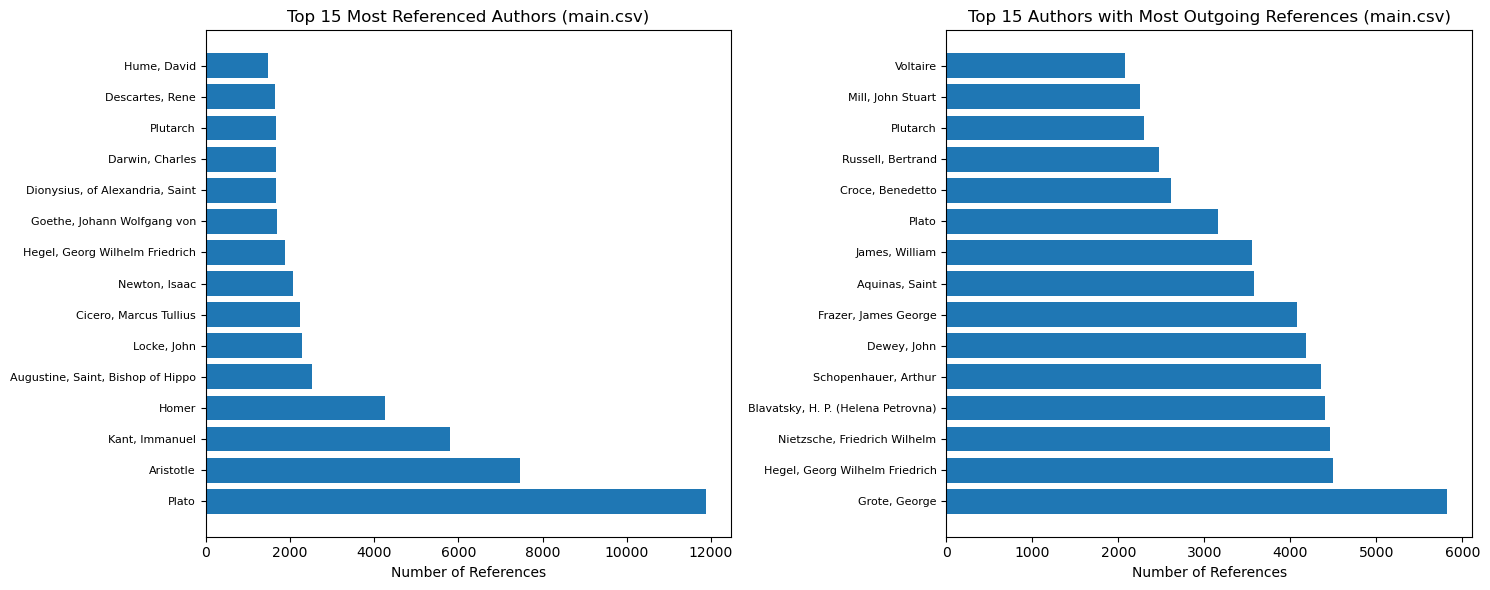

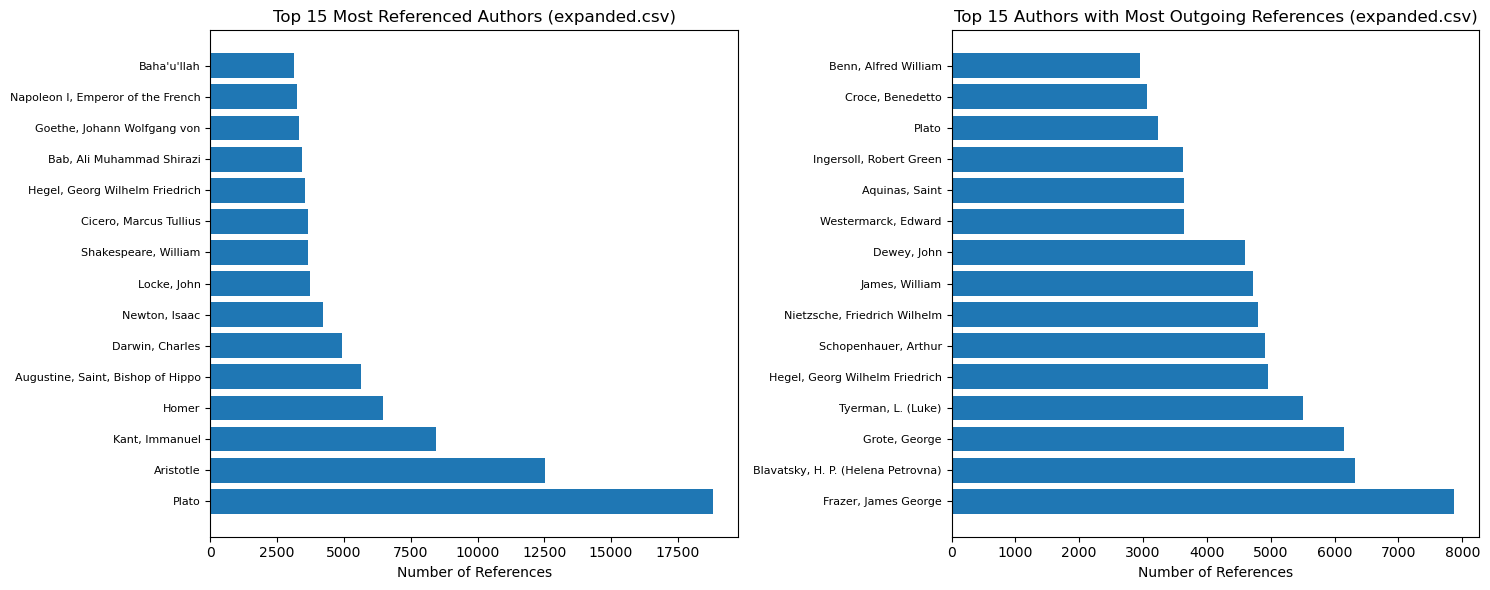

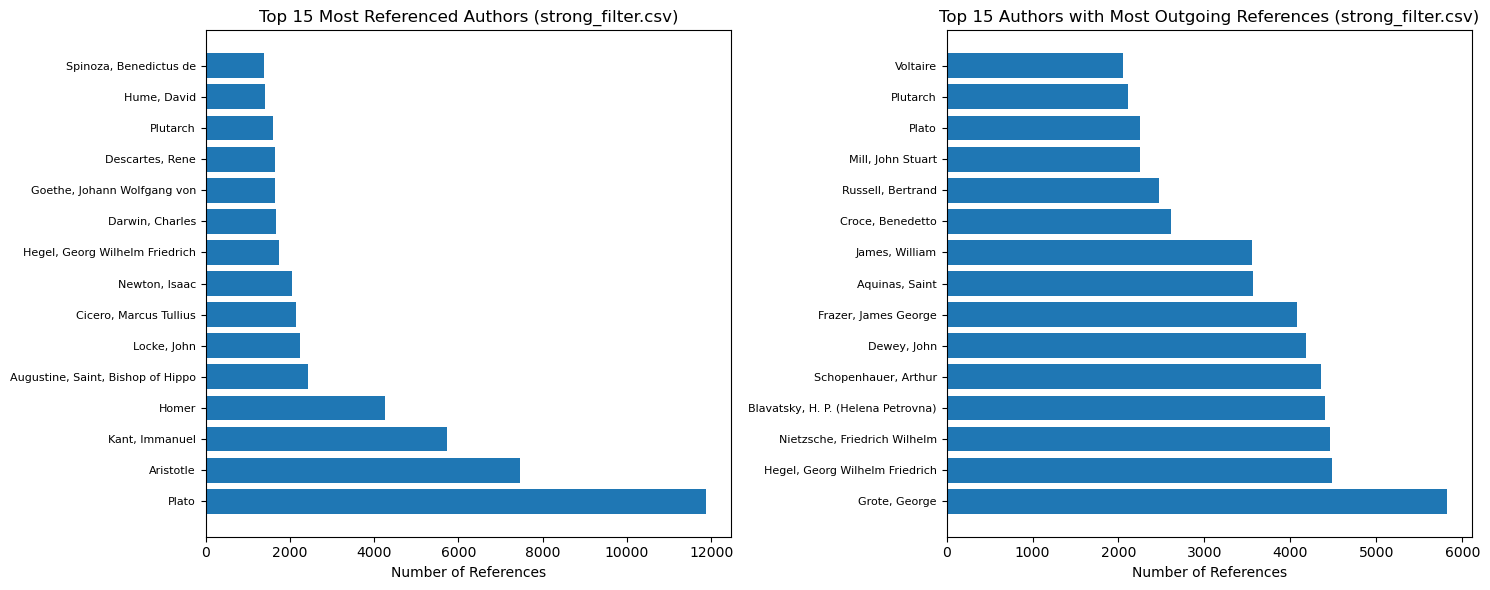

In [36]:
import pandas as pd
import numpy as np

df_main = pd.read_csv('data/main.csv', index_col=0)
total_refs_main = df_main.sum()
top_15_authors_main = total_refs_main.sort_values(ascending=False).head(15)

print("\nTop 15 Most Referenced Authors (main.csv):")
print("===============================")
for author, refs in top_15_authors_main.items():
    print(f"{author}: {int(refs)} references")

outgoing_refs_main = df_main.sum(axis=1)
top_15_outgoing_main = outgoing_refs_main.sort_values(ascending=False).head(15)

print("\nTop 15 Authors with Most Outgoing References (main.csv):")
print("=========================================")
for author, refs in top_15_outgoing_main.items():
    print(f"{author}: {int(refs)} references")

df_expanded = pd.read_csv('data/expanded.csv', index_col=0)
total_refs_expanded = df_expanded.sum()
top_15_authors_expanded = total_refs_expanded.sort_values(ascending=False).head(15)

print("\nTop 15 Most Referenced Authors (expanded.csv):")
print("===============================")
for author, refs in top_15_authors_expanded.items():
    print(f"{author}: {int(refs)} references")

outgoing_refs_expanded = df_expanded.sum(axis=1)
top_15_outgoing_expanded = outgoing_refs_expanded.sort_values(ascending=False).head(15)

print("\nTop 15 Authors with Most Outgoing References (expanded.csv):")
print("=========================================")
for author, refs in top_15_outgoing_expanded.items():
    print(f"{author}: {int(refs)} references")

df_strong = pd.read_csv('data/strong_filter.csv', index_col=0)
total_refs_strong = df_strong.sum()
top_15_authors_strong = total_refs_strong.sort_values(ascending=False).head(15)

print("\nTop 15 Most Referenced Authors (strong_filter.csv):")
print("===============================")
for author, refs in top_15_authors_strong.items():
    print(f"{author}: {int(refs)} references")

outgoing_refs_strong = df_strong.sum(axis=1)
top_15_outgoing_strong = outgoing_refs_strong.sort_values(ascending=False).head(15)

print("\nTop 15 Authors with Most Outgoing References (strong_filter.csv):")
print("=========================================")
for author, refs in top_15_outgoing_strong.items():
    print(f"{author}: {int(refs)} references")

import matplotlib.pyplot as plt

for dataset_name, top_15_authors, top_15_outgoing in [
    ('main.csv', top_15_authors_main, top_15_outgoing_main),
    ('expanded.csv', top_15_authors_expanded, top_15_outgoing_expanded),
    ('strong_filter.csv', top_15_authors_strong, top_15_outgoing_strong)
]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.barh(top_15_authors.index, top_15_authors.values)
    ax1.set_title(f'Top 15 Most Referenced Authors ({dataset_name})')
    ax1.set_xlabel('Number of References')
    plt.setp(ax1.get_yticklabels(), fontsize=8)
    
    ax2.barh(top_15_outgoing.index, top_15_outgoing.values)
    ax2.set_title(f'Top 15 Authors with Most Outgoing References ({dataset_name})')
    ax2.set_xlabel('Number of References')
    plt.setp(ax2.get_yticklabels(), fontsize=8)
    
    plt.tight_layout()
    plt.show()


Here, we calculcate the percentages of the top 5 most referenced authors across the three main datasets.

In [37]:
# Calculate percentages for top 5 most referenced authors across all datasets
datasets = {
    'main.csv': df_main,
    'expanded.csv': df_expanded, 
    'strong_filter.csv': df_strong
}

print("Top 5 Most Referenced Authors by Dataset (with percentages):")
print("========================================================")

for dataset_name, df in datasets.items():
    print(f"\n{dataset_name}:")
    print("-" * len(dataset_name))
    
    # Calculate total references in dataset
    total_refs = df.sum().sum()
    
    # Get top 5 most referenced
    top_5 = df.sum().sort_values(ascending=False).head(5)
    
    # Print each author with count and percentage
    for author, refs in top_5.items():
        percentage = (refs / total_refs) * 100
        print(f"{author}: {int(refs)} references ({percentage:.2f}% of total)")


Top 5 Most Referenced Authors by Dataset (with percentages):

main.csv:
--------
Plato: 11889 references (12.26% of total)
Aristotle: 7471 references (7.70% of total)
Kant, Immanuel: 5795 references (5.97% of total)
Homer: 4263 references (4.40% of total)
Augustine, Saint, Bishop of Hippo: 2524 references (2.60% of total)

expanded.csv:
------------
Plato: 18825 references (6.38% of total)
Aristotle: 12534 references (4.25% of total)
Kant, Immanuel: 8448 references (2.86% of total)
Homer: 6474 references (2.19% of total)
Augustine, Saint, Bishop of Hippo: 5624 references (1.91% of total)

strong_filter.csv:
-----------------
Plato: 11879 references (12.78% of total)
Aristotle: 7466 references (8.03% of total)
Kant, Immanuel: 5739 references (6.17% of total)
Homer: 4263 references (4.59% of total)
Augustine, Saint, Bishop of Hippo: 2427 references (2.61% of total)


Here, we calcuate network statistics for the three main datasets. These include:
* In-degree centrality -- the number of unique authors referencing an author
* Out-degree centrality -- the number of unique authors referenced by an author
* Betweenness centrality -- the number of times an author appears between any two authors in the network
* Eigenvector centrality -- a measure of the influence of an author based on the centrality of their references
* PageRank -- a measure of the importance of an author based on the centrality of their references
* Degree distribution -- the distribution of the number of references an author has



=== Analysis for main.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 122 unique authors referencing them
Aristotle: 118 unique authors referencing them
Homer: 91 unique authors referencing them
Cicero, Marcus Tullius: 89 unique authors referencing them
Shakespeare, William: 75 unique authors referencing them
Milton, John: 74 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 74 unique authors referencing them
Virgil: 70 unique authors referencing them
Plutarch: 68 unique authors referencing them
Diogenes Laertius: 62 unique authors referencing them
Seneca, Lucius Annaeus: 61 unique authors referencing them
Kant, Immanuel: 60 unique authors referencing them
Goethe, Johann Wolfgang von: 59 unique authors referencing them
Twain, Mark: 59 unique authors referencing them
Dante Alighieri: 59 unique authors referencing them
Hume, David: 56 unique authors referencing them
Descartes, Rene: 55 unique authors referencing them
Euripides: 54 unique authors referencing the

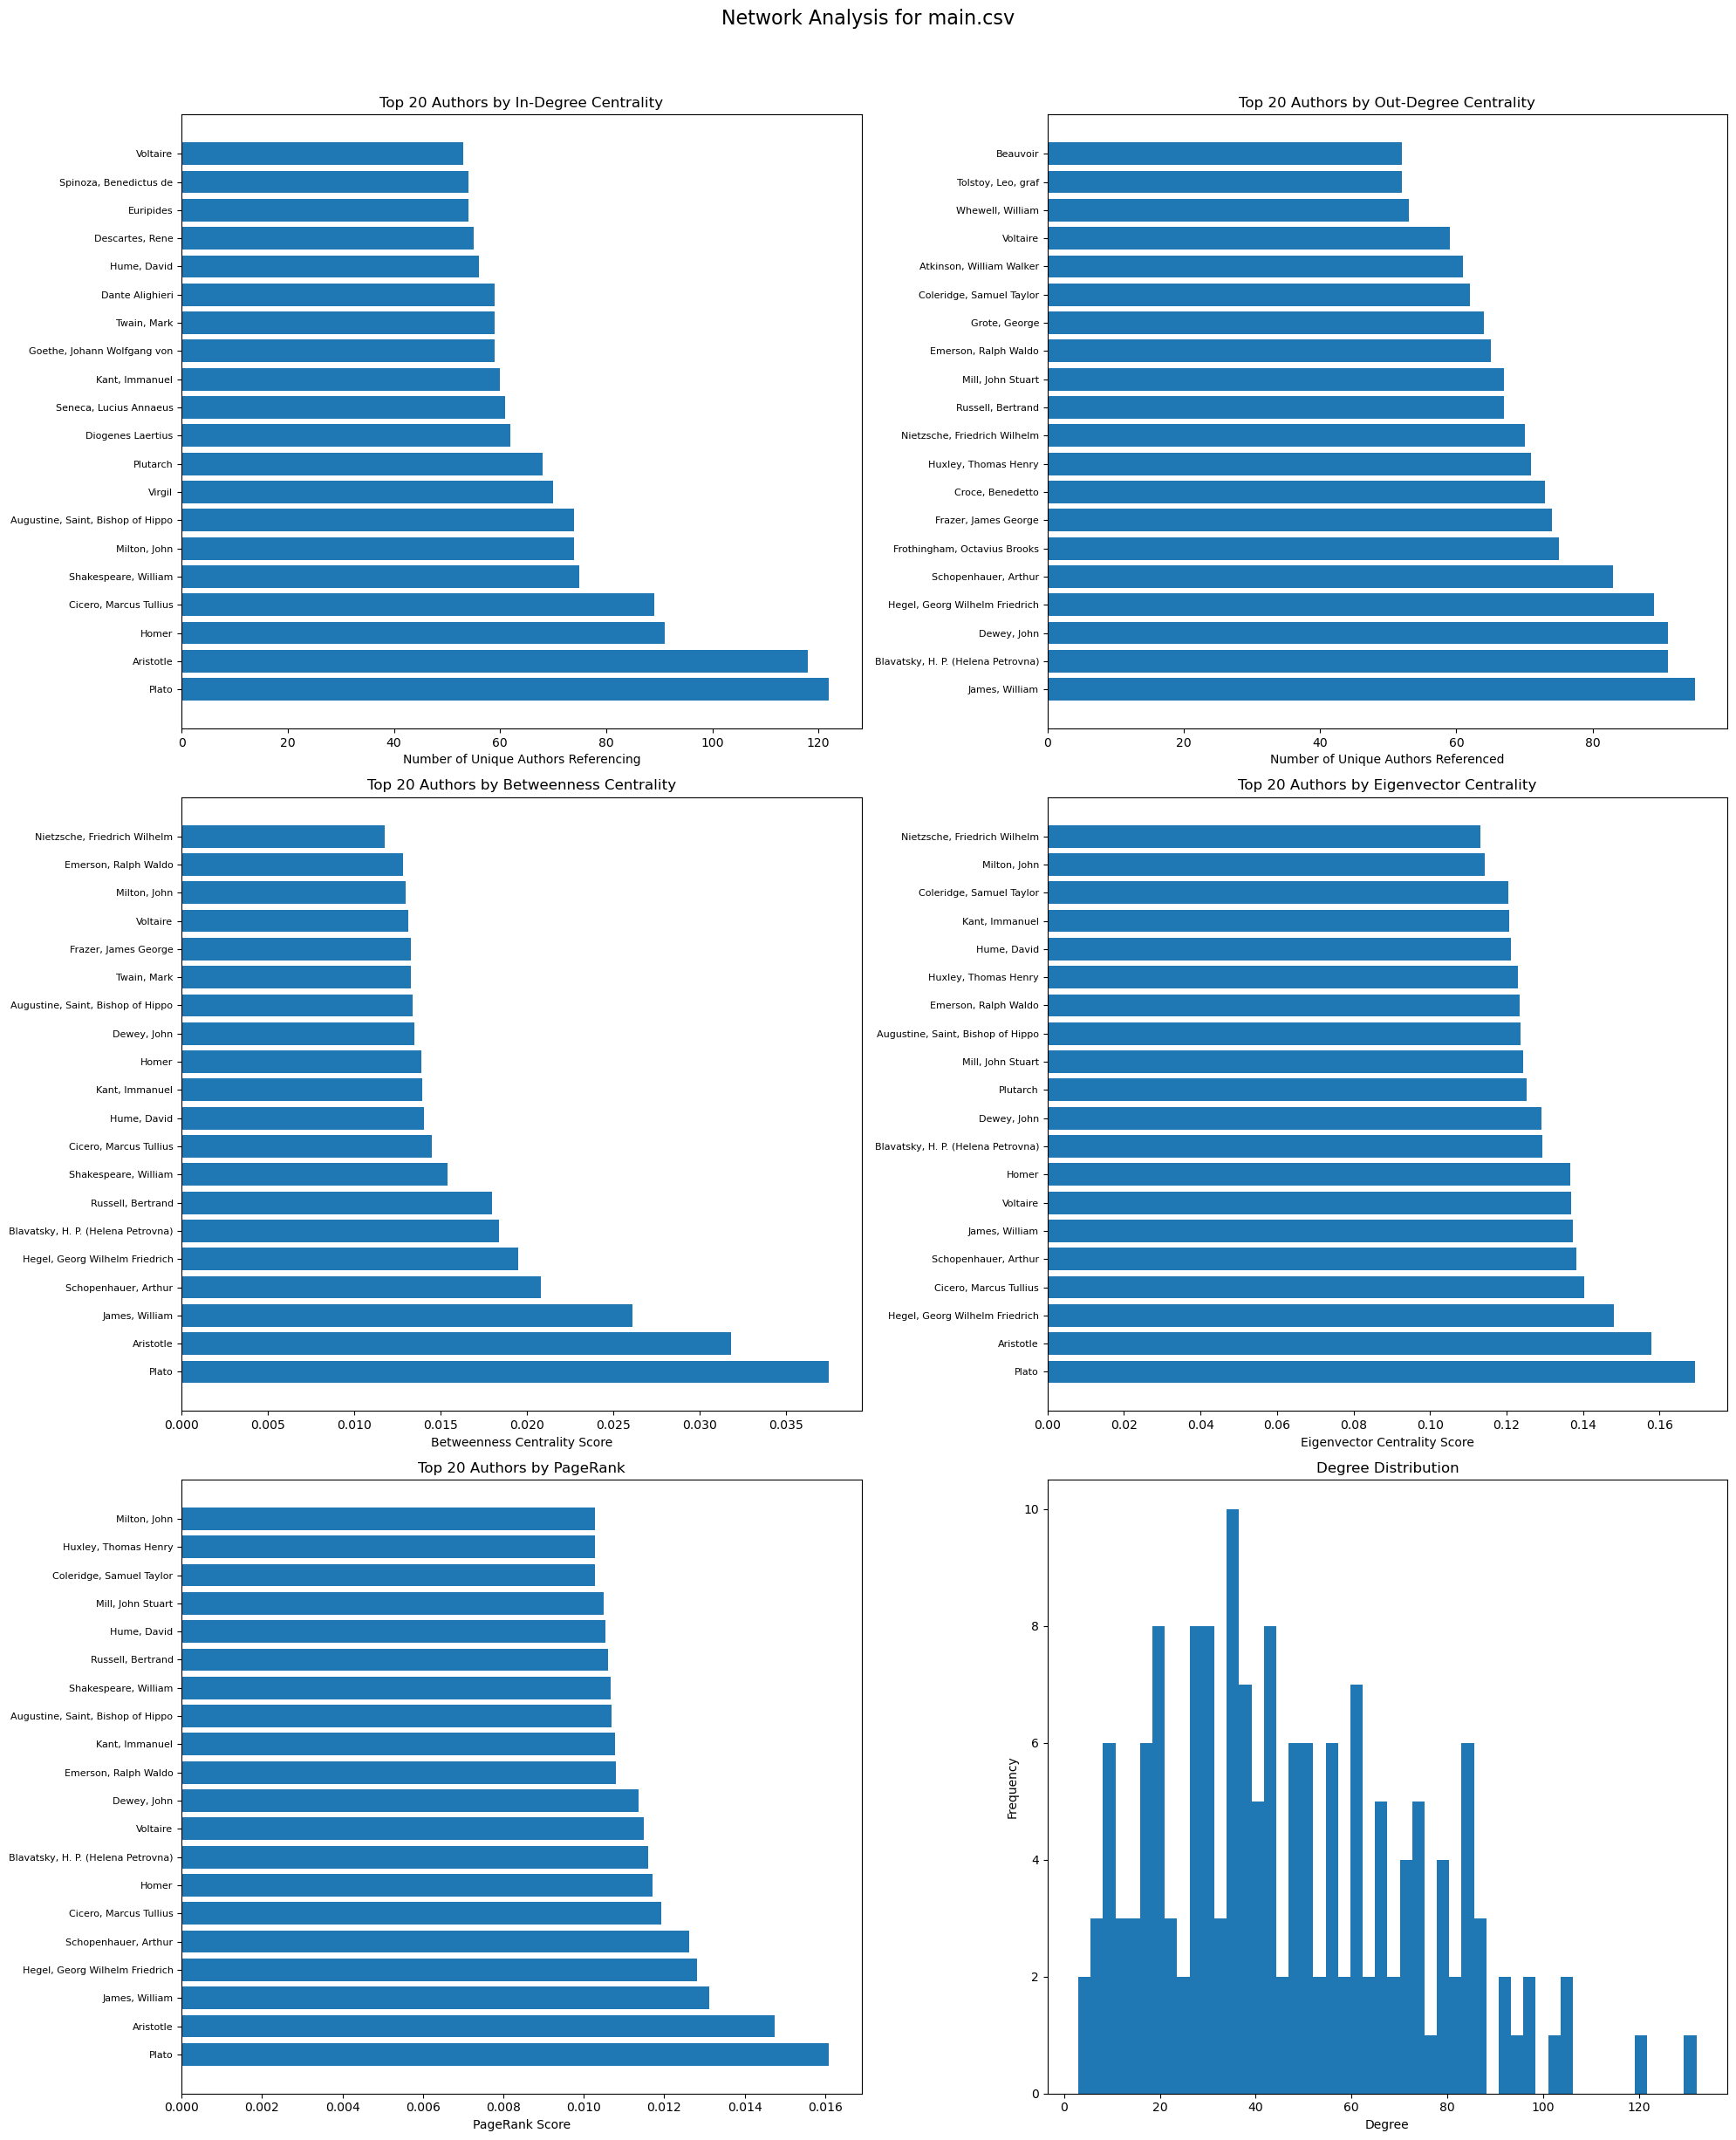


=== Analysis for strong_filter.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 120 unique authors referencing them
Aristotle: 116 unique authors referencing them
Homer: 91 unique authors referencing them
Cicero, Marcus Tullius: 84 unique authors referencing them
Virgil: 67 unique authors referencing them
Shakespeare, William: 67 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 65 unique authors referencing them
Milton, John: 63 unique authors referencing them
Diogenes Laertius: 61 unique authors referencing them
Plutarch: 60 unique authors referencing them
Seneca, Lucius Annaeus: 58 unique authors referencing them
Kant, Immanuel: 54 unique authors referencing them
Euripides: 53 unique authors referencing them
Xenophon: 52 unique authors referencing them
Hume, David: 51 unique authors referencing them
Euclid: 51 unique authors referencing them
Descartes, Rene: 51 unique authors referencing them
Dante Alighieri: 50 unique authors referencing them
Aurelius, Emp

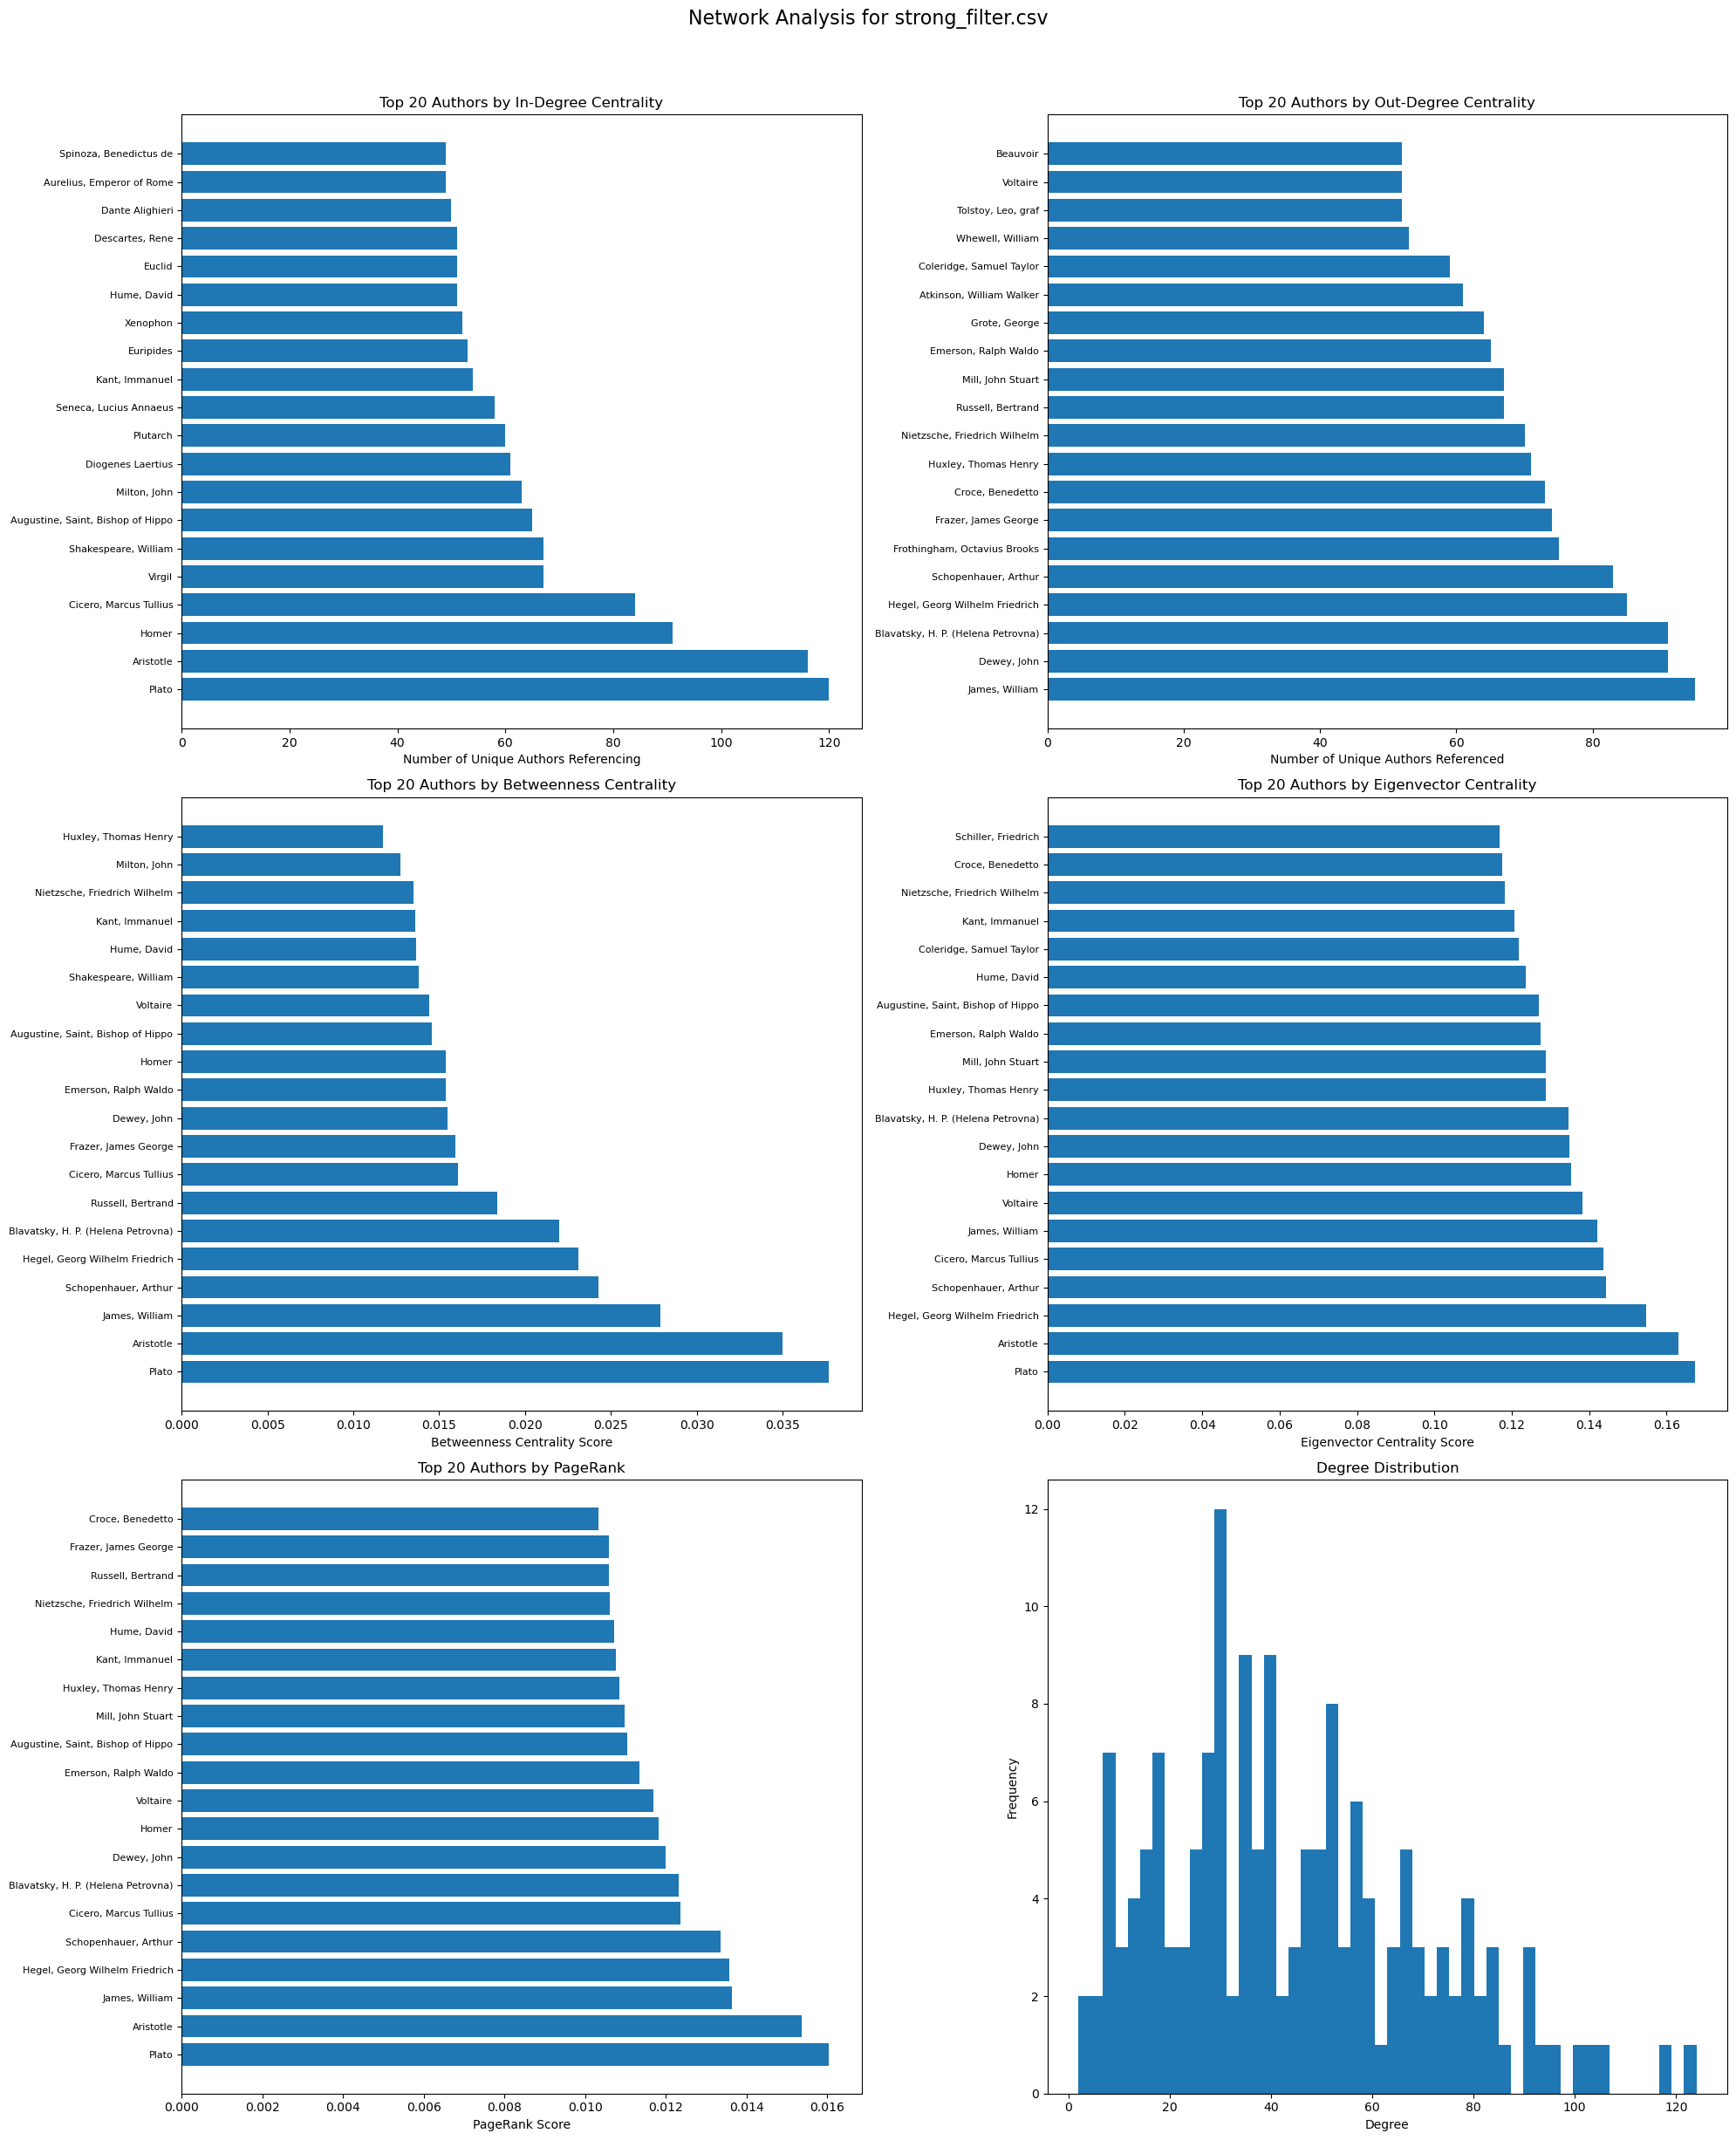


=== Analysis for expanded.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 470 unique authors referencing them
Aristotle: 415 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 347 unique authors referencing them
Shakespeare, William: 344 unique authors referencing them
Newton, Isaac: 332 unique authors referencing them
Homer: 328 unique authors referencing them
Napoleon I, Emperor of the French: 322 unique authors referencing them
Milton, John: 301 unique authors referencing them
Cicero, Marcus Tullius: 298 unique authors referencing them
Virgil: 256 unique authors referencing them
Dante Alighieri: 246 unique authors referencing them
Goethe, Johann Wolfgang von: 246 unique authors referencing them
Darwin, Charles: 244 unique authors referencing them
Lincoln, Abraham: 230 unique authors referencing them
Plutarch: 220 unique authors referencing them
Kant, Immanuel: 218 unique authors referencing them
Voltaire: 215 unique authors referencing them
Hume, David: 208

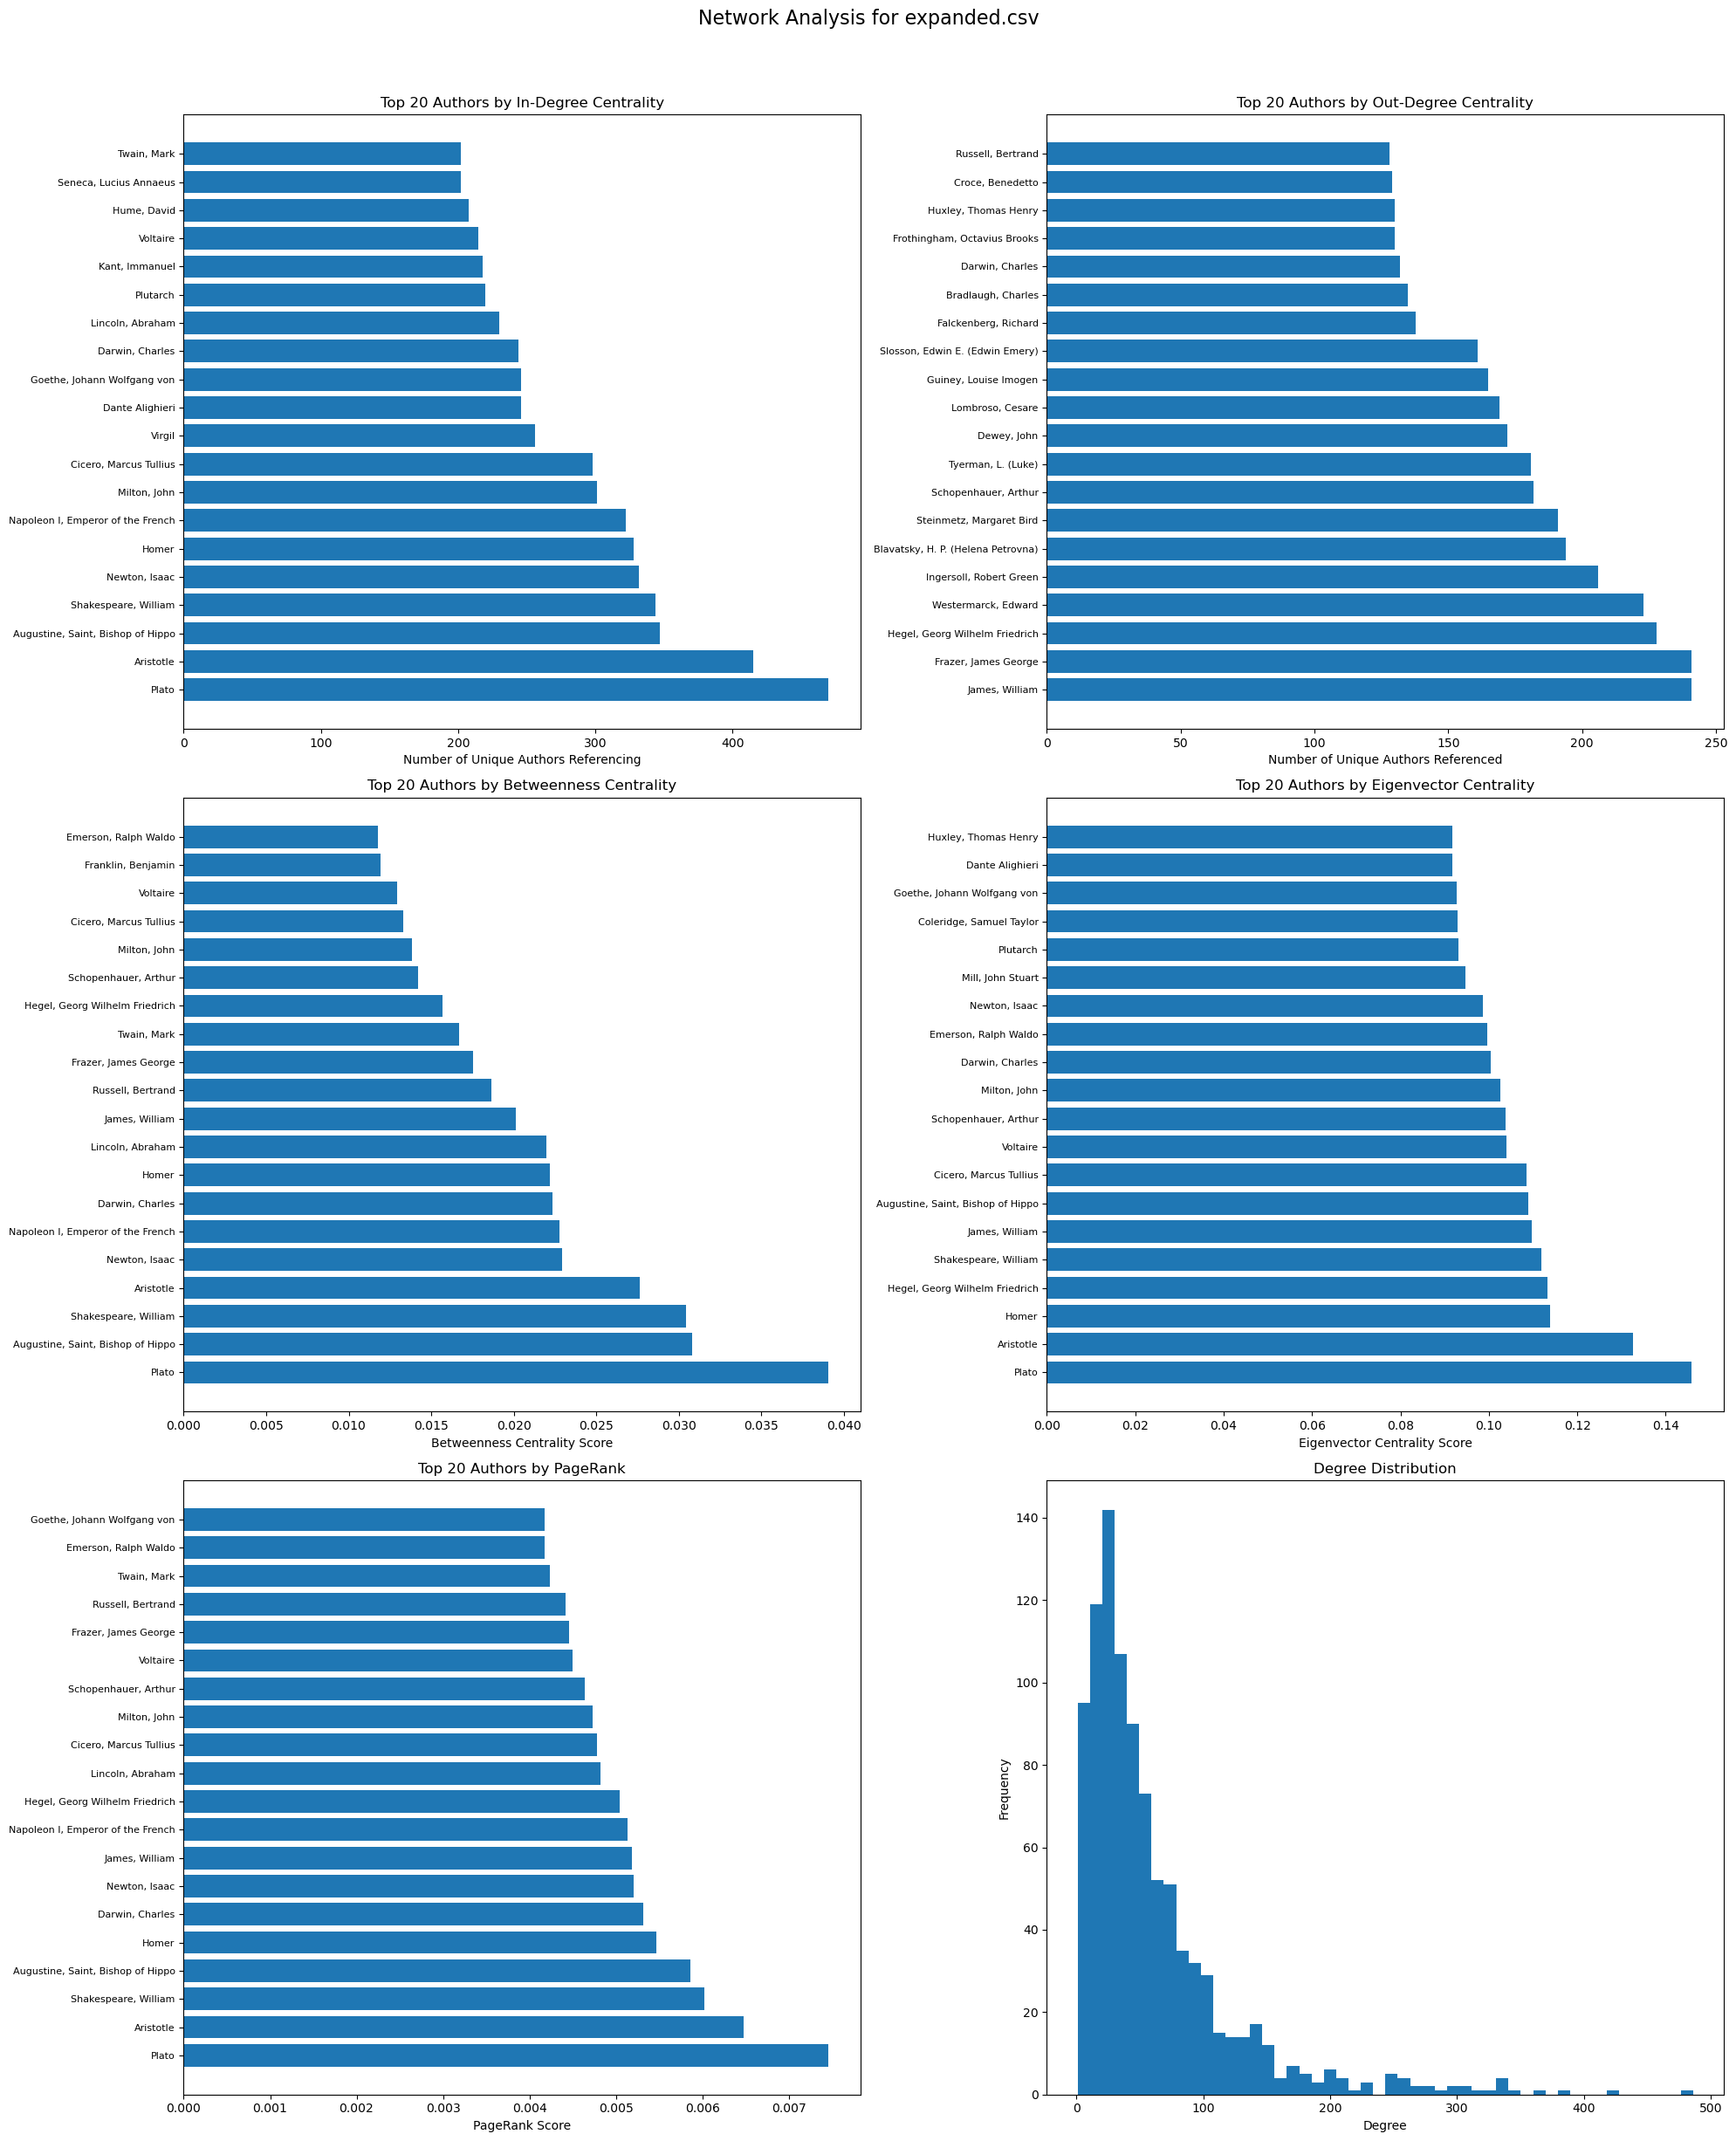

In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

datasets = {
    'main.csv': 'data/main.csv',
    'strong_filter.csv': 'data/strong_filter.csv', 
    'expanded.csv': 'data/expanded.csv'
}

for dataset_name, file_path in datasets.items():
    print(f"\n=== Analysis for {dataset_name} ===\n")
    
    df = pd.read_csv(file_path, index_col=0)

    # Remove any authors that don't appear in both index and columns
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]

    # In-degree centrality
    in_degree = (df > 0).sum()
    top_20_in_degree = in_degree.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by In-Degree Centrality:")
    print("=====================================")
    for author, refs in top_20_in_degree.items():
        print(f"{author}: {int(refs)} unique authors referencing them")

    # Out-degree centrality
    out_degree = (df > 0).sum(axis=1)
    top_20_out_degree = out_degree.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by Out-Degree Centrality:")
    print("=====================================")
    for author, refs in top_20_out_degree.items():
        print(f"{author}: {int(refs)} unique authors referenced")

    # Create network graph
    G = nx.from_pandas_adjacency(df > 0)

    # Betweenness centrality
    betweenness = nx.betweenness_centrality(G)
    betweenness_series = pd.Series(betweenness)
    top_20_betweenness = betweenness_series.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by Betweenness Centrality:")
    print("=====================================")
    for author, centrality in top_20_betweenness.items():
        print(f"{author}: {centrality:.4f}")

    # Eigenvector Centrality
    eigenvector = nx.eigenvector_centrality(G)
    eigenvector_series = pd.Series(eigenvector)
    top_20_eigenvector = eigenvector_series.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by Eigenvector Centrality (Influence):")
    print("================================================")
    for author, centrality in top_20_eigenvector.items():
        print(f"{author}: {centrality:.4f}")

    # PageRank
    pagerank = nx.pagerank(G)
    pagerank_series = pd.Series(pagerank)
    top_20_pagerank = pagerank_series.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by PageRank:")
    print("========================")
    for author, rank in top_20_pagerank.items():
        print(f"{author}: {rank:.4f}")

    # Network Statistics
    print("\nNetwork Statistics:")
    print("==================")
    print(f"Number of authors: {len(G.nodes())}")
    print(f"Number of citations: {len(G.edges())}")
    print(f"Network density: {nx.density(G):.4f}")
    print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

    # Create figure with all subplots
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 24))
    fig.suptitle(f'Network Analysis for {dataset_name}', fontsize=16, y=1.02)

    # Plot in-degree centrality
    ax1.barh(top_20_in_degree.index, top_20_in_degree.values)
    ax1.set_title('Top 20 Authors by In-Degree Centrality')
    ax1.set_xlabel('Number of Unique Authors Referencing')
    plt.setp(ax1.get_yticklabels(), fontsize=8)

    # Plot out-degree centrality
    ax2.barh(top_20_out_degree.index, top_20_out_degree.values)
    ax2.set_title('Top 20 Authors by Out-Degree Centrality')
    ax2.set_xlabel('Number of Unique Authors Referenced')
    plt.setp(ax2.get_yticklabels(), fontsize=8)

    # Plot betweenness centrality
    ax3.barh(top_20_betweenness.index, top_20_betweenness.values)
    ax3.set_title('Top 20 Authors by Betweenness Centrality')
    ax3.set_xlabel('Betweenness Centrality Score')
    plt.setp(ax3.get_yticklabels(), fontsize=8)

    # Plot eigenvector centrality
    ax4.barh(top_20_eigenvector.index, top_20_eigenvector.values)
    ax4.set_title('Top 20 Authors by Eigenvector Centrality')
    ax4.set_xlabel('Eigenvector Centrality Score')
    plt.setp(ax4.get_yticklabels(), fontsize=8)

    # Plot PageRank
    ax5.barh(top_20_pagerank.index, top_20_pagerank.values)
    ax5.set_title('Top 20 Authors by PageRank')
    ax5.set_xlabel('PageRank Score')
    plt.setp(ax5.get_yticklabels(), fontsize=8)

    # Plot degree distribution
    degrees = [d for n, d in G.degree()]
    ax6.hist(degrees, bins=50)
    ax6.set_title('Degree Distribution')
    ax6.set_xlabel('Degree')
    ax6.set_ylabel('Frequency')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

## Statistics for Classified datasets

Here, we'll calcuate the same statistics for 8 datasets, classified by subject in philosophy.

* **science.csv**
* **ethics.csv**
* **epistemology.csv**
* **religion.csv**
* **metaphysics.csv**
* **mathematics.csv**
* **politics.csv**
* **art.csv**



Analyzing science.csv:

Top 15 Most Referenced Authors:
Plato: 5412 references
Aristotle: 3635 references
Kant, Immanuel: 2548 references
Homer: 1708 references
Augustine, Saint, Bishop of Hippo: 1414 references
Locke, John: 1173 references
Darwin, Charles: 1131 references
Hegel, Georg Wilhelm Friedrich: 1062 references
Newton, Isaac: 1060 references
Dionysius, of Alexandria, Saint: 859 references
Plutarch: 837 references
Descartes, Rene: 822 references
Cicero, Marcus Tullius: 783 references
Leibniz, Gottfried Wilhelm, Freiherr von: 683 references
Spinoza, Benedictus de: 678 references

Top 15 Authors with Most Outgoing References:
Frazer, James George: 2873 references
Dewey, John: 2803 references
Aquinas, Saint: 2322 references
Grote, George: 2184 references
Blavatsky, H. P. (Helena Petrovna): 2039 references
James, William: 1972 references
Hegel, Georg Wilhelm Friedrich: 1912 references
Nietzsche, Friedrich Wilhelm: 1808 references
Schopenhauer, Arthur: 1711 references
Russell, Bert

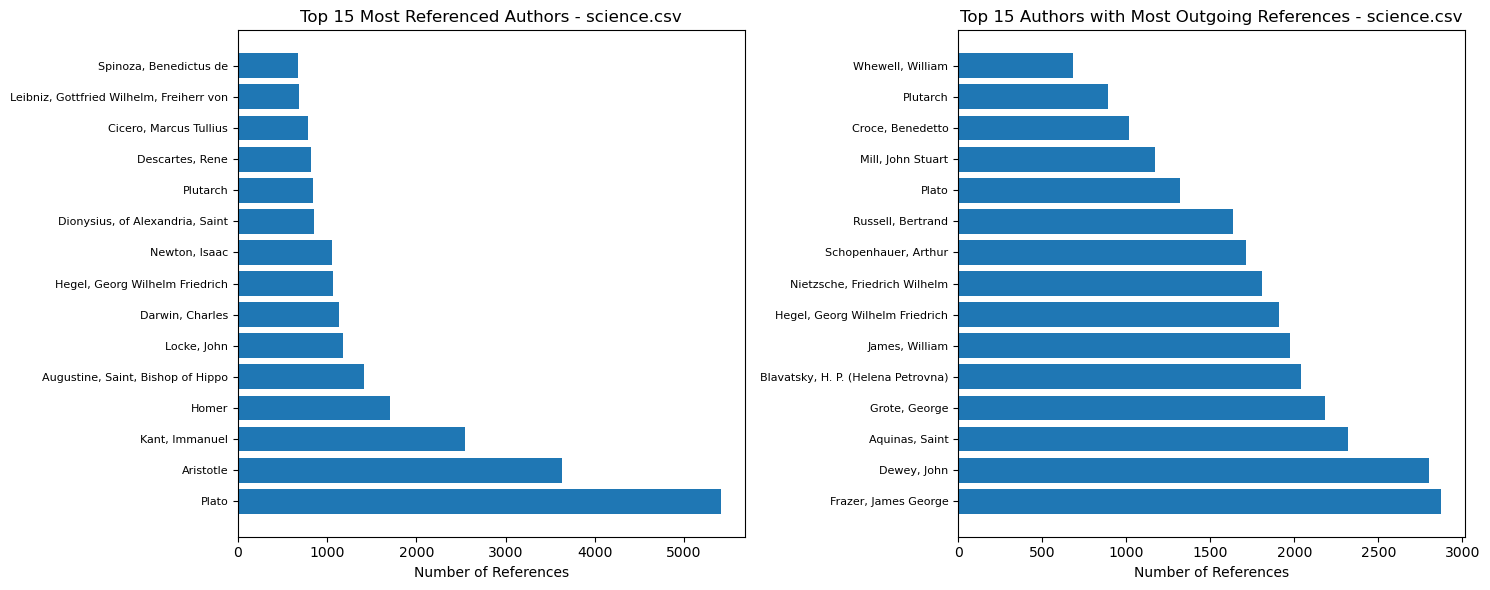


Analyzing ethics.csv:

Top 15 Most Referenced Authors:
Plato: 4438 references
Aristotle: 3185 references
Kant, Immanuel: 2590 references
Augustine, Saint, Bishop of Hippo: 1398 references
Locke, John: 979 references
Homer: 967 references
Hegel, Georg Wilhelm Friedrich: 739 references
Dionysius, of Alexandria, Saint: 684 references
Cicero, Marcus Tullius: 651 references
Hume, David: 581 references
Descartes, Rene: 579 references
Darwin, Charles: 573 references
Plutarch: 549 references
Spinoza, Benedictus de: 543 references
Leibniz, Gottfried Wilhelm, Freiherr von: 472 references

Top 15 Authors with Most Outgoing References:
Dewey, John: 2536 references
Aquinas, Saint: 2235 references
Frazer, James George: 1812 references
Grote, George: 1632 references
Hegel, Georg Wilhelm Friedrich: 1559 references
Schopenhauer, Arthur: 1490 references
Nietzsche, Friedrich Wilhelm: 1364 references
James, William: 1203 references
Russell, Bertrand: 1097 references
Blavatsky, H. P. (Helena Petrovna): 10

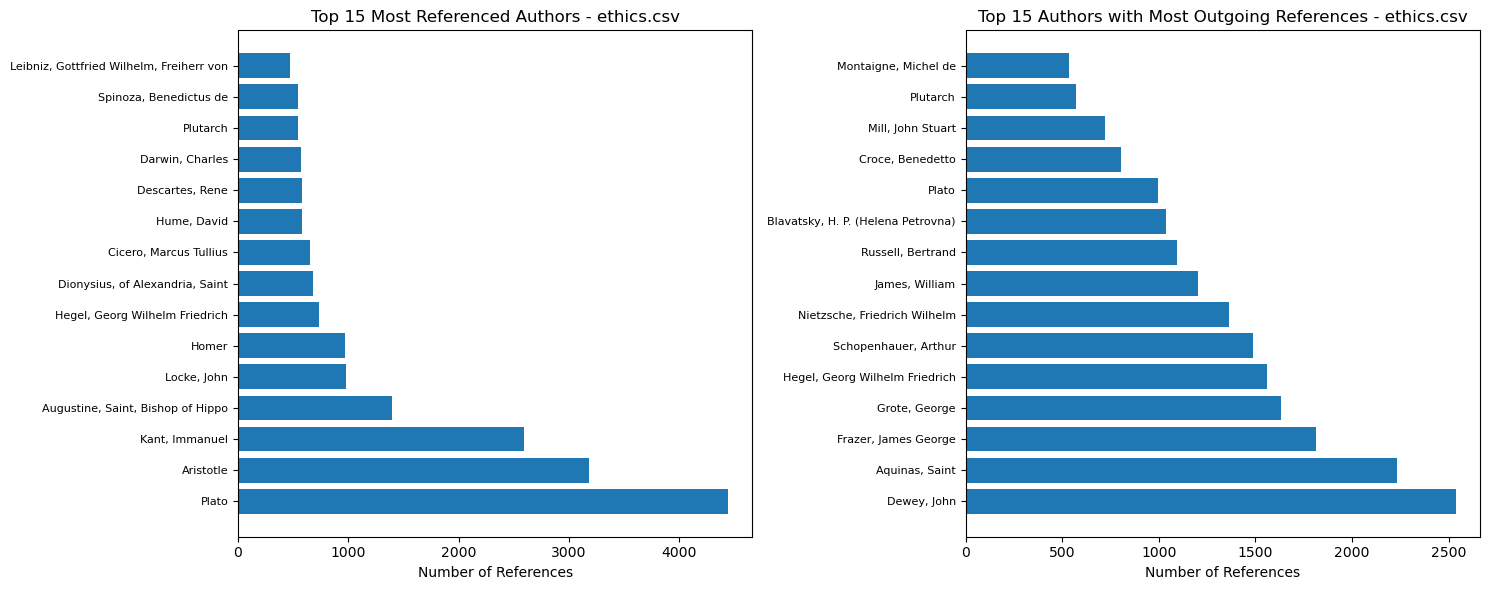


Analyzing epistemology.csv:

Top 15 Most Referenced Authors:
Plato: 6306 references
Kant, Immanuel: 4976 references
Aristotle: 4943 references
Locke, John: 1564 references
Hegel, Georg Wilhelm Friedrich: 1517 references
Descartes, Rene: 1226 references
Augustine, Saint, Bishop of Hippo: 1195 references
Spinoza, Benedictus de: 1121 references
Darwin, Charles: 971 references
Hume, David: 942 references
Newton, Isaac: 865 references
Euclid: 830 references
Leibniz, Gottfried Wilhelm, Freiherr von: 821 references
Homer: 805 references
Dionysius, of Alexandria, Saint: 798 references

Top 15 Authors with Most Outgoing References:
Dewey, John: 3557 references
Hegel, Georg Wilhelm Friedrich: 2861 references
Grote, George: 2776 references
Schopenhauer, Arthur: 2507 references
Aquinas, Saint: 2453 references
Russell, Bertrand: 2011 references
Nietzsche, Friedrich Wilhelm: 1989 references
James, William: 1856 references
Croce, Benedetto: 1745 references
Blavatsky, H. P. (Helena Petrovna): 1697 re

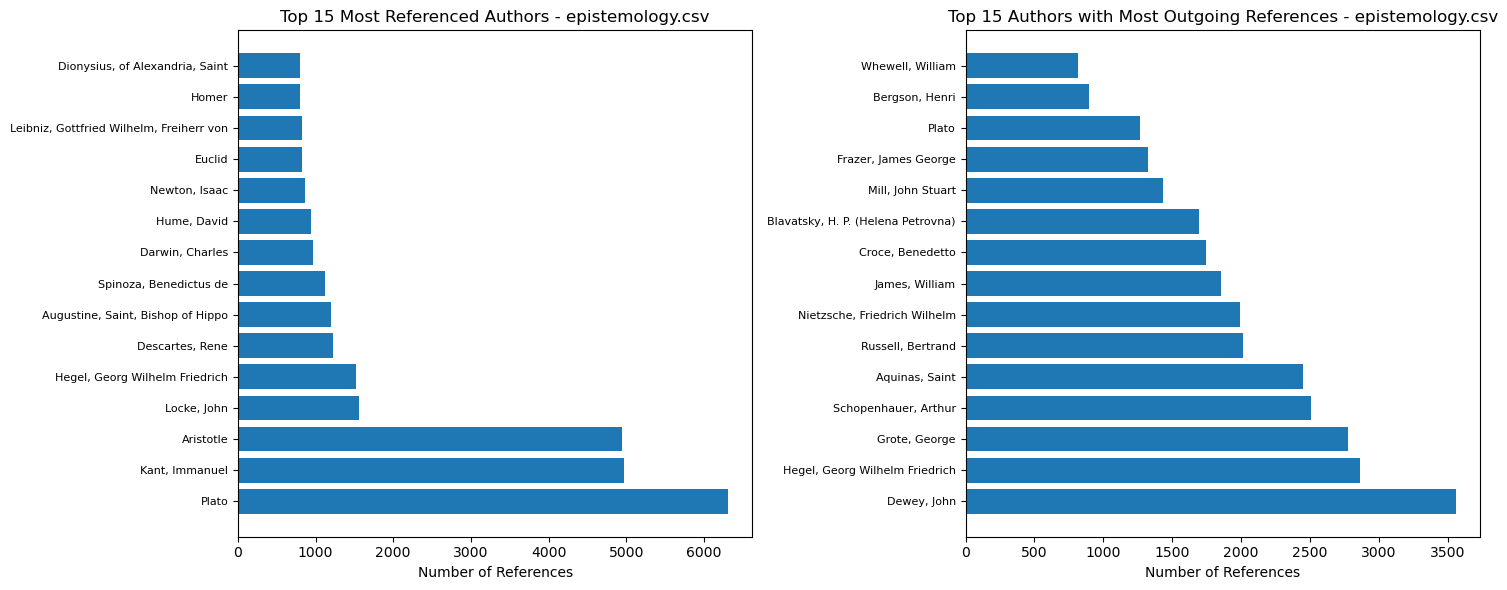


Analyzing religion.csv:

Top 15 Most Referenced Authors:
Plato: 2200 references
Augustine, Saint, Bishop of Hippo: 1643 references
Aristotle: 1330 references
Kant, Immanuel: 801 references
Dionysius, of Alexandria, Saint: 784 references
Homer: 673 references
Plutarch: 521 references
Locke, John: 468 references
Origen: 433 references
Cicero, Marcus Tullius: 401 references
Hegel, Georg Wilhelm Friedrich: 381 references
Descartes, Rene: 326 references
Spinoza, Benedictus de: 325 references
Grimm, Jacob: 316 references
Darwin, Charles: 296 references

Top 15 Authors with Most Outgoing References:
Aquinas, Saint: 2327 references
Frazer, James George: 2149 references
Dewey, John: 1294 references
Grote, George: 986 references
Blavatsky, H. P. (Helena Petrovna): 778 references
James, William: 752 references
Schopenhauer, Arthur: 731 references
Hegel, Georg Wilhelm Friedrich: 715 references
Nietzsche, Friedrich Wilhelm: 674 references
Plato: 488 references
Russell, Bertrand: 480 references
Har

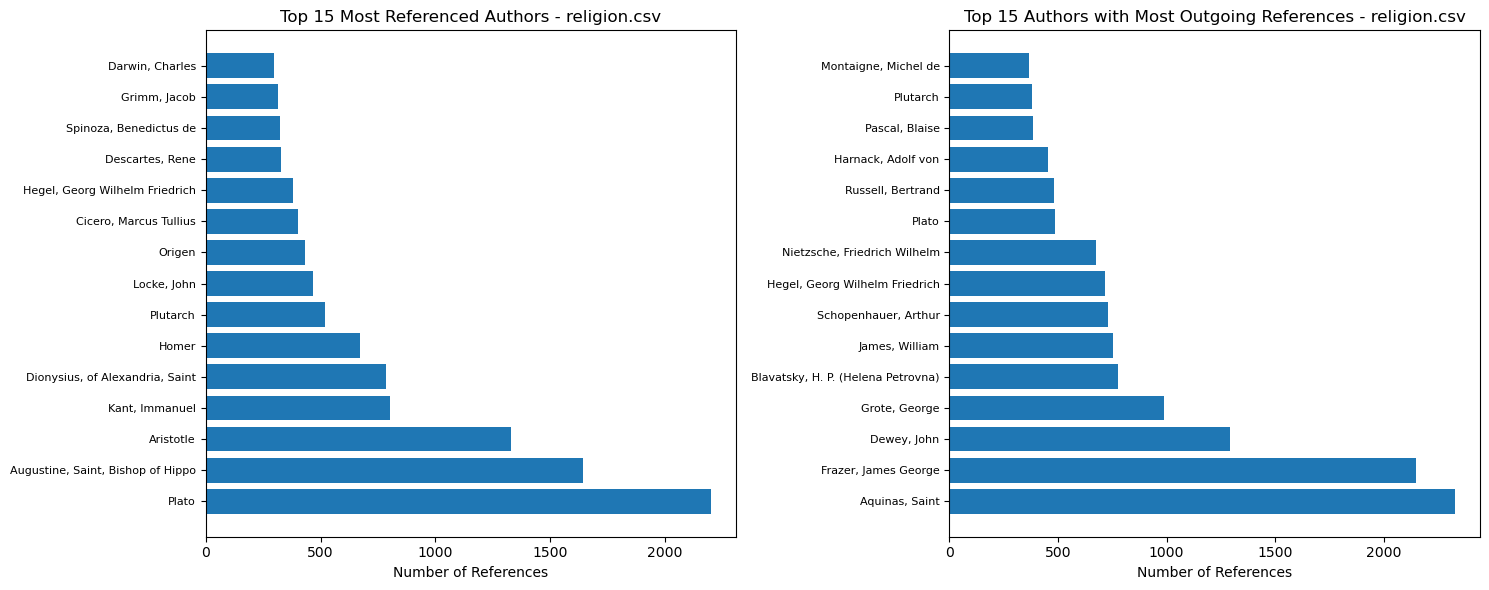


Analyzing metaphysics.csv:

Top 15 Most Referenced Authors:
Plato: 7322 references
Kant, Immanuel: 4945 references
Aristotle: 4823 references
Augustine, Saint, Bishop of Hippo: 1680 references
Locke, John: 1591 references
Hegel, Georg Wilhelm Friedrich: 1556 references
Descartes, Rene: 1251 references
Spinoza, Benedictus de: 1200 references
Homer: 955 references
Darwin, Charles: 907 references
Newton, Isaac: 904 references
Hume, David: 894 references
Dionysius, of Alexandria, Saint: 847 references
Leibniz, Gottfried Wilhelm, Freiherr von: 790 references
Euclid: 737 references

Top 15 Authors with Most Outgoing References:
Dewey, John: 3591 references
Hegel, Georg Wilhelm Friedrich: 2977 references
Aquinas, Saint: 2946 references
Schopenhauer, Arthur: 2549 references
Grote, George: 2391 references
Nietzsche, Friedrich Wilhelm: 2237 references
Blavatsky, H. P. (Helena Petrovna): 2205 references
Russell, Bertrand: 1989 references
James, William: 1969 references
Croce, Benedetto: 1775 ref

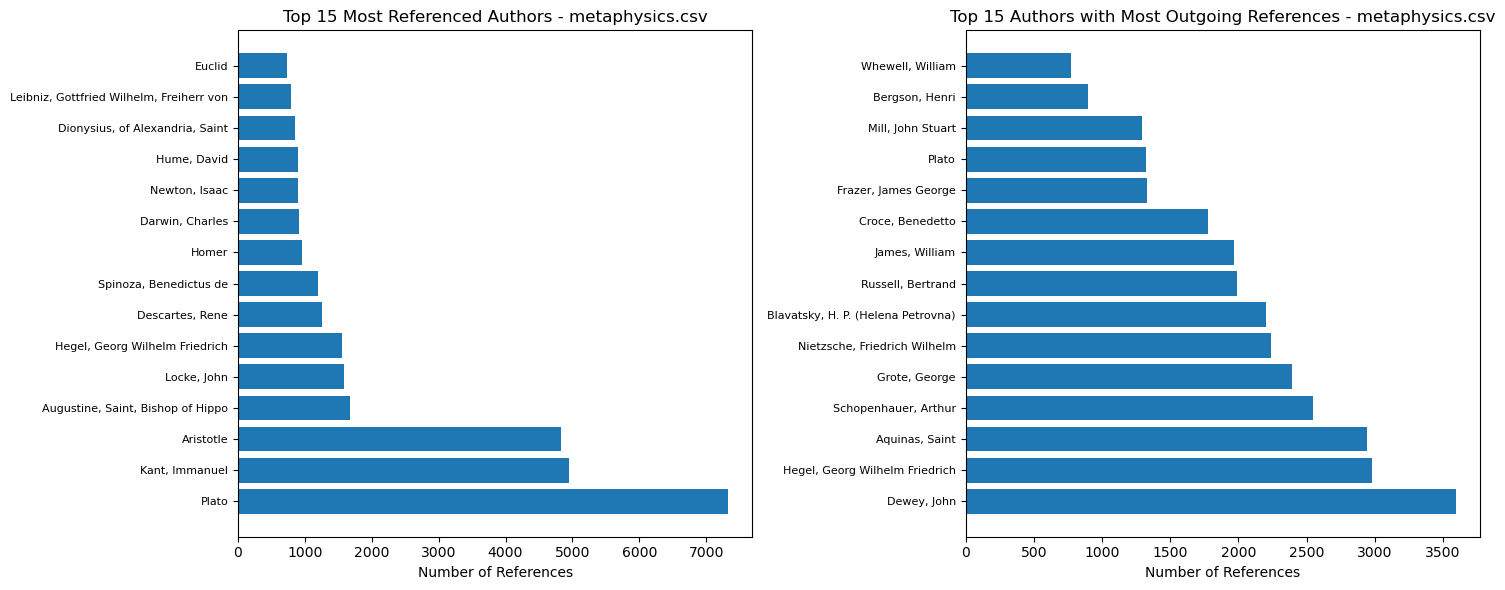


Analyzing mathematics.csv:

Top 15 Most Referenced Authors:
Plato: 1107 references
Aristotle: 1024 references
Kant, Immanuel: 904 references
Euclid: 603 references
Leibniz, Gottfried Wilhelm, Freiherr von: 433 references
Locke, John: 388 references
Newton, Isaac: 383 references
Hegel, Georg Wilhelm Friedrich: 352 references
Plutarch: 291 references
Homer: 282 references
Grimm, Jacob: 270 references
Spinoza, Benedictus de: 234 references
Darwin, Charles: 224 references
Descartes, Rene: 220 references
Montaigne, Michel de: 183 references

Top 15 Authors with Most Outgoing References:
Frazer, James George: 1606 references
Dewey, John: 1267 references
Russell, Bertrand: 838 references
Grote, George: 634 references
Hegel, Georg Wilhelm Friedrich: 602 references
Schopenhauer, Arthur: 588 references
James, William: 541 references
Godel: 441 references
Mill, John Stuart: 400 references
Blavatsky, H. P. (Helena Petrovna): 395 references
Aquinas, Saint: 287 references
Croce, Benedetto: 271 refe

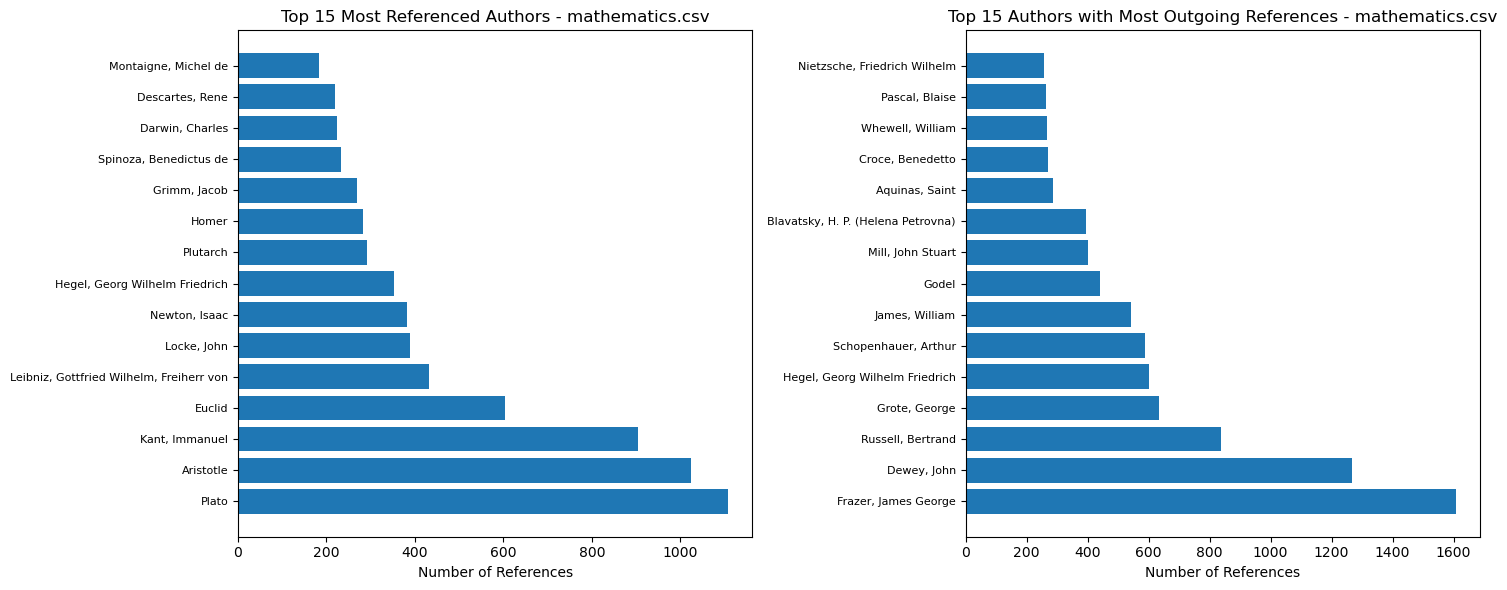


Analyzing politics.csv:

Top 15 Most Referenced Authors:
Plato: 972 references
Aristotle: 566 references
Kant, Immanuel: 427 references
Plutarch: 321 references
Homer: 254 references
Grimm, Jacob: 243 references
Cicero, Marcus Tullius: 214 references
Locke, John: 196 references
Montaigne, Michel de: 190 references
Hegel, Georg Wilhelm Friedrich: 190 references
Augustine, Saint, Bishop of Hippo: 170 references
Hume, David: 137 references
Leibniz, Gottfried Wilhelm, Freiherr von: 130 references
Milton, John: 129 references
Darwin, Charles: 126 references

Top 15 Authors with Most Outgoing References:
Frazer, James George: 1543 references
Dewey, John: 677 references
Grote, George: 588 references
Schopenhauer, Arthur: 394 references
James, William: 384 references
Hegel, Georg Wilhelm Friedrich: 379 references
Pascal, Blaise: 267 references
Nietzsche, Friedrich Wilhelm: 264 references
Blavatsky, H. P. (Helena Petrovna): 249 references
Russell, Bertrand: 228 references
Heidegger: 167 refere

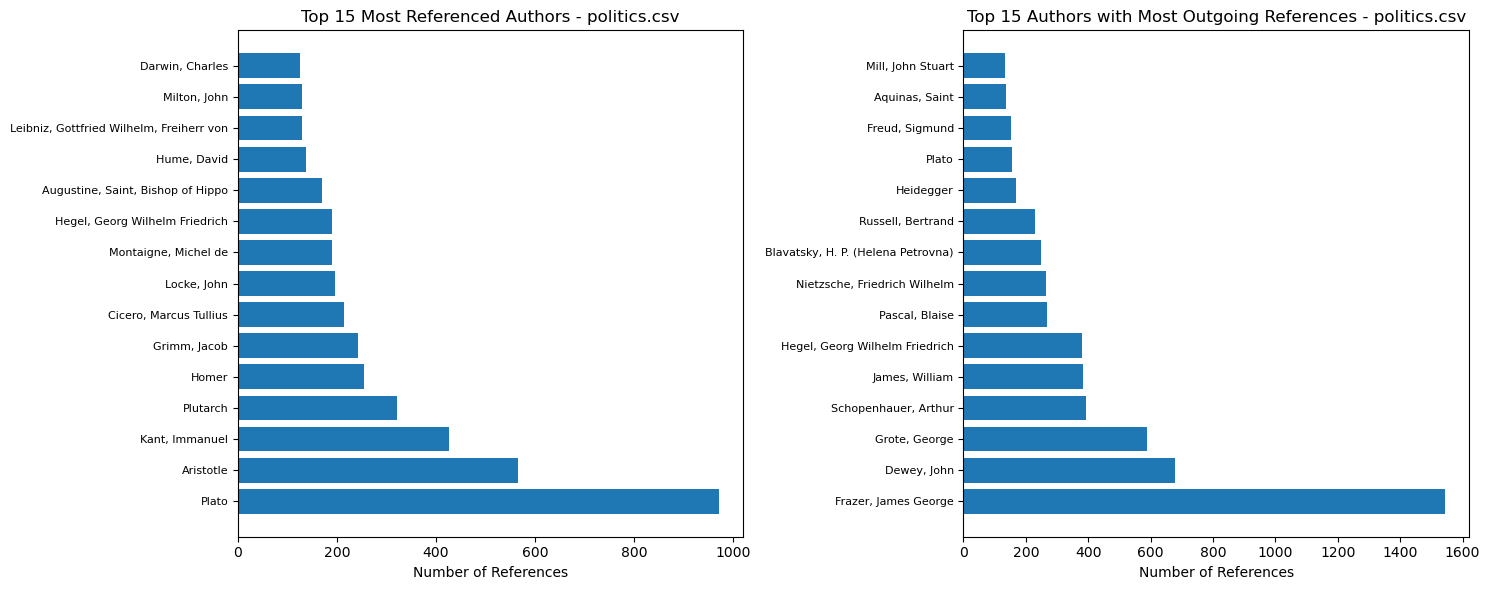


Analyzing art.csv:

Top 15 Most Referenced Authors:
Plato: 2424 references
Aristotle: 1289 references
Homer: 1230 references
Kant, Immanuel: 948 references
Augustine, Saint, Bishop of Hippo: 892 references
Plutarch: 635 references
Dionysius, of Alexandria, Saint: 598 references
Locke, John: 542 references
Hegel, Georg Wilhelm Friedrich: 485 references
Cicero, Marcus Tullius: 446 references
Grimm, Jacob: 414 references
Virgil: 401 references
Goethe, Johann Wolfgang von: 392 references
Milton, John: 350 references
Darwin, Charles: 333 references

Top 15 Authors with Most Outgoing References:
Frazer, James George: 2675 references
Aquinas, Saint: 1417 references
Grote, George: 1335 references
Dewey, John: 1290 references
Nietzsche, Friedrich Wilhelm: 1142 references
James, William: 1043 references
Hegel, Georg Wilhelm Friedrich: 935 references
Schopenhauer, Arthur: 910 references
Blavatsky, H. P. (Helena Petrovna): 830 references
Plato: 614 references
Russell, Bertrand: 573 references
Cro

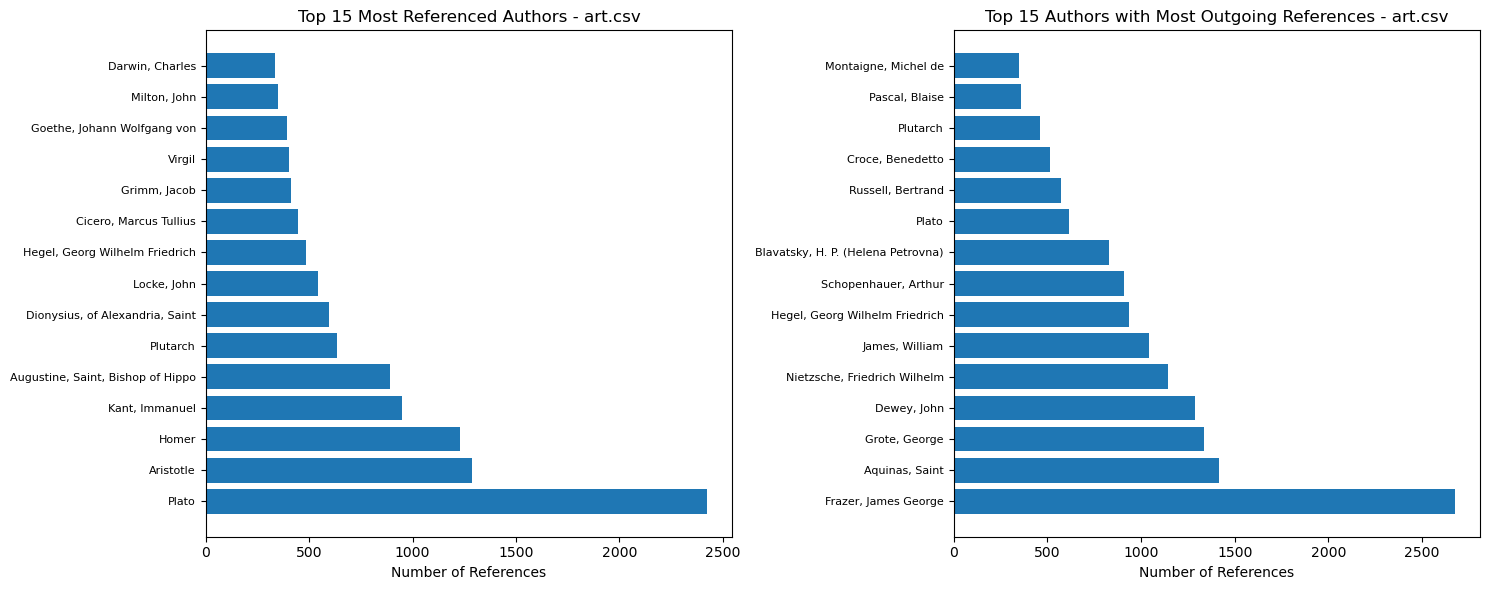

In [39]:
import pandas as pd
import numpy as np

files = ['science.csv', 'ethics.csv', 'epistemology.csv', 'religion.csv', 'metaphysics.csv', 'mathematics.csv', 'politics.csv', 'art.csv']

for file in files:
    print(f"\nAnalyzing {file}:")
    print("=" * (len(file) + 11))
    
    df = pd.read_csv(f'data/{file}', index_col=0)
    total_refs = df.sum()
    top_15_authors = total_refs.sort_values(ascending=False).head(15)

    print("\nTop 15 Most Referenced Authors:")
    print("===============================")
    for author, refs in top_15_authors.items():
        print(f"{author}: {int(refs)} references")

    # Calculate outgoing references
    outgoing_refs = df.sum(axis=1)
    top_15_outgoing = outgoing_refs.sort_values(ascending=False).head(15)

    print("\nTop 15 Authors with Most Outgoing References:")
    print("=========================================")
    for author, refs in top_15_outgoing.items():
        print(f"{author}: {int(refs)} references")

    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot top 30 most referenced authors
    ax1.barh(top_15_authors.index, top_15_authors.values)
    ax1.set_title(f'Top 15 Most Referenced Authors - {file}')
    ax1.set_xlabel('Number of References')
    plt.setp(ax1.get_yticklabels(), fontsize=8)

    # Plot top 30 authors with most outgoing references 
    ax2.barh(top_15_outgoing.index, top_15_outgoing.values)
    ax2.set_title(f'Top 15 Authors with Most Outgoing References - {file}')
    ax2.set_xlabel('Number of References')
    plt.setp(ax2.get_yticklabels(), fontsize=8)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


In [40]:
# Calculate percentages for top 5 most referenced authors across all datasets
datasets = {file: pd.read_csv(f'data/{file}', index_col=0) for file in files}

print("Top 5 Most Referenced Authors by Dataset (with percentages):")
print("========================================================")

for dataset_name, df in datasets.items():
    print(f"\n{dataset_name}:")
    print("-" * len(dataset_name))
    
    # Calculate total references in dataset
    total_refs = df.sum().sum()
    
    # Get top 5 most referenced
    top_5 = df.sum().sort_values(ascending=False).head(5)
    
    # Print each author with count and percentage
    for author, refs in top_5.items():
        percentage = (refs / total_refs) * 100
        print(f"{author}: {int(refs)} references ({percentage:.2f}% of total)")

Top 5 Most Referenced Authors by Dataset (with percentages):

science.csv:
-----------
Plato: 5412 references (11.90% of total)
Aristotle: 3635 references (7.99% of total)
Kant, Immanuel: 2548 references (5.60% of total)
Homer: 1708 references (3.76% of total)
Augustine, Saint, Bishop of Hippo: 1414 references (3.11% of total)

ethics.csv:
----------
Plato: 4438 references (13.65% of total)
Aristotle: 3185 references (9.80% of total)
Kant, Immanuel: 2590 references (7.97% of total)
Augustine, Saint, Bishop of Hippo: 1398 references (4.30% of total)
Locke, John: 979 references (3.01% of total)

epistemology.csv:
----------------
Plato: 6306 references (13.46% of total)
Kant, Immanuel: 4976 references (10.62% of total)
Aristotle: 4943 references (10.55% of total)
Locke, John: 1564 references (3.34% of total)
Hegel, Georg Wilhelm Friedrich: 1517 references (3.24% of total)

religion.csv:
------------
Plato: 2200 references (10.15% of total)
Augustine, Saint, Bishop of Hippo: 1643 referenc


=== Analysis for science.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 115 unique authors referencing them
Aristotle: 102 unique authors referencing them
Homer: 83 unique authors referencing them
Cicero, Marcus Tullius: 64 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 62 unique authors referencing them
Kant, Immanuel: 56 unique authors referencing them
Milton, John: 56 unique authors referencing them
Virgil: 52 unique authors referencing them
Descartes, Rene: 51 unique authors referencing them
Locke, John: 49 unique authors referencing them
Shakespeare, William: 48 unique authors referencing them
Plutarch: 48 unique authors referencing them
Hume, David: 47 unique authors referencing them
Dante Alighieri: 47 unique authors referencing them
Seneca, Lucius Annaeus: 44 unique authors referencing them
Diogenes Laertius: 42 unique authors referencing them
Spinoza, Benedictus de: 42 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 41 unique auth

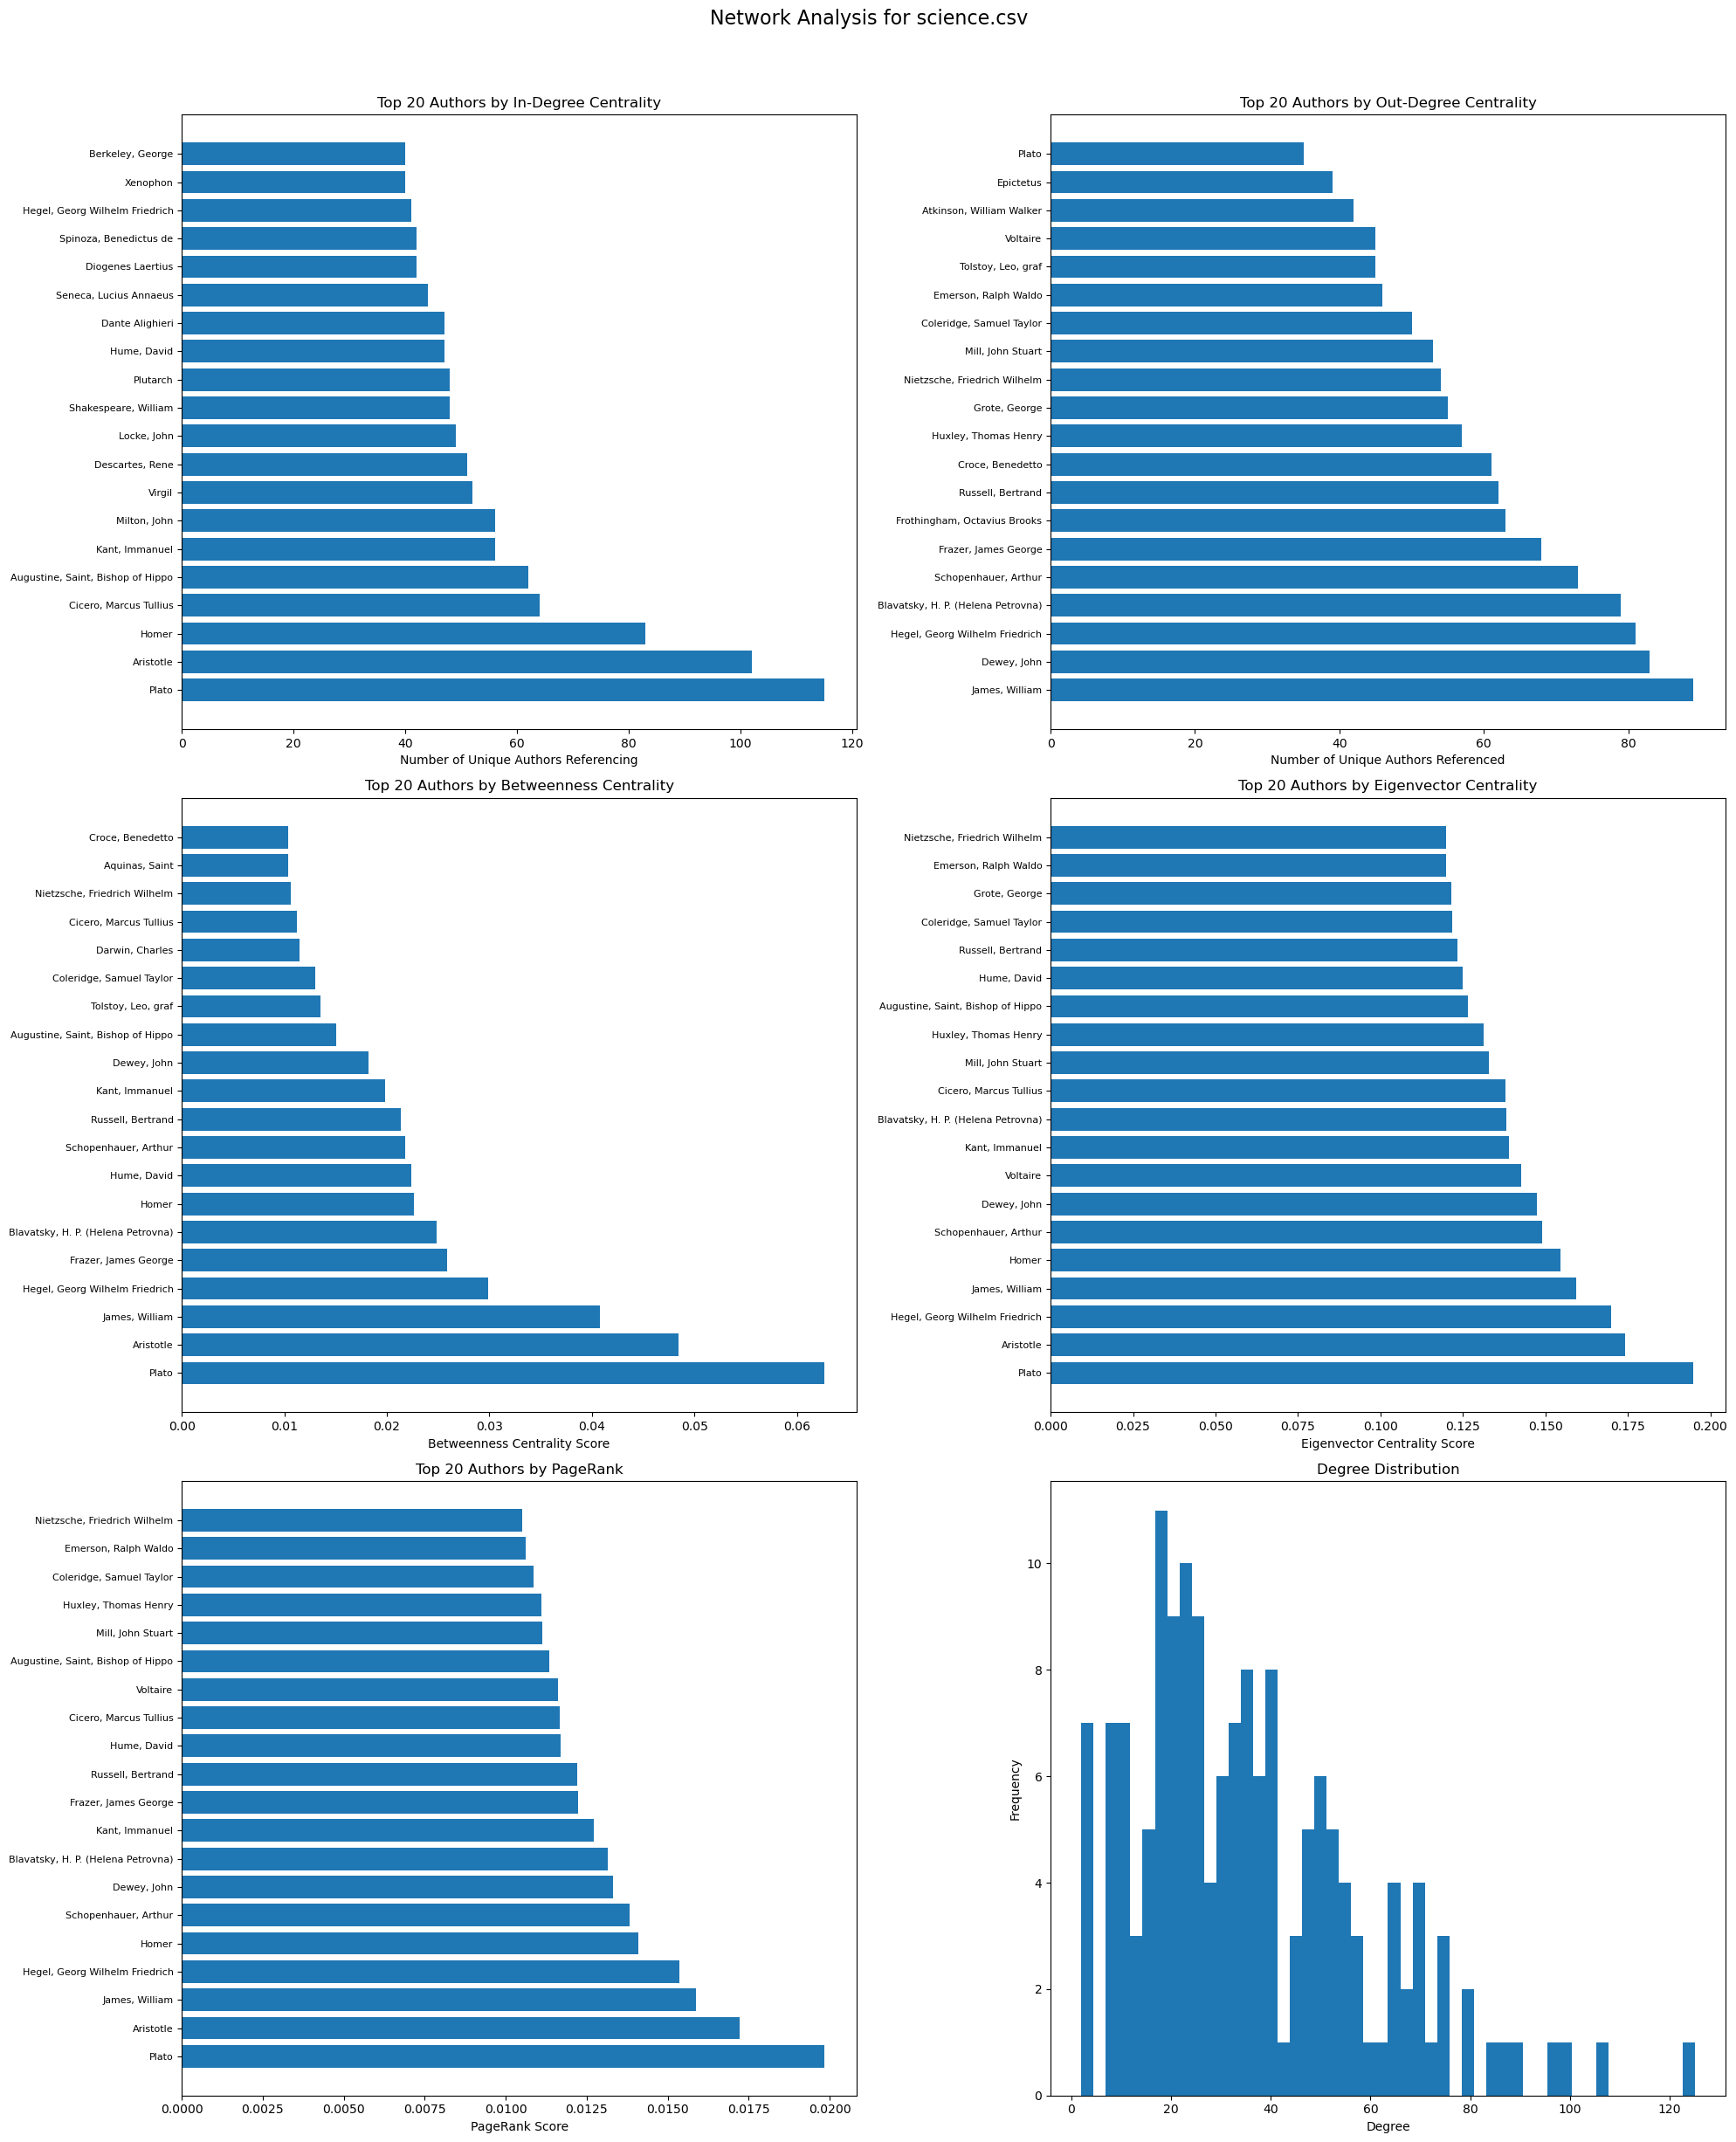


=== Analysis for ethics.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 104 unique authors referencing them
Aristotle: 99 unique authors referencing them
Homer: 66 unique authors referencing them
Cicero, Marcus Tullius: 63 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 58 unique authors referencing them
Kant, Immanuel: 54 unique authors referencing them
Descartes, Rene: 45 unique authors referencing them
Locke, John: 45 unique authors referencing them
Hume, David: 44 unique authors referencing them
Milton, John: 43 unique authors referencing them
Spinoza, Benedictus de: 41 unique authors referencing them
Plutarch: 39 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 38 unique authors referencing them
Voltaire: 37 unique authors referencing them
Rousseau, Jean-Jacques: 37 unique authors referencing them
Seneca, Lucius Annaeus: 37 unique authors referencing them
Dante Alighieri: 36 unique authors referencing them
Xenophon: 36 unique authors ref

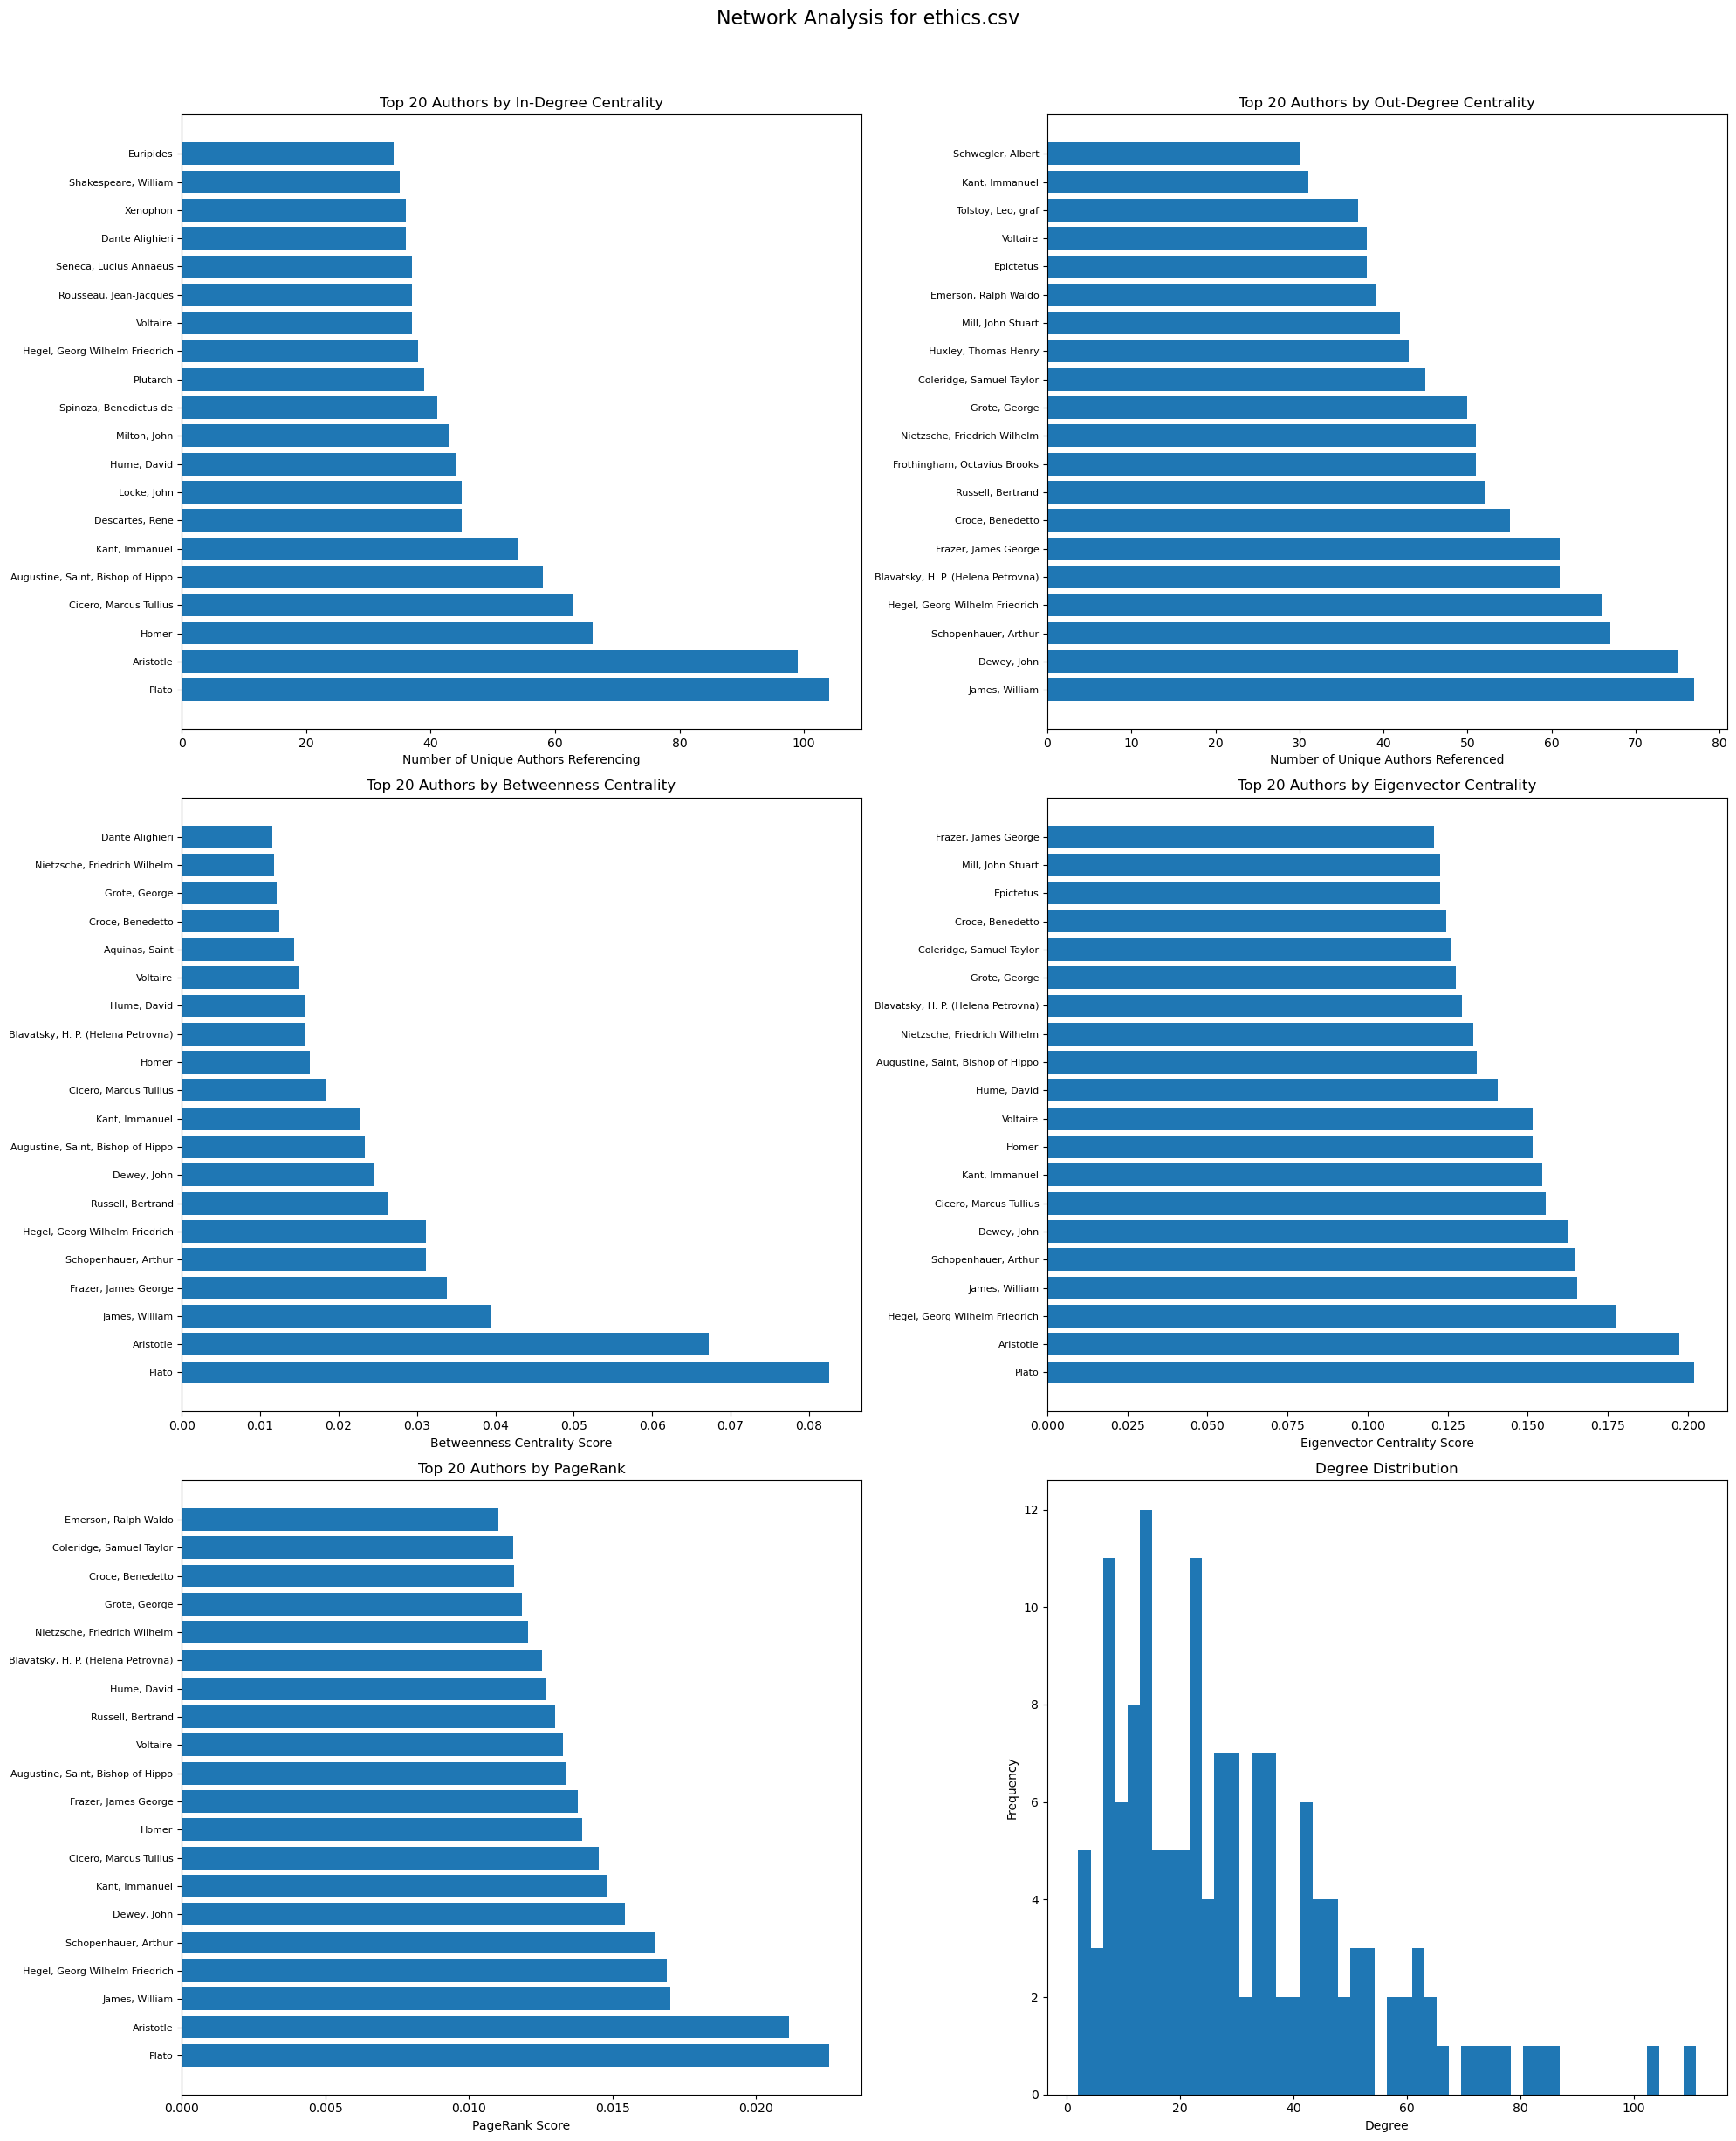


=== Analysis for epistemology.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 108 unique authors referencing them
Aristotle: 102 unique authors referencing them
Cicero, Marcus Tullius: 60 unique authors referencing them
Homer: 57 unique authors referencing them
Kant, Immanuel: 56 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 53 unique authors referencing them
Descartes, Rene: 53 unique authors referencing them
Locke, John: 50 unique authors referencing them
Spinoza, Benedictus de: 48 unique authors referencing them
Euclid: 45 unique authors referencing them
Milton, John: 44 unique authors referencing them
Plutarch: 43 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 41 unique authors referencing them
Hume, David: 41 unique authors referencing them
Voltaire: 39 unique authors referencing them
Rousseau, Jean-Jacques: 39 unique authors referencing them
Euripides: 39 unique authors referencing them
Diogenes Laertius: 38 unique authors referenci

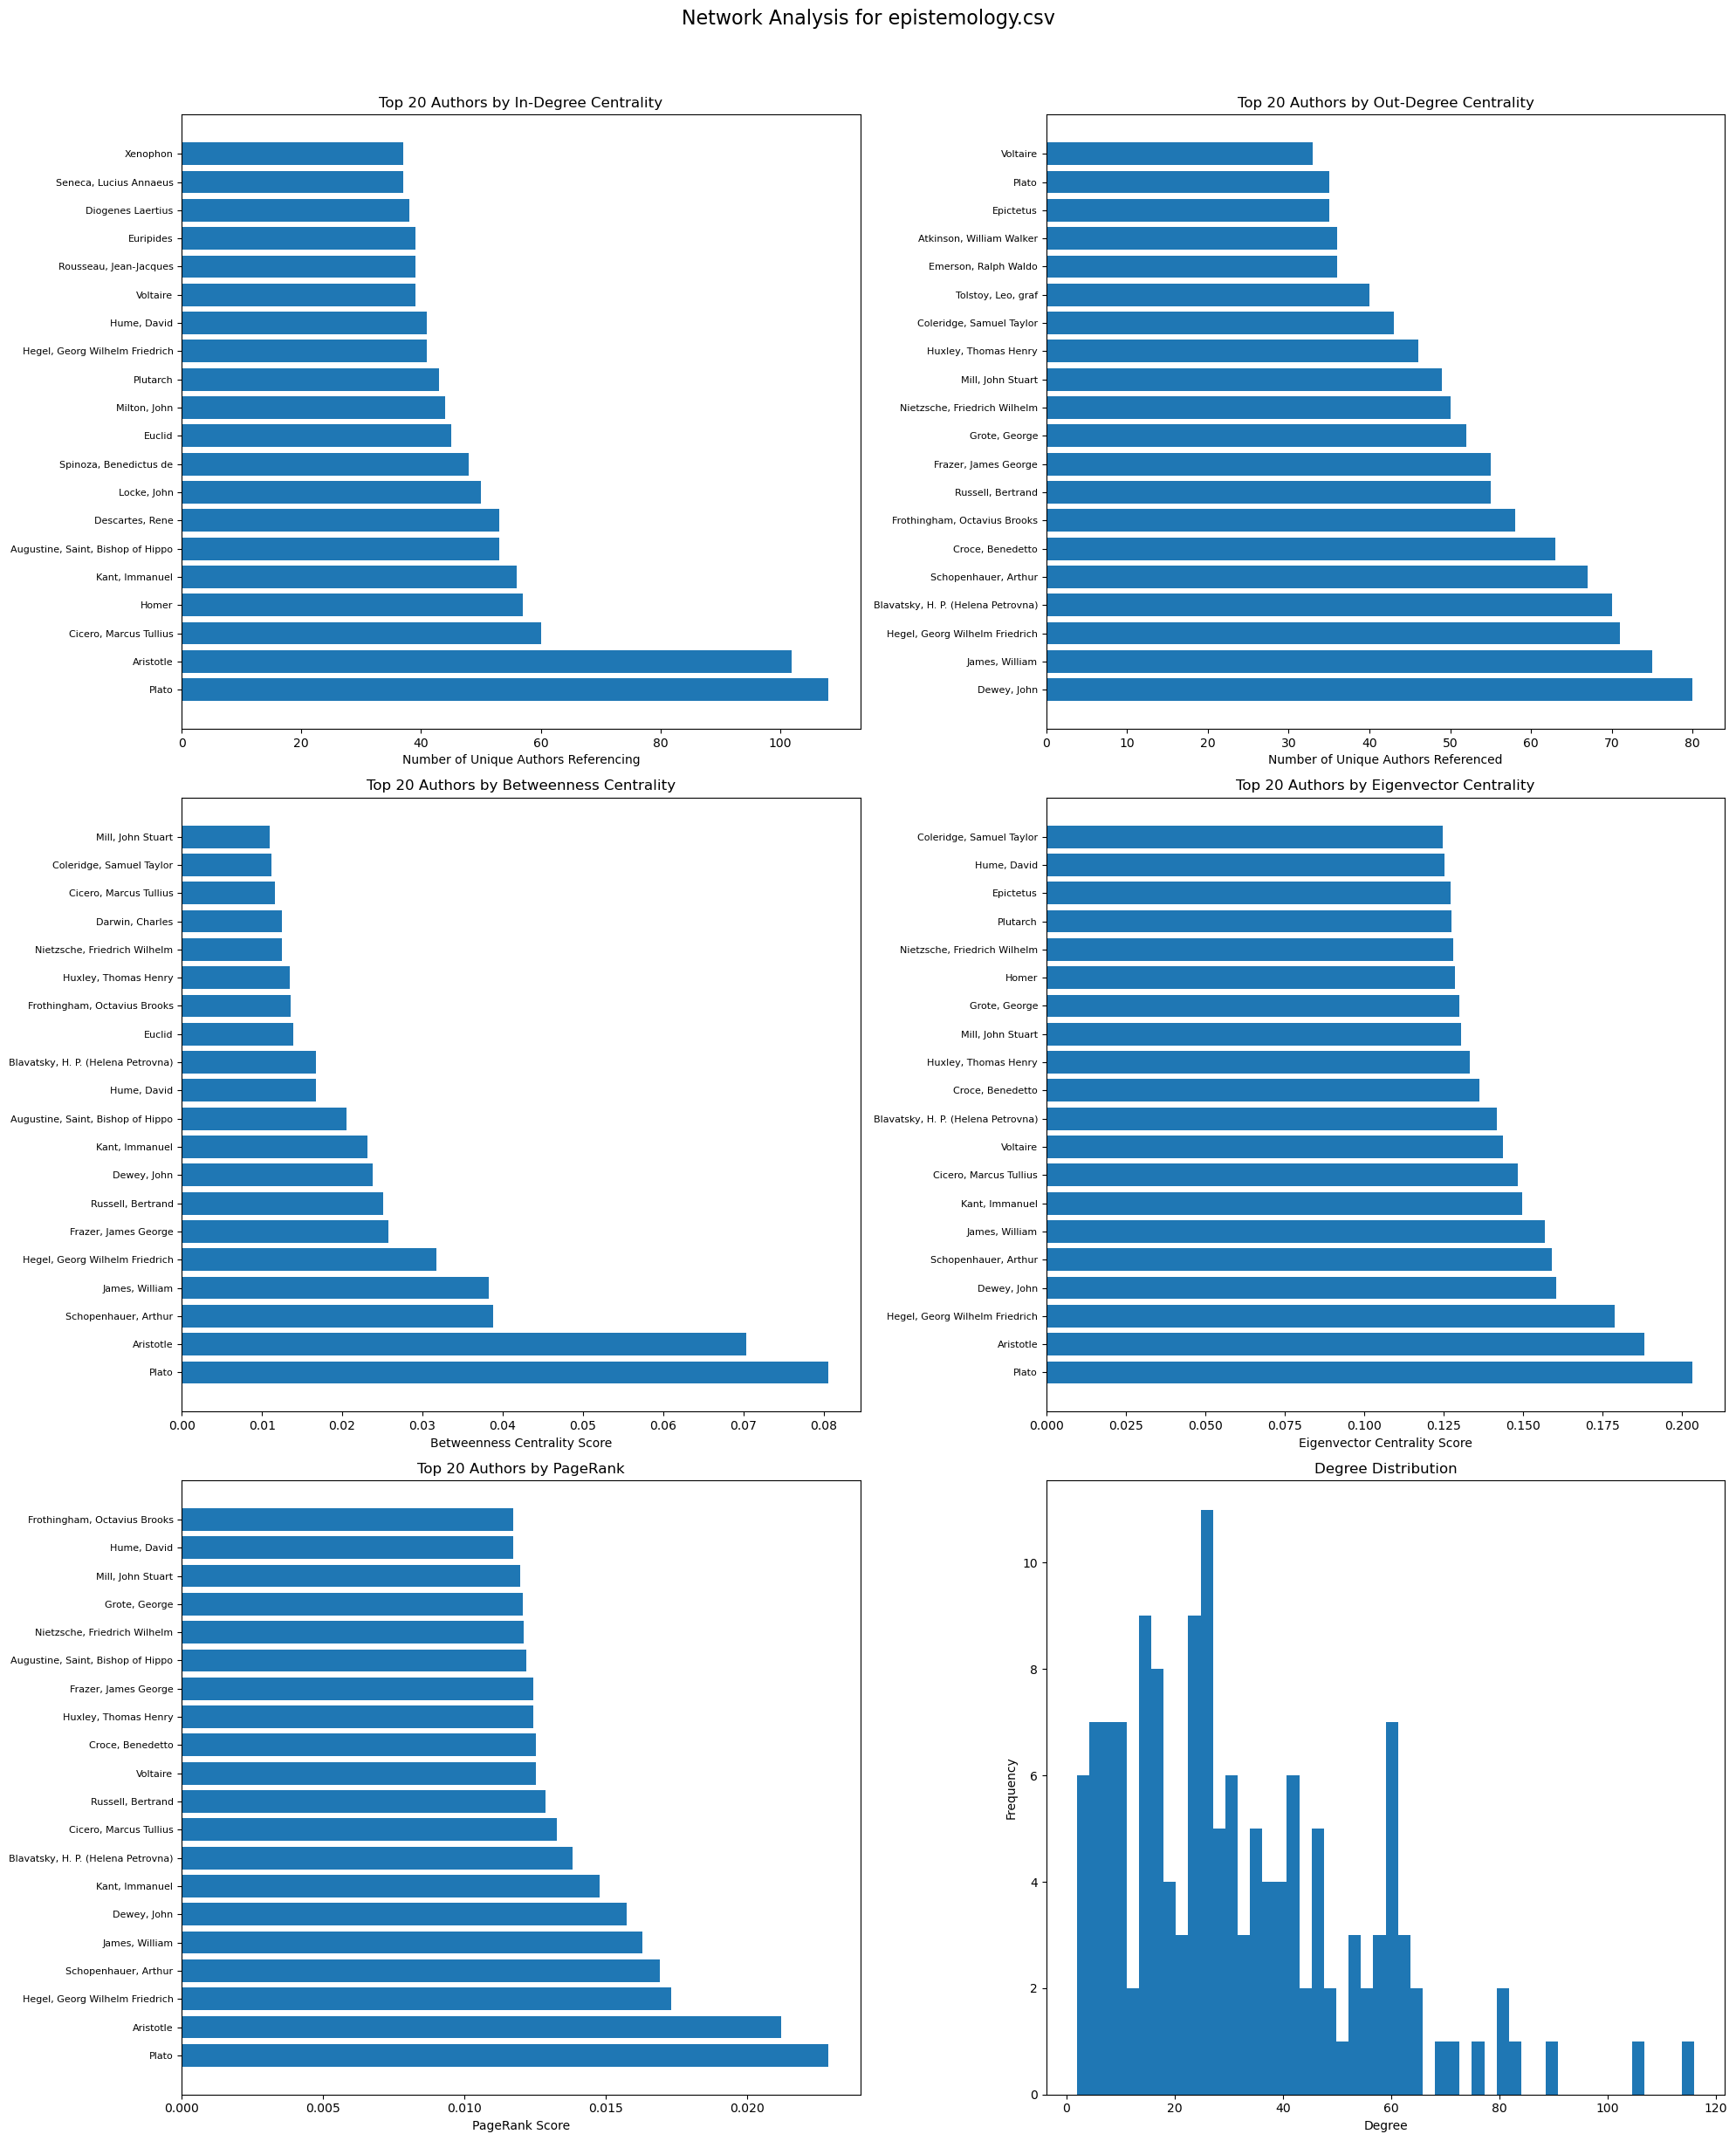


=== Analysis for religion.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 90 unique authors referencing them
Aristotle: 81 unique authors referencing them
Homer: 66 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 63 unique authors referencing them
Cicero, Marcus Tullius: 49 unique authors referencing them
Milton, John: 46 unique authors referencing them
Kant, Immanuel: 46 unique authors referencing them
Descartes, Rene: 42 unique authors referencing them
Seneca, Lucius Annaeus: 38 unique authors referencing them
Spinoza, Benedictus de: 36 unique authors referencing them
Locke, John: 35 unique authors referencing them
Dante Alighieri: 35 unique authors referencing them
Hume, David: 35 unique authors referencing them
Plutarch: 34 unique authors referencing them
Dionysius, of Alexandria, Saint: 33 unique authors referencing them
Shakespeare, William: 31 unique authors referencing them
Origen: 30 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 2

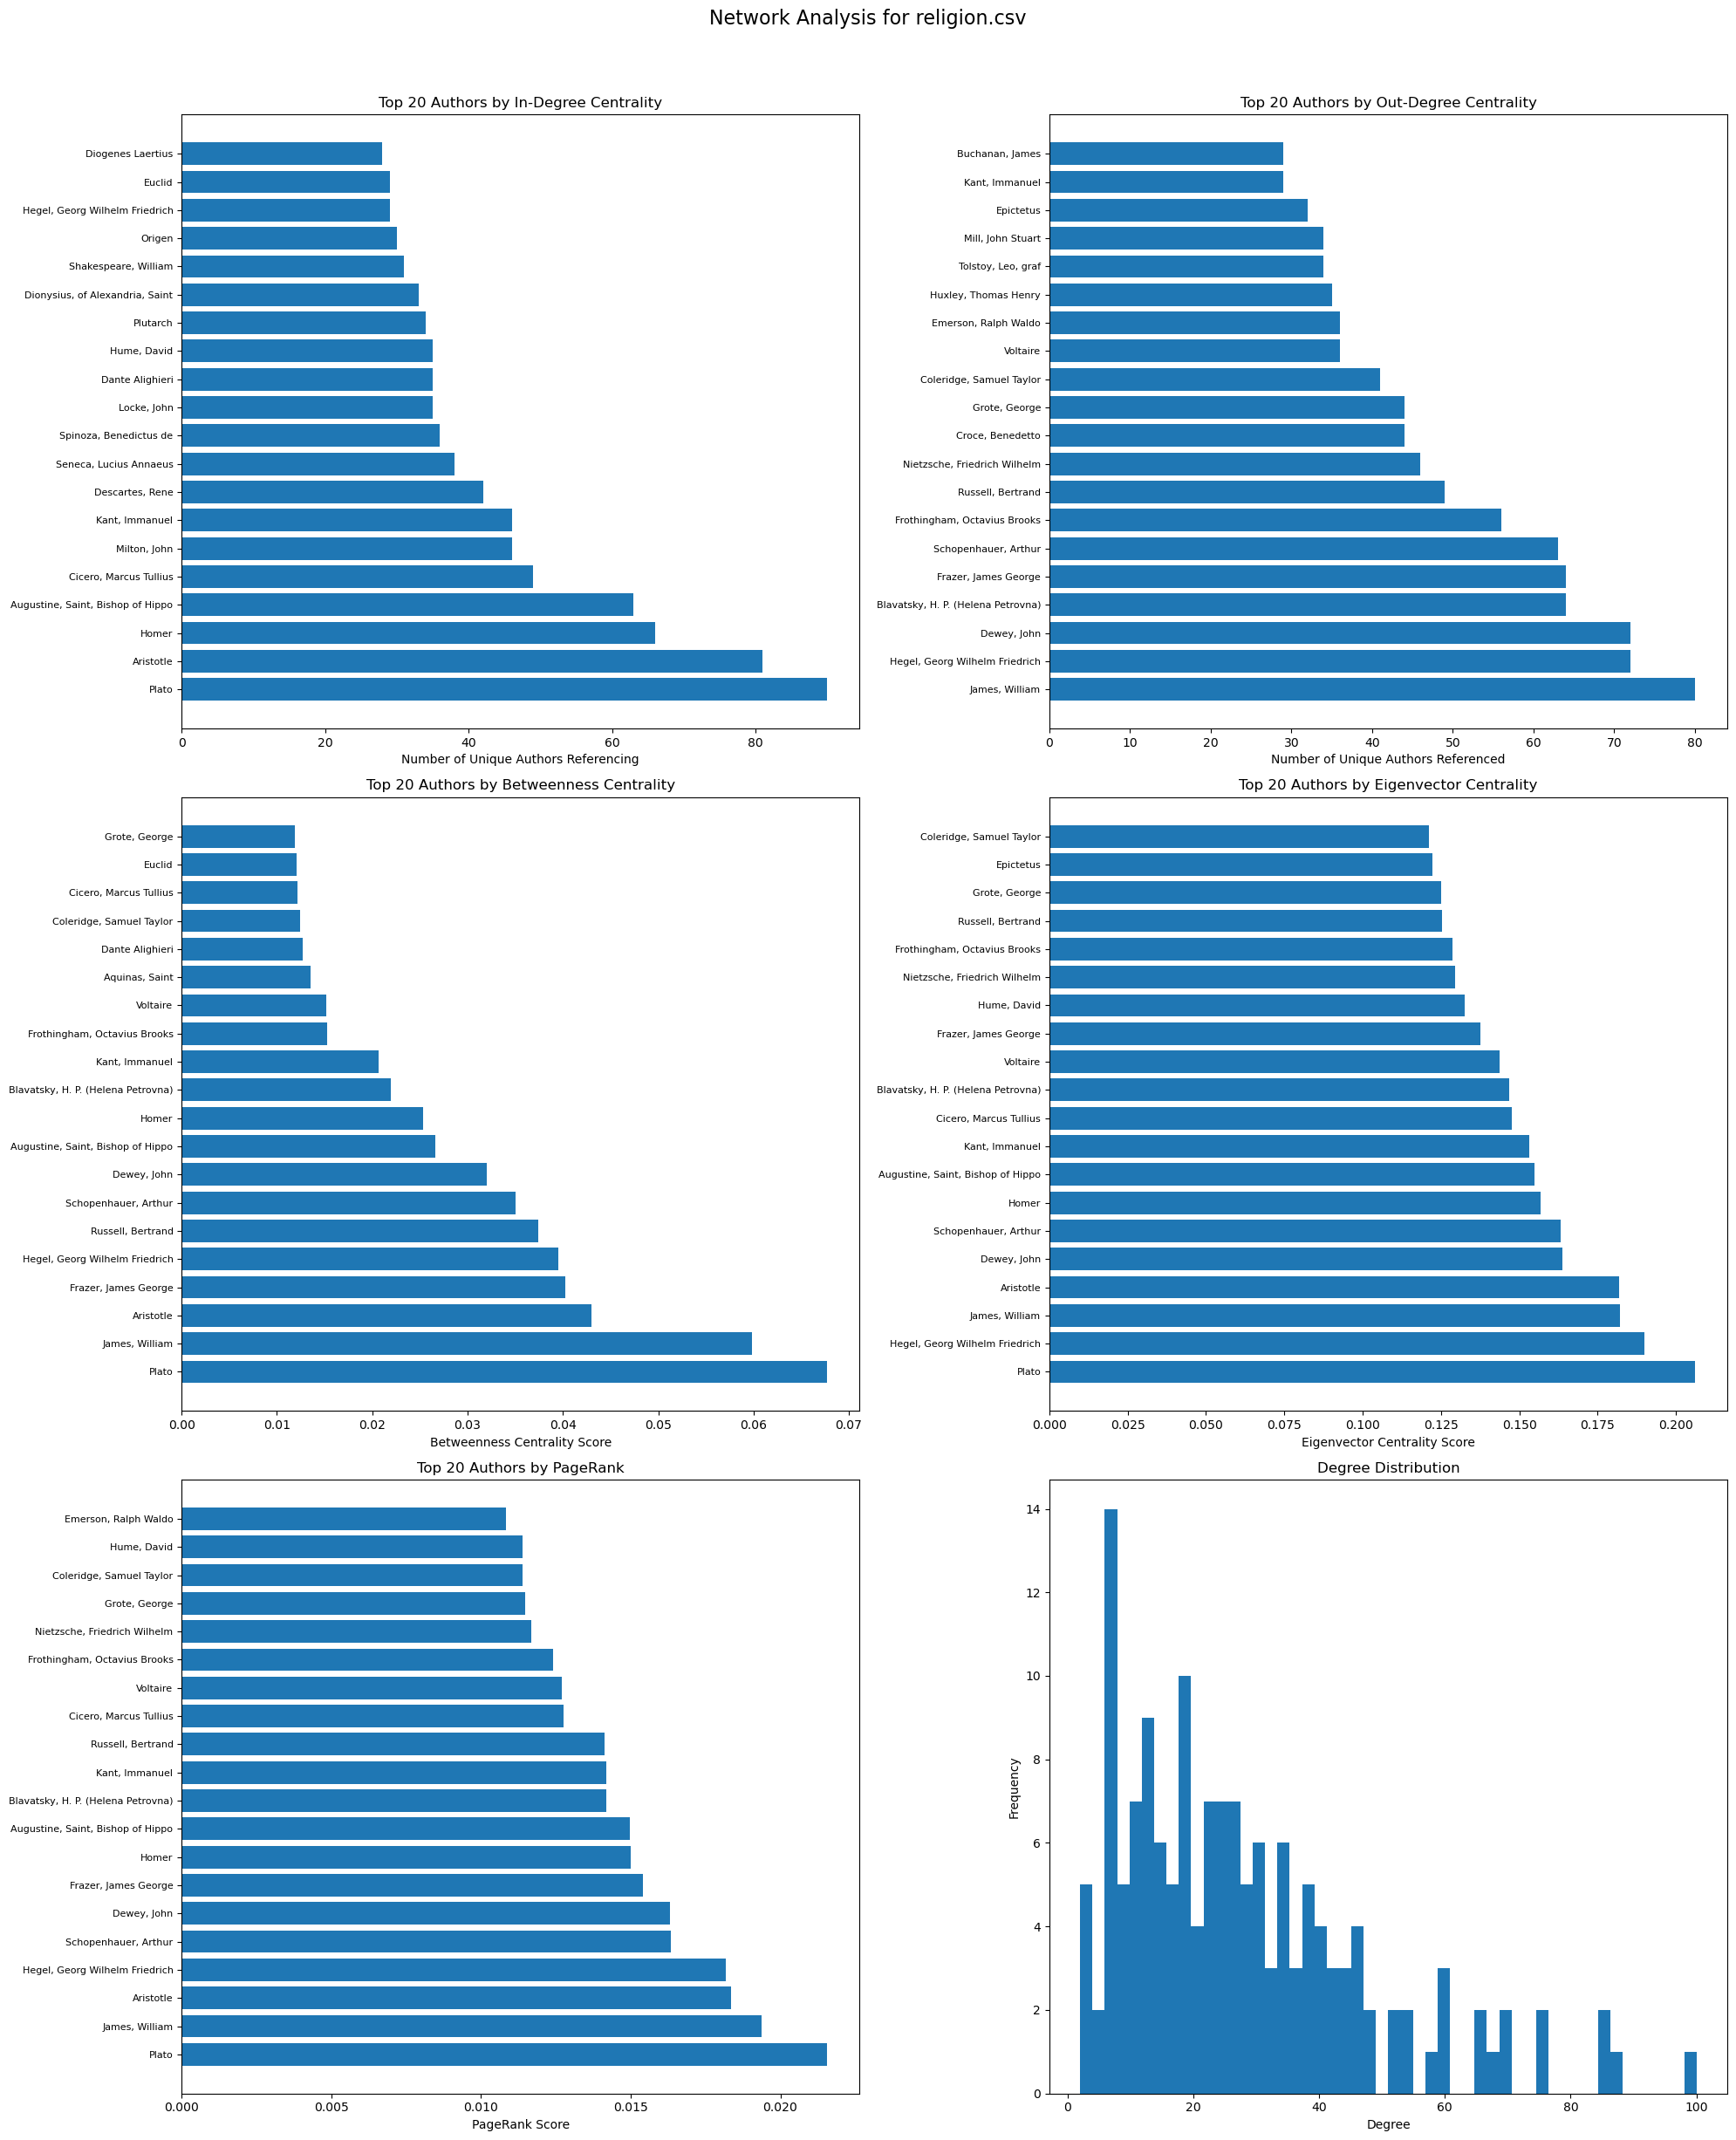


=== Analysis for metaphysics.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 111 unique authors referencing them
Aristotle: 104 unique authors referencing them
Homer: 63 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 61 unique authors referencing them
Kant, Immanuel: 58 unique authors referencing them
Cicero, Marcus Tullius: 57 unique authors referencing them
Descartes, Rene: 53 unique authors referencing them
Locke, John: 50 unique authors referencing them
Milton, John: 49 unique authors referencing them
Spinoza, Benedictus de: 49 unique authors referencing them
Hume, David: 47 unique authors referencing them
Plutarch: 44 unique authors referencing them
Euclid: 43 unique authors referencing them
Dante Alighieri: 43 unique authors referencing them
Seneca, Lucius Annaeus: 42 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 42 unique authors referencing them
Rousseau, Jean-Jacques: 39 unique authors referencing them
Goethe, Johann Wolfgang von

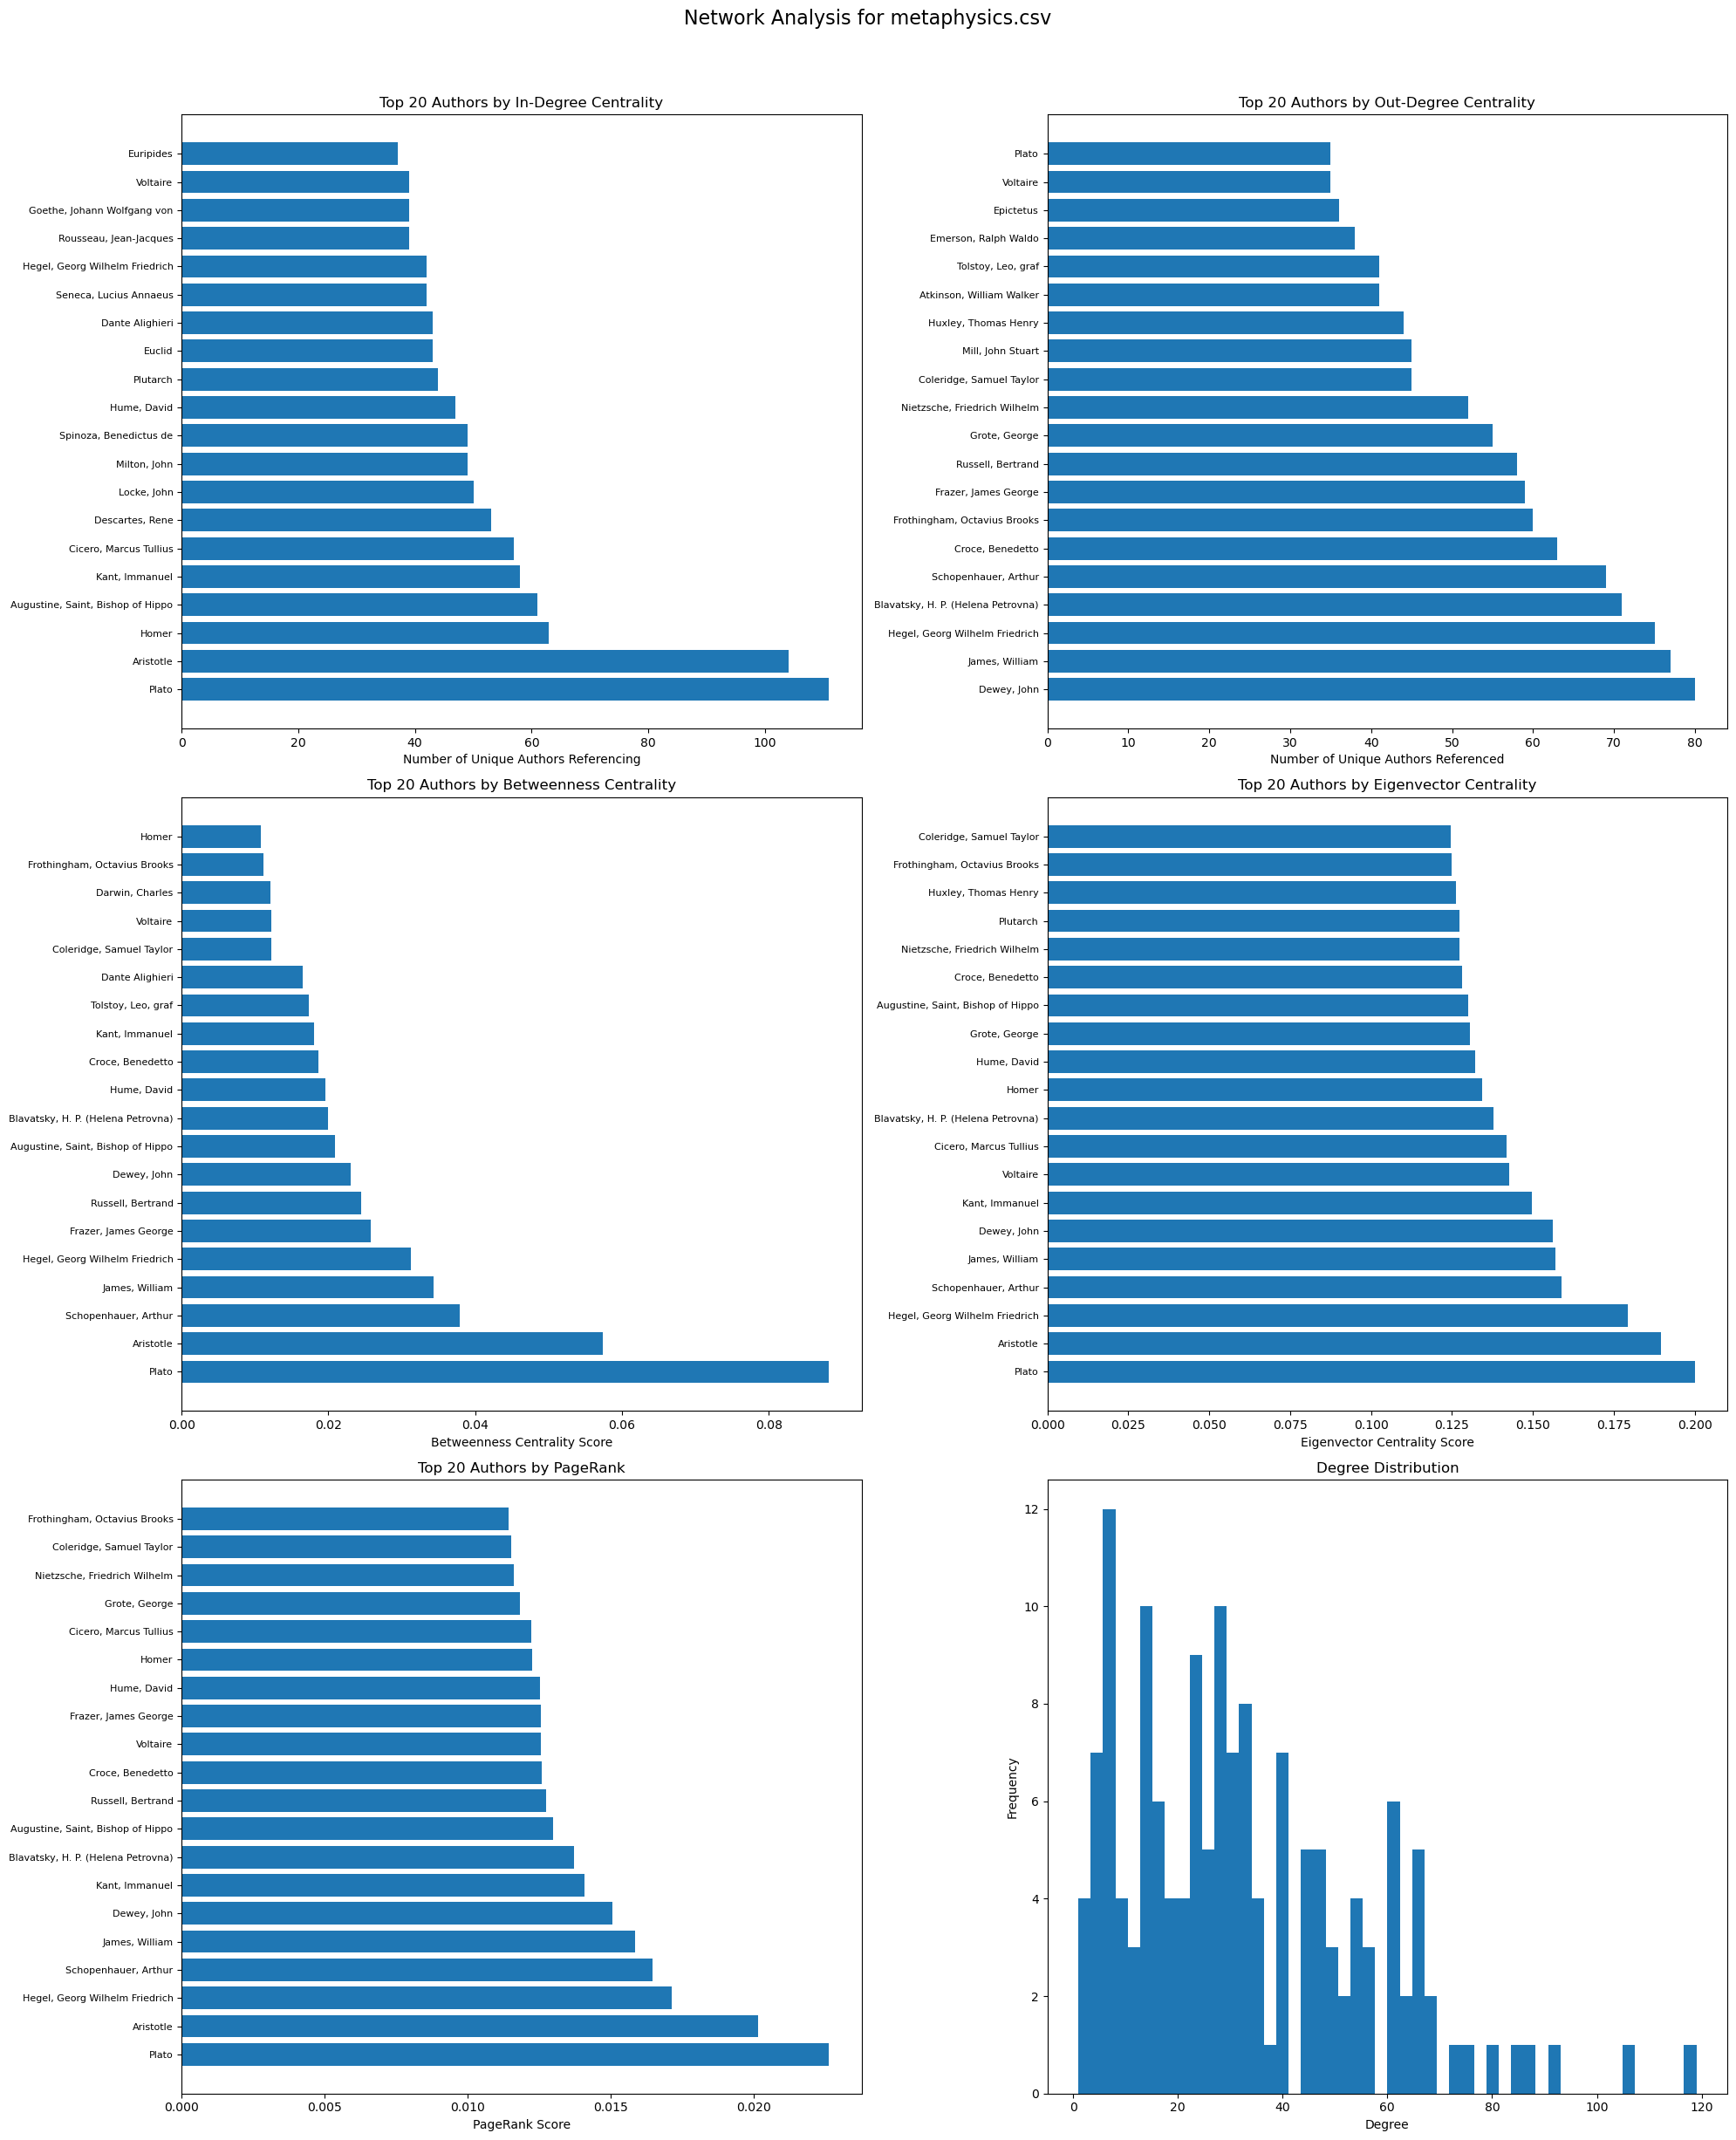


=== Analysis for mathematics.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 66 unique authors referencing them
Aristotle: 64 unique authors referencing them
Homer: 43 unique authors referencing them
Kant, Immanuel: 35 unique authors referencing them
Euclid: 31 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 31 unique authors referencing them
Hume, David: 31 unique authors referencing them
Locke, John: 31 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 29 unique authors referencing them
Spinoza, Benedictus de: 27 unique authors referencing them
Cicero, Marcus Tullius: 25 unique authors referencing them
Voltaire: 23 unique authors referencing them
Darwin, Charles: 23 unique authors referencing them
Goethe, Johann Wolfgang von: 22 unique authors referencing them
Plutarch: 21 unique authors referencing them
Rousseau, Jean-Jacques: 21 unique authors referencing them
Pascal, Blaise: 21 unique authors referencing them
Hobbes, Thomas: 20 unique aut

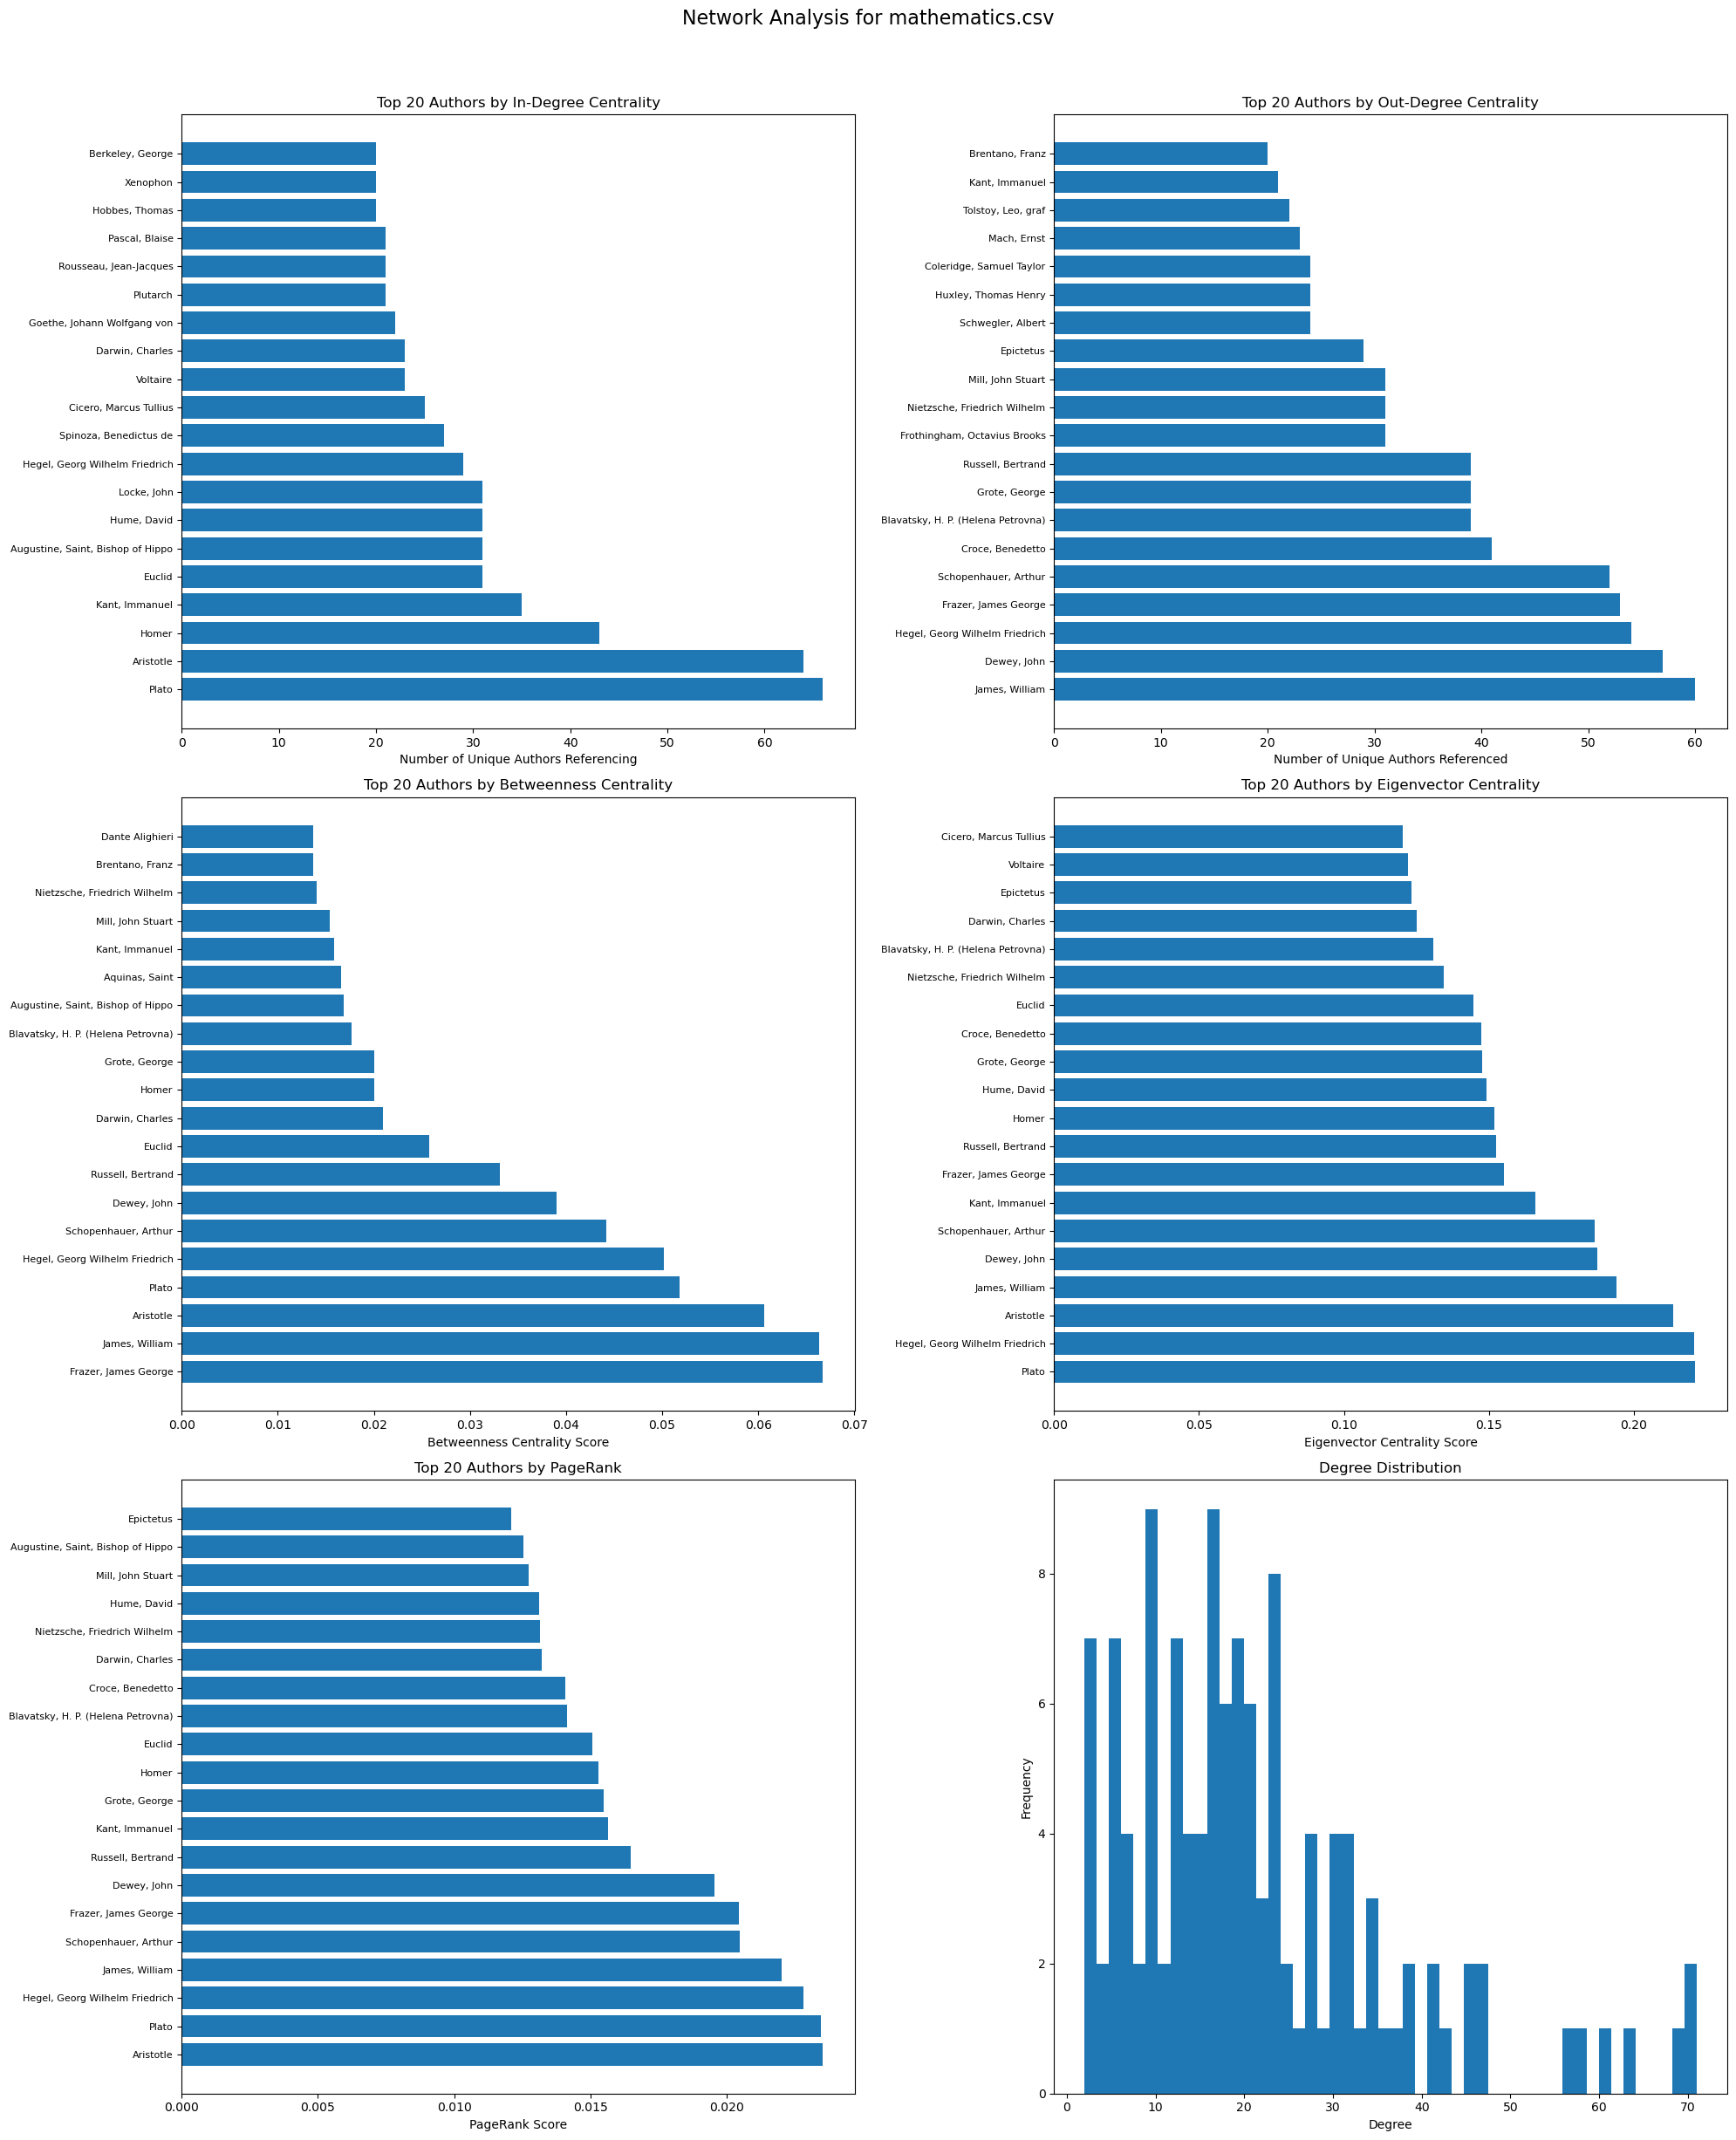


=== Analysis for politics.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 72 unique authors referencing them
Aristotle: 55 unique authors referencing them
Cicero, Marcus Tullius: 39 unique authors referencing them
Homer: 39 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 37 unique authors referencing them
Kant, Immanuel: 30 unique authors referencing them
Voltaire: 27 unique authors referencing them
Hume, David: 26 unique authors referencing them
Plutarch: 24 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 23 unique authors referencing them
Rousseau, Jean-Jacques: 21 unique authors referencing them
Seneca, Lucius Annaeus: 21 unique authors referencing them
Darwin, Charles: 19 unique authors referencing them
Dante Alighieri: 19 unique authors referencing them
Xenophon: 19 unique authors referencing them
Diogenes Laertius: 18 unique authors referencing them
Plotinus: 18 unique authors referencing them
Euripides: 18 unique authors referencing t

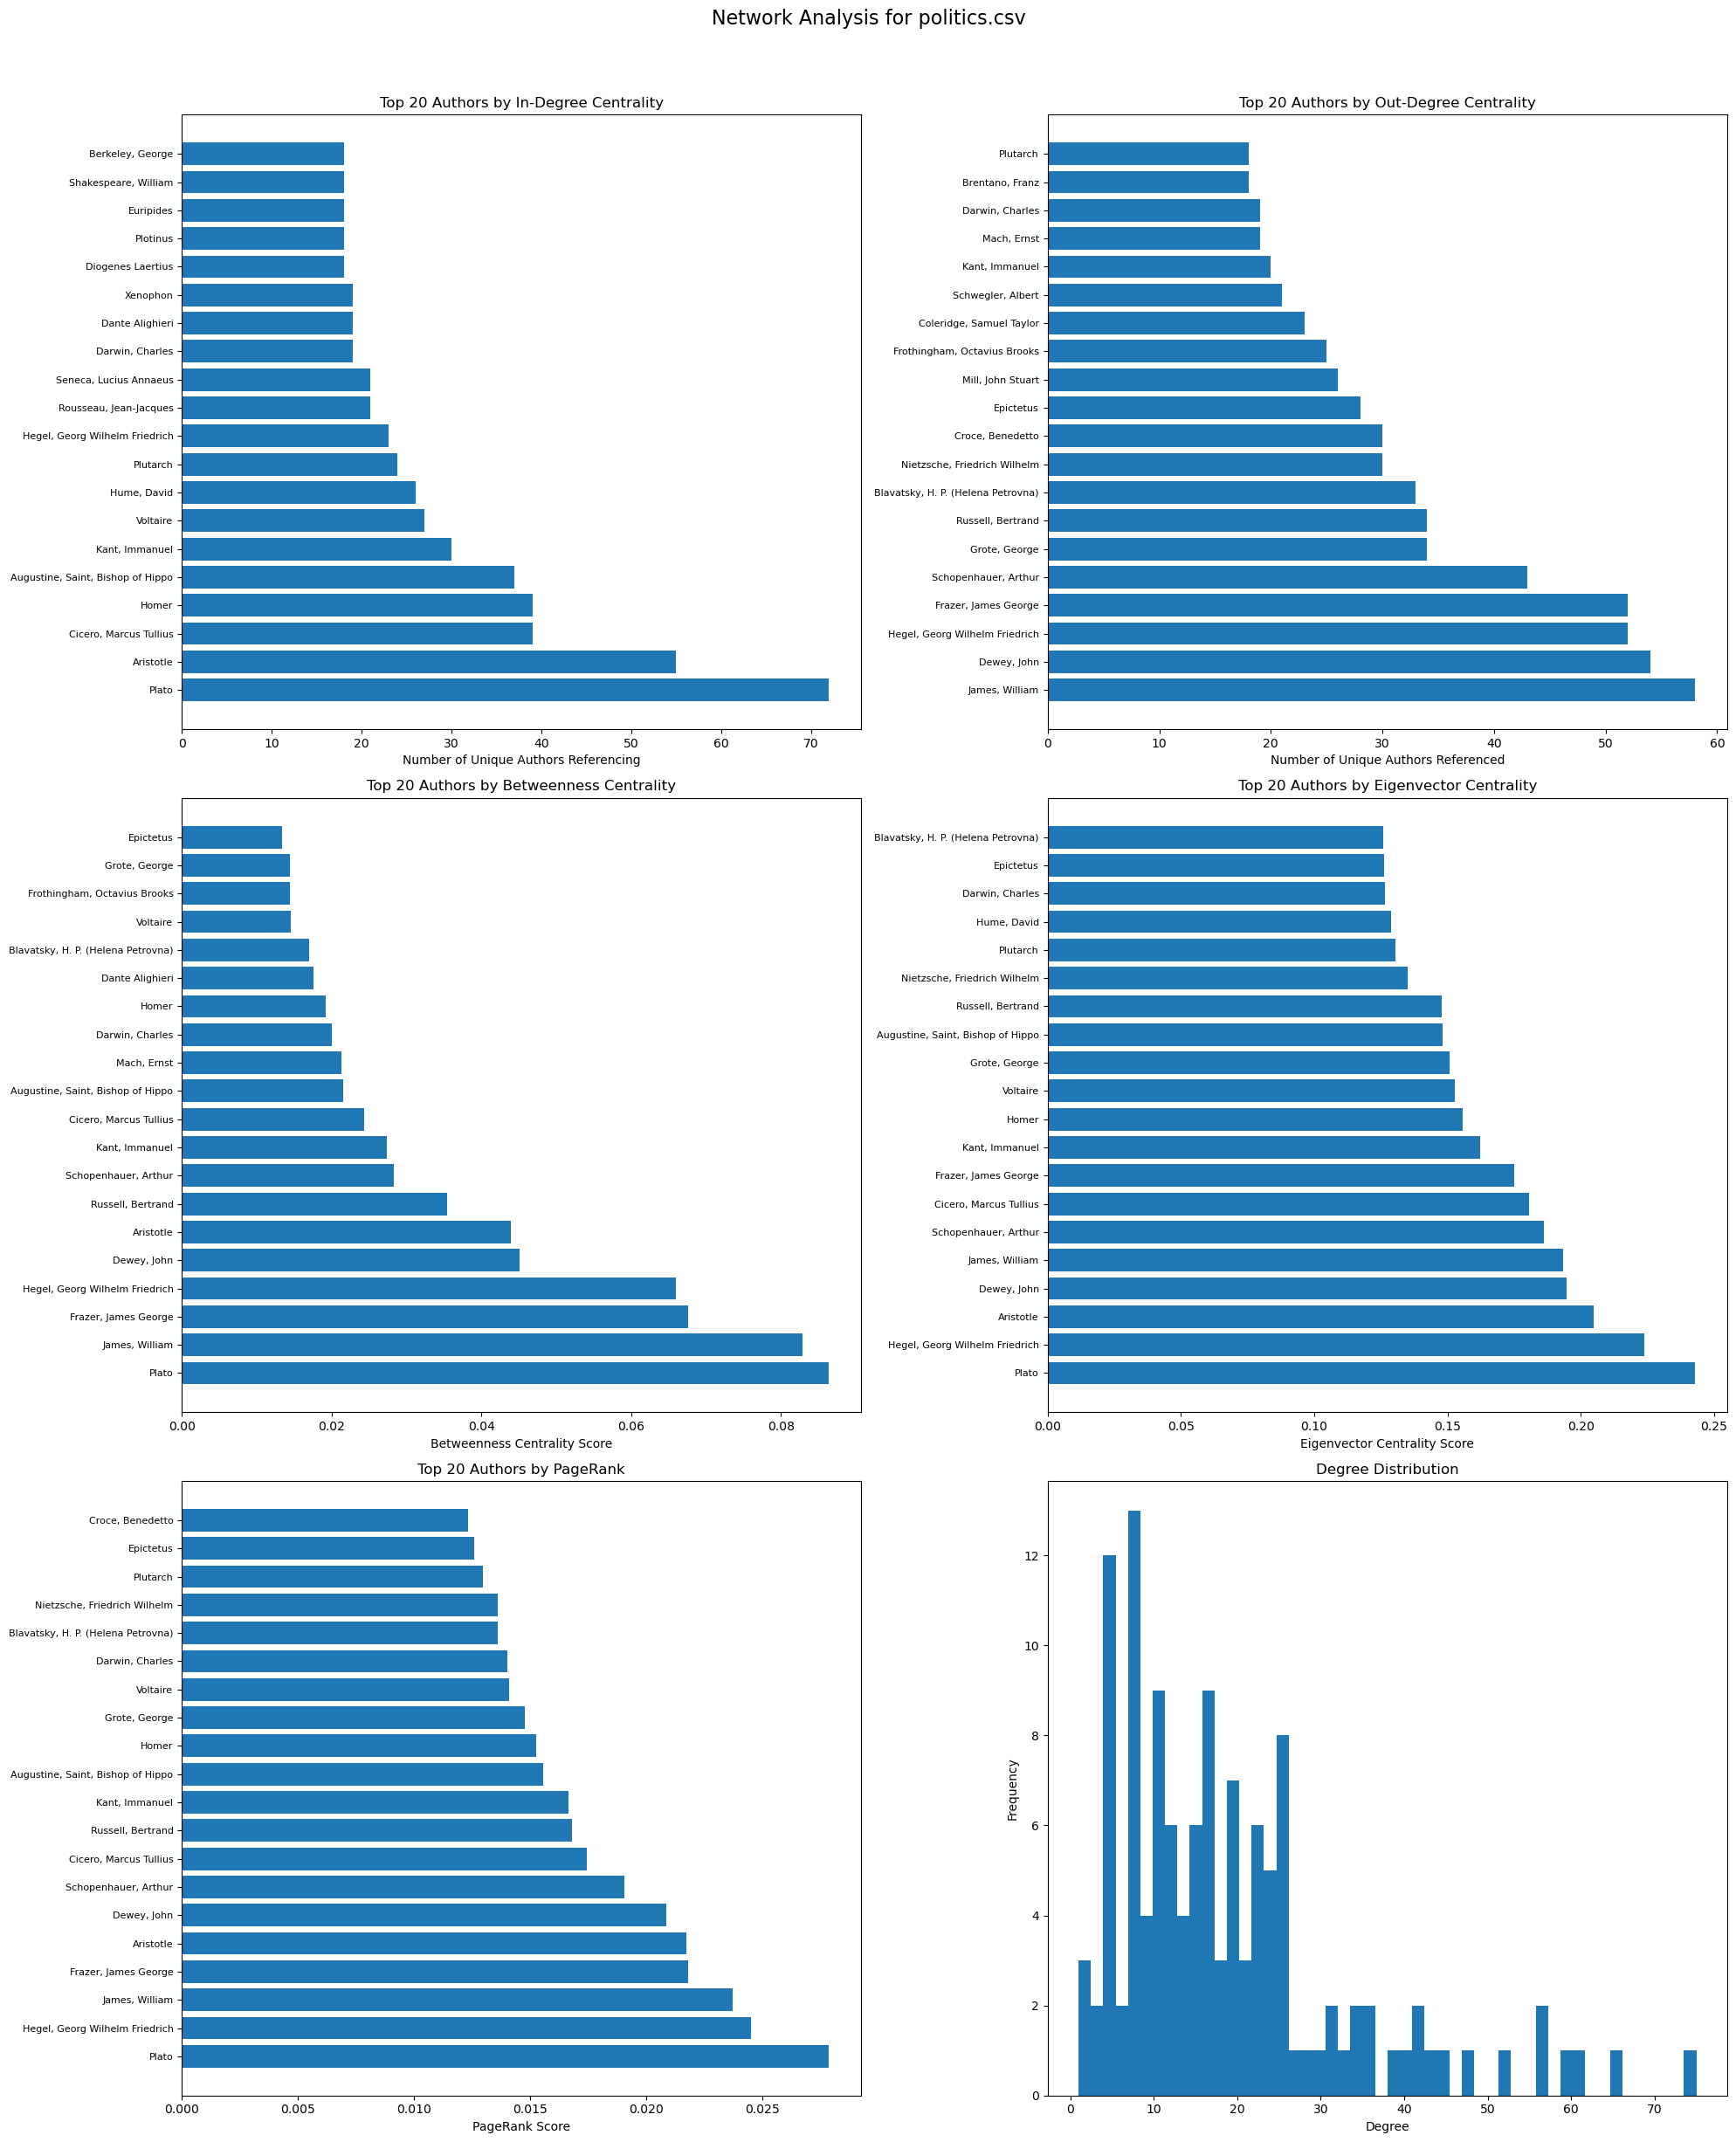


=== Analysis for art.csv ===


Top 20 Authors by In-Degree Centrality:
Plato: 95 unique authors referencing them
Aristotle: 80 unique authors referencing them
Homer: 75 unique authors referencing them
Milton, John: 53 unique authors referencing them
Cicero, Marcus Tullius: 51 unique authors referencing them
Augustine, Saint, Bishop of Hippo: 51 unique authors referencing them
Dante Alighieri: 48 unique authors referencing them
Kant, Immanuel: 45 unique authors referencing them
Shakespeare, William: 43 unique authors referencing them
Descartes, Rene: 42 unique authors referencing them
Locke, John: 42 unique authors referencing them
Goethe, Johann Wolfgang von: 41 unique authors referencing them
Virgil: 40 unique authors referencing them
Seneca, Lucius Annaeus: 38 unique authors referencing them
Plutarch: 37 unique authors referencing them
Hegel, Georg Wilhelm Friedrich: 35 unique authors referencing them
Hume, David: 33 unique authors referencing them
Rousseau, Jean-Jacques: 32 unique 

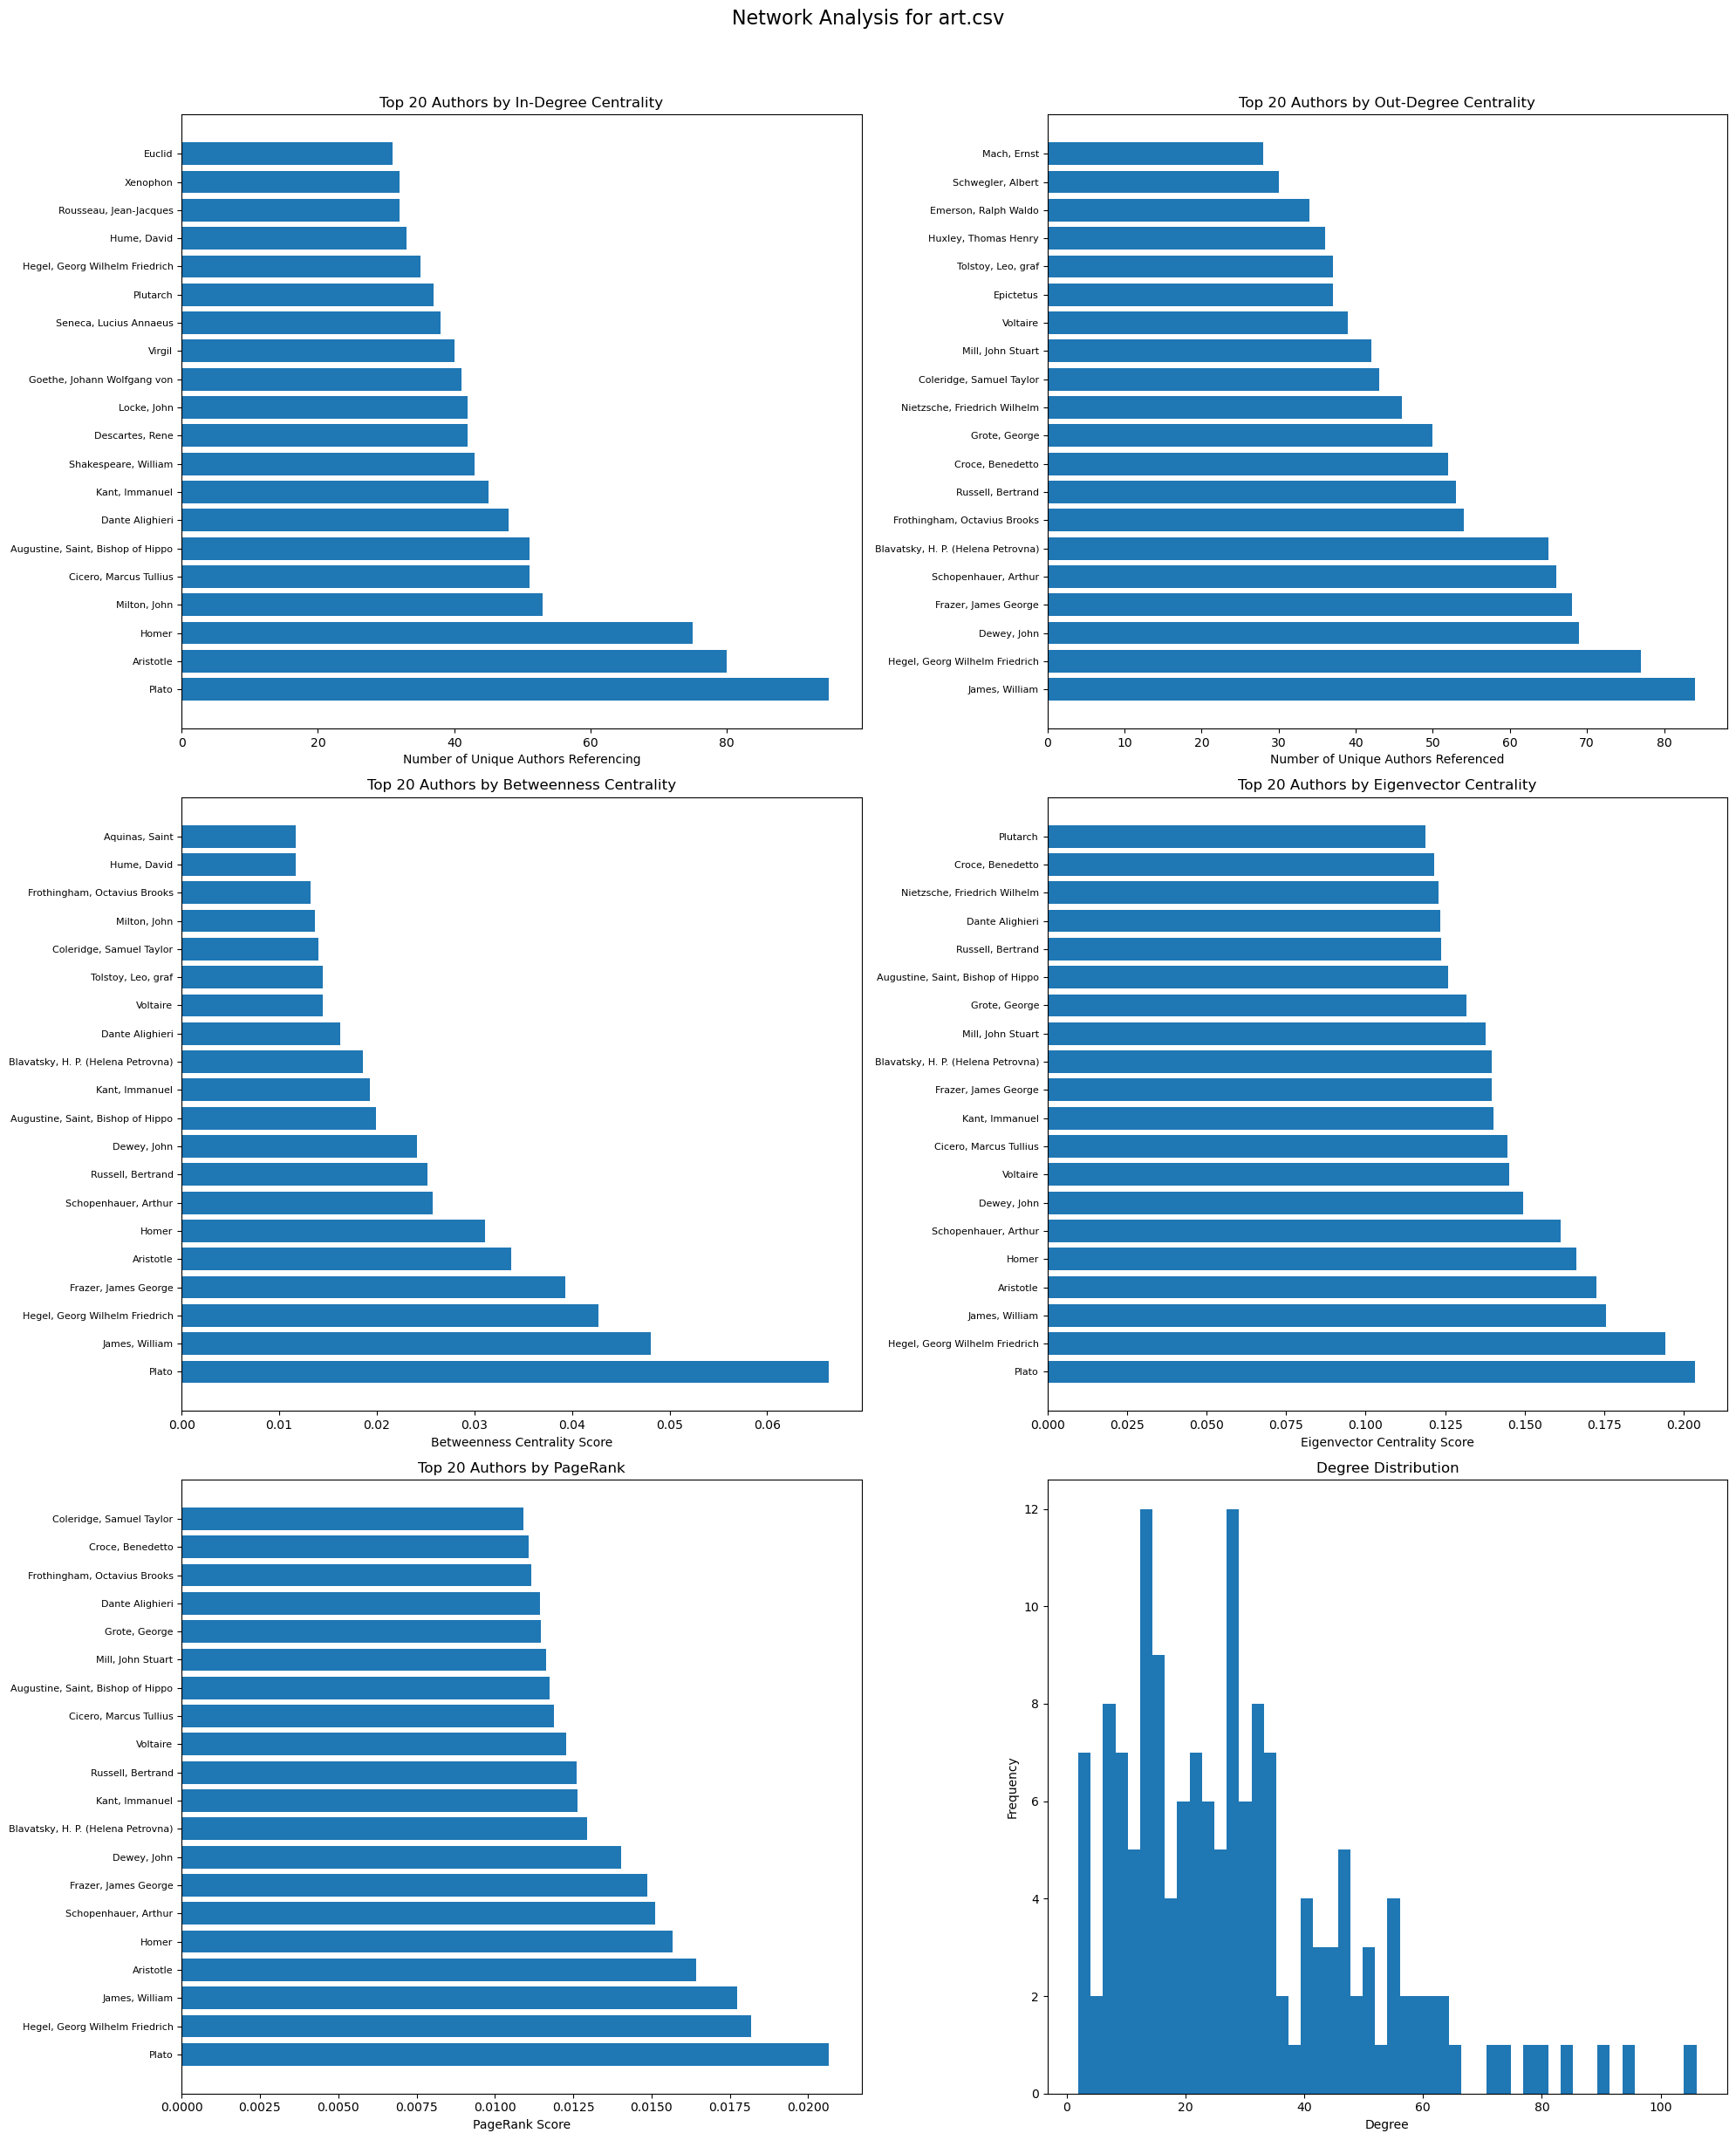

In [41]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

files = ['science.csv', 'ethics.csv', 'epistemology.csv', 'religion.csv', 'metaphysics.csv', 'mathematics.csv', 'politics.csv', 'art.csv']

for file in files:
    print(f"\n=== Analysis for {file} ===\n")
    
    df = pd.read_csv(f'data/{file}', index_col=0)

    # Remove any authors that don't appear in both index and columns
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]

    # In-degree centrality
    in_degree = (df > 0).sum()
    top_20_in_degree = in_degree.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by In-Degree Centrality:")
    print("=====================================")
    for author, refs in top_20_in_degree.items():
        print(f"{author}: {int(refs)} unique authors referencing them")

    # Out-degree centrality
    out_degree = (df > 0).sum(axis=1)
    top_20_out_degree = out_degree.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by Out-Degree Centrality:")
    print("=====================================")
    for author, refs in top_20_out_degree.items():
        print(f"{author}: {int(refs)} unique authors referenced")

    # Create network graph
    G = nx.from_pandas_adjacency(df > 0)

    # Betweenness centrality
    betweenness = nx.betweenness_centrality(G)
    betweenness_series = pd.Series(betweenness)
    top_20_betweenness = betweenness_series.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by Betweenness Centrality:")
    print("=====================================")
    for author, centrality in top_20_betweenness.items():
        print(f"{author}: {centrality:.4f}")

    # Eigenvector Centrality
    eigenvector = nx.eigenvector_centrality(G)
    eigenvector_series = pd.Series(eigenvector)
    top_20_eigenvector = eigenvector_series.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by Eigenvector Centrality (Influence):")
    print("================================================")
    for author, centrality in top_20_eigenvector.items():
        print(f"{author}: {centrality:.4f}")

    # PageRank
    pagerank = nx.pagerank(G)
    pagerank_series = pd.Series(pagerank)
    top_20_pagerank = pagerank_series.sort_values(ascending=False).head(20)

    print("\nTop 20 Authors by PageRank:")
    print("========================")
    for author, rank in top_20_pagerank.items():
        print(f"{author}: {rank:.4f}")

    # Network Statistics
    print("\nNetwork Statistics:")
    print("==================")
    print(f"Number of authors: {len(G.nodes())}")
    print(f"Number of citations: {len(G.edges())}")
    print(f"Network density: {nx.density(G):.4f}")
    print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

    # Create figure with all subplots
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 24))
    fig.suptitle(f'Network Analysis for {file}', fontsize=16, y=1.02)

    # Plot in-degree centrality
    ax1.barh(top_20_in_degree.index, top_20_in_degree.values)
    ax1.set_title('Top 20 Authors by In-Degree Centrality')
    ax1.set_xlabel('Number of Unique Authors Referencing')
    plt.setp(ax1.get_yticklabels(), fontsize=8)

    # Plot out-degree centrality
    ax2.barh(top_20_out_degree.index, top_20_out_degree.values)
    ax2.set_title('Top 20 Authors by Out-Degree Centrality')
    ax2.set_xlabel('Number of Unique Authors Referenced')
    plt.setp(ax2.get_yticklabels(), fontsize=8)

    # Plot betweenness centrality
    ax3.barh(top_20_betweenness.index, top_20_betweenness.values)
    ax3.set_title('Top 20 Authors by Betweenness Centrality')
    ax3.set_xlabel('Betweenness Centrality Score')
    plt.setp(ax3.get_yticklabels(), fontsize=8)

    # Plot eigenvector centrality
    ax4.barh(top_20_eigenvector.index, top_20_eigenvector.values)
    ax4.set_title('Top 20 Authors by Eigenvector Centrality')
    ax4.set_xlabel('Eigenvector Centrality Score')
    plt.setp(ax4.get_yticklabels(), fontsize=8)

    # Plot PageRank
    ax5.barh(top_20_pagerank.index, top_20_pagerank.values)
    ax5.set_title('Top 20 Authors by PageRank')
    ax5.set_xlabel('PageRank Score')
    plt.setp(ax5.get_yticklabels(), fontsize=8)

    # Plot degree distribution
    degrees = [d for n, d in G.degree()]
    ax6.hist(degrees, bins=50)
    ax6.set_title('Degree Distribution')
    ax6.set_xlabel('Degree')
    ax6.set_ylabel('Frequency')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [42]:
df_main = pd.read_csv('data/main.csv', index_col=0)
common_authors = df_main.index.intersection(df_main.columns)
df_main = df_main.loc[common_authors, common_authors]
G = nx.from_pandas_adjacency(df_main > 0)

print("\nAdditional Network Properties for main.csv:")
print("=========================================")

is_planar, _ = nx.check_planarity(G)
print(f"Is planar: {is_planar}")
core_numbers = nx.core_number(G)
treewidth_lb = max(core_numbers.values())
print(f"Treewidth lower bound (degeneracy): {treewidth_lb}")

import json
import gzip

adj_list = dict(G.adjacency())
graph_str = json.dumps([(n, list(neighbors)) for n, neighbors in adj_list.items()])
original_size = len(graph_str)
compressed_size = len(gzip.compress(graph_str.encode()))
compression_ratio = compressed_size / original_size

print(f"Compression ratio (approximating Kolmogorov complexity): {compression_ratio:.4f}")
print(f"Original size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")


Additional Network Properties for main.csv:
Is planar: False
Treewidth lower bound (degeneracy): 35
Compression ratio (approximating Kolmogorov complexity): 0.0689
Original size: 163384 bytes
Compressed size: 11264 bytes


In [43]:
import community
datasets = ['main.csv', 'strong_filter.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']

for file in datasets:
    print(f"\n\nNetwork Properties for {file}:")
    print("=" * (len(file) + 20))
    
    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    G = nx.from_pandas_adjacency(df > 0)
    
    is_planar, _ = nx.check_planarity(G)
    print(f"Is planar: {is_planar}")
    
    core_numbers = nx.core_number(G)
    treewidth_lb = max(core_numbers.values())
    print(f"Treewidth lower bound (degeneracy): {treewidth_lb}")
    
    adj_list = dict(G.adjacency())
    graph_str = json.dumps([(n, list(neighbors)) for n, neighbors in adj_list.items()])
    original_size = len(graph_str)
    compressed_size = len(gzip.compress(graph_str.encode()))
    compression_ratio = compressed_size / original_size
    
    print(f"Compression ratio (approximating Kolmogorov complexity): {compression_ratio:.4f}")
    print(f"Original size: {original_size} bytes")
    print(f"Compressed size: {compressed_size} bytes")
    
    try:
        communities = community.best_partition(G)
        modularity = community.modularity(communities, G)
        num_communities = len(set(communities.values()))
        print(f"Modularity: {modularity:.4f}")
        print(f"Number of communities: {num_communities}")
    except Exception as e:
        print(f"Could not compute modularity: {str(e)}")
    
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Graph density: {nx.density(G):.4f}")



Network Properties for main.csv:
Is planar: False
Treewidth lower bound (degeneracy): 35
Compression ratio (approximating Kolmogorov complexity): 0.0689
Original size: 163384 bytes
Compressed size: 11264 bytes
Modularity: 0.1328
Number of communities: 4
Number of nodes: 160
Number of edges: 3769
Graph density: 0.2963


Network Properties for strong_filter.csv:
Is planar: False
Treewidth lower bound (degeneracy): 34
Compression ratio (approximating Kolmogorov complexity): 0.0709
Original size: 155038 bytes
Compressed size: 10989 bytes
Modularity: 0.1359
Number of communities: 5
Number of nodes: 160
Number of edges: 3554
Graph density: 0.2794


Network Properties for expanded.csv:
Is planar: False
Treewidth lower bound (degeneracy): 49
Compression ratio (approximating Kolmogorov complexity): 0.1557
Original size: 1417174 bytes
Compressed size: 220663 bytes
Modularity: 0.1596
Number of communities: 5
Number of nodes: 959
Number of edges: 29142
Graph density: 0.0634


Network Properties 

In [44]:
import random
for file in datasets:
    print(f"\n\nCommunity Analysis for {file}:")
    print("=" * (len(file) + 20))
    
    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    G = nx.from_pandas_adjacency(df > 0)
    
    try:
        communities = community.best_partition(G)
        modularity = community.modularity(communities, G)
        
        community_groups = {}
        for node, community_id in communities.items():
            if community_id not in community_groups:
                community_groups[community_id] = []
            community_groups[community_id].append(node)
        
        print(f"\nModularity: {modularity:.4f}")
        print(f"Number of communities: {len(community_groups)}")
        
        sorted_communities = sorted(community_groups.items(), 
                                 key=lambda x: len(x[1]), 
                                 reverse=True)

        print("\nTop 5 largest communities (showing 5 random members each):")
        for i, (comm_id, members) in enumerate(sorted_communities[:5], 1):
            sample_size = min(5, len(members))
            sample_members = random.sample(members, sample_size)
            print(f"\nCommunity {i} (Size: {len(members)}):")
            for member in sample_members:
                print(f"  - {member}")
            
    except Exception as e:
        print(f"Could not compute communities: {str(e)}")



Community Analysis for main.csv:

Modularity: 0.1313
Number of communities: 4

Top 5 largest communities (showing 5 random members each):

Community 1 (Size: 56):
  - Swedenborg, Emanuel
  - Einstein, Albert
  - Franklin, Benjamin
  - Barrow, Isaac
  - James, William

Community 2 (Size: 50):
  - Schwegler, Albert
  - Dollinger, Johann Joseph Ignaz von
  - Smith, Adam
  - Sophocles
  - Dionysius, of Alexandria, Saint

Community 3 (Size: 46):
  - Nietzsche, Friedrich Wilhelm
  - Haeckel, Ernst
  - Kant, Immanuel
  - Spurgeon, Caroline F. E. (Caroline Frances Eleanor)
  - Ferri, Enrico

Community 4 (Size: 8):
  - Confucius
  - Dewey, John
  - Wundt, Wilhelm Max
  - Freud, Sigmund
  - Grimm, Jacob


Community Analysis for strong_filter.csv:

Modularity: 0.1406
Number of communities: 4

Top 5 largest communities (showing 5 random members each):

Community 1 (Size: 50):
  - Harnack, Adolf von
  - Grote, George
  - Theophrastus
  - Sophocles
  - Epictetus

Community 2 (Size: 45):
  - Bunyan

In [45]:
datasets = ['main.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']

for file in datasets:
    print(f"\n\nDistance Analysis for {file}:")
    print("=" * (len(file) + 20))
    
    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    G = nx.from_pandas_adjacency(df > 0)
    
    largest_cc = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(largest_cc)
    
    try:
        diameter = nx.diameter(G_lcc)
        print(f"Network diameter (longest shortest path): {diameter}")
        
        avg_path = nx.average_shortest_path_length(G_lcc)
        print(f"Average shortest path length: {avg_path:.2f}")
        
        lcc_ratio = len(largest_cc) / len(G)
        print(f"Largest component size: {len(largest_cc)} nodes")
        print(f"Percentage of total nodes in largest component: {lcc_ratio:.1%}")
        
    except Exception as e:
        print(f"Error in calculations: {str(e)}")



Distance Analysis for main.csv:
Network diameter (longest shortest path): 3
Average shortest path length: 1.73
Largest component size: 160 nodes
Percentage of total nodes in largest component: 100.0%


Distance Analysis for expanded.csv:
Network diameter (longest shortest path): 4
Average shortest path length: 2.08
Largest component size: 959 nodes
Percentage of total nodes in largest component: 100.0%


Distance Analysis for politics.csv:
Network diameter (longest shortest path): 4
Average shortest path length: 1.99
Largest component size: 126 nodes
Percentage of total nodes in largest component: 100.0%


Distance Analysis for metaphysics.csv:
Network diameter (longest shortest path): 4
Average shortest path length: 1.84
Largest component size: 150 nodes
Percentage of total nodes in largest component: 100.0%


Distance Analysis for ethics.csv:
Network diameter (longest shortest path): 4
Average shortest path length: 1.85
Largest component size: 150 nodes
Percentage of total nodes in

In [46]:
datasets = ['main.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']

for file in datasets:
    print(f"\n\nDistance Analysis for {file}:")
    print("=" * (len(file) + 20))
    

    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    G = nx.from_pandas_adjacency(df > 0, create_using=nx.DiGraph())  
    

    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_scc = G.subgraph(largest_scc)
    
    try:

        diameter = nx.diameter(G_scc)
        print(f"Network diameter (longest shortest path) in SCC: {diameter}")
        avg_path = nx.average_shortest_path_length(G_scc)
        print(f"Average shortest path length in SCC: {avg_path:.2f}")
        scc_ratio = len(largest_scc) / len(G)
        print(f"Largest strongly connected component size: {len(largest_scc)} nodes")
        print(f"Percentage of total nodes in largest SCC: {scc_ratio:.1%}")
        print(f"Total number of nodes: {G.number_of_nodes()}")
        print(f"Total number of edges: {G.number_of_edges()}")
        print(f"Number of strongly connected components: {nx.number_strongly_connected_components(G)}")
        
        in_degrees = [d for n, d in G.in_degree()]
        out_degrees = [d for n, d in G.out_degree()]
        print(f"Average in-degree: {sum(in_degrees)/len(in_degrees):.2f}")
        print(f"Average out-degree: {sum(out_degrees)/len(out_degrees):.2f}")
        print(f"Maximum in-degree: {max(in_degrees)}")
        print(f"Maximum out-degree: {max(out_degrees)}")
        
    except Exception as e:
        print(f"Error in calculations: {str(e)}")



Distance Analysis for main.csv:
Network diameter (longest shortest path) in SCC: 5
Average shortest path length in SCC: 2.14
Largest strongly connected component size: 159 nodes
Percentage of total nodes in largest SCC: 99.4%
Total number of nodes: 160
Total number of edges: 4173
Number of strongly connected components: 2
Average in-degree: 26.08
Average out-degree: 26.08
Maximum in-degree: 122
Maximum out-degree: 95


Distance Analysis for expanded.csv:
Network diameter (longest shortest path) in SCC: 8
Average shortest path length in SCC: 2.75
Largest strongly connected component size: 938 nodes
Percentage of total nodes in largest SCC: 97.8%
Total number of nodes: 959
Total number of edges: 30200
Number of strongly connected components: 22
Average in-degree: 31.49
Average out-degree: 31.49
Maximum in-degree: 470
Maximum out-degree: 241


Distance Analysis for politics.csv:
Network diameter (longest shortest path) in SCC: 7
Average shortest path length in SCC: 2.81
Largest strongly

In [47]:
datasets = ['main.csv', 'strong_filter.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']

for file in datasets:
    print(f"\n\nReciprocity Analysis for {file}:")
    print("=" * (len(file) + 20))
    
    # Load and prepare dataset as directed graph
    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    G = nx.from_pandas_adjacency(df > 0, create_using=nx.DiGraph())
    
    try:
        # Calculate overall reciprocity
        reciprocity = nx.reciprocity(G)
        print(f"Overall reciprocity: {reciprocity:.4f}")
        
        # Find some examples of reciprocal relationships
        reciprocal_pairs = []
        for edge in G.edges():
            if G.has_edge(edge[1], edge[0]):  # if reverse edge exists
                reciprocal_pairs.append(edge)
                if len(reciprocal_pairs) >= 5:  # limit to 5 examples
                    break
        
        print(f"\nTotal number of edges: {G.number_of_edges()}")
        print(f"Number of reciprocal edges: {int(reciprocity * G.number_of_edges())}")
        
        if reciprocal_pairs:
            print("\nExample reciprocal pairs (up to 5):")
            for pair in reciprocal_pairs:
                print(f"  {pair[0]} ↔ {pair[1]}")
                
    except Exception as e:
        print(f"Error in calculations: {str(e)}")



Reciprocity Analysis for main.csv:
Overall reciprocity: 0.1936

Total number of edges: 4173
Number of reciprocal edges: 808

Example reciprocal pairs (up to 5):
  Agricola, Georg ↔ Milton, John
  Agricola, Georg ↔ Plutarch
  Ambrose, Saint, Bishop of Milan ↔ Augustine, Saint, Bishop of Hippo
  Ambrose, Saint, Bishop of Milan ↔ Dionysius, of Alexandria, Saint
  Ambrose, Saint, Bishop of Milan ↔ Origen


Reciprocity Analysis for strong_filter.csv:
Overall reciprocity: 0.0984

Total number of edges: 3738
Number of reciprocal edges: 368

Example reciprocal pairs (up to 5):
  Ambrose, Saint, Bishop of Milan ↔ Augustine, Saint, Bishop of Hippo
  Aristophanes ↔ Euripides
  Aristophanes ↔ Plato
  Aristotle ↔ Diogenes Laertius
  Aristotle ↔ Euclid


Reciprocity Analysis for expanded.csv:
Overall reciprocity: 0.0701

Total number of edges: 30200
Number of reciprocal edges: 2116

Example reciprocal pairs (up to 5):
  Aaberg, J. C. (Jens Christian) ↔ Ryden, Ernest Edwin
  Abdu'l-Baha ↔ Baha'u'll

In [48]:
import pandas as pd
import numpy as np
import networkx as nx
import community
import random

datasets = ['main.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']
THRESHOLD = 5  # minimum number of references needed

for file in datasets:
    print(f"\n\nNetwork Analysis with {THRESHOLD}+ References for {file}:")
    print("=" * (len(file) + 40))
 
    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]

    df_threshold = df.copy()
    df_threshold[df_threshold < THRESHOLD] = 0
    
    has_connections = (df_threshold.sum() > 0) | (df_threshold.sum(axis=0) > 0)
    df_threshold = df_threshold.loc[has_connections, has_connections]
    
    G = nx.from_pandas_adjacency(df_threshold > 0, create_using=nx.DiGraph())
    
    print(f"\nBasic Statistics:")
    print(f"Original number of nodes: {len(df)}")
    print(f"Number of nodes after threshold: {len(df_threshold)}")
    print(f"Number of edges after threshold: {G.number_of_edges()}")
    print(f"Network density: {nx.density(G):.4f}")
    

    try:
        reciprocity = nx.reciprocity(G)
        print(f"\nReciprocity: {reciprocity:.4f}")
        
        # Example reciprocal pairs
        reciprocal_pairs = []
        for edge in G.edges():
            if G.has_edge(edge[1], edge[0]):
                reciprocal_pairs.append(edge)
                if len(reciprocal_pairs) >= 3:
                    break
        
        if reciprocal_pairs:
            print("\nExample reciprocal pairs (up to 3):")
            for pair in reciprocal_pairs:
                print(f"  {pair[0]} ↔ {pair[1]}")
    except Exception as e:
        print(f"\nError calculating reciprocity: {str(e)}")

    try:
        largest_scc = max(nx.strongly_connected_components(G), key=len)
        G_scc = G.subgraph(largest_scc)
        
        print(f"\nStrongly Connected Components:")
        print(f"Number of SCCs: {nx.number_strongly_connected_components(G)}")
        print(f"Largest SCC size: {len(largest_scc)} nodes ({len(largest_scc)/len(G):.1%} of network)")

        diameter = nx.diameter(G_scc)
        avg_path = nx.average_shortest_path_length(G_scc)
        print(f"Diameter of largest SCC: {diameter}")
        print(f"Average path length in largest SCC: {avg_path:.2f}")
    except Exception as e:
        print(f"\nError calculating SCC metrics: {str(e)}")
    
    # Community Detection
    try:
        communities = community.best_partition(G.to_undirected())
        modularity = community.modularity(communities, G.to_undirected())
        num_communities = len(set(communities.values()))
        
        print(f"\nCommunity Structure:")
        print(f"Modularity: {modularity:.4f}")
        print(f"Number of communities: {num_communities}")
        
        # Group nodes by community
        community_groups = {}
        for node, comm_id in communities.items():
            if comm_id not in community_groups:
                community_groups[comm_id] = []
            community_groups[comm_id].append(node)
        

        sorted_communities = sorted(community_groups.items(), 
                                 key=lambda x: len(x[1]), 
                                 reverse=True)
        
        print("\nTop 3 largest communities (showing 3 random members each):")
        for i, (comm_id, members) in enumerate(sorted_communities[:5], 1):
            sample_size = min(15, len(members))
            sample_members = random.sample(members, sample_size)
            print(f"\nCommunity {i} (Size: {len(members)}):")
            for member in sample_members:
                print(f"  - {member}")
    except Exception as e:
        print(f"\nError calculating community metrics: {str(e)}")
    
    # Degree Statistics
    in_degrees = [d for n, d in G.in_degree()]
    out_degrees = [d for n, d in G.out_degree()]
    print(f"\nDegree Statistics:")
    print(f"Average in-degree: {sum(in_degrees)/len(in_degrees):.2f}")
    print(f"Average out-degree: {sum(out_degrees)/len(out_degrees):.2f}")
    print(f"Maximum in-degree: {max(in_degrees)}")
    print(f"Maximum out-degree: {max(out_degrees)}")



Network Analysis with 5+ References for main.csv:

Basic Statistics:
Original number of nodes: 160
Number of nodes after threshold: 147
Number of edges after threshold: 1781
Network density: 0.0830

Reciprocity: 0.1145

Example reciprocal pairs (up to 3):
  Ambrose, Saint, Bishop of Milan ↔ Augustine, Saint, Bishop of Hippo
  Ambrose, Saint, Bishop of Milan ↔ Origen
  Aristotle ↔ Diogenes Laertius

Strongly Connected Components:
Number of SCCs: 14
Largest SCC size: 134 nodes (91.2% of network)
Diameter of largest SCC: 7
Average path length in largest SCC: 2.75

Community Structure:
Modularity: 0.1977
Number of communities: 5

Top 3 largest communities (showing 3 random members each):

Community 1 (Size: 42):
  - Melanchthon, Philipp
  - Maimon, Solomon
  - Berkeley, George
  - Locke, John
  - Bosanquet, Bernard
  - Sartre
  - Giovanni, da Parma
  - Wittgenstein
  - Descartes, Rene
  - Dewey, John
  - Hegel, Georg Wilhelm Friedrich
  - Schwegler, Albert
  - Hume, David
  - Rousseau, J

In [49]:
datasets = ['main.csv', 'strong_filter.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']
THRESHOLD = 5  # minimum number of references needed

for file in datasets:
    print(f"\n\nDirected Path Analysis for {file}:")
    print("=" * (len(file) + 20))
    

    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    
    # Apply threshold
    df_threshold = df.copy()
    df_threshold[df_threshold < THRESHOLD] = 0
    

    has_connections = (df_threshold.sum() > 0) | (df_threshold.sum(axis=0) > 0)
    df_threshold = df_threshold.loc[has_connections, has_connections]
    
    G = nx.from_pandas_adjacency(df_threshold > 0, create_using=nx.DiGraph())
    
    try:

        max_finite_distance = 0
        nodes = list(G.nodes())
        
        # For storing the longest path found
        longest_path_nodes = (None, None)
        

        for i, source in enumerate(nodes):
            for target in nodes[i+1:]:
                try:

                    path_length = nx.shortest_path_length(G, source, target)
                    if path_length > max_finite_distance:
                        max_finite_distance = path_length
                        longest_path_nodes = (source, target)
                except nx.NetworkXNoPath:
                    continue
        
        if longest_path_nodes[0] is not None:
            print(f"Longest directed shortest path length: {max_finite_distance}")
            print(f"Between authors: {longest_path_nodes[0]} → {longest_path_nodes[1]}")
            

            longest_path = nx.shortest_path(G, longest_path_nodes[0], longest_path_nodes[1])
            print("\nPath:")
            print(" → ".join(longest_path))
        else:
            print("No directed paths found")

        print(f"\nNetwork Statistics:")
        print(f"Total number of nodes: {G.number_of_nodes()}")
        print(f"Total number of edges: {G.number_of_edges()}")
        

        reachable_pairs = 0
        total_pairs = 0
        for source in nodes:
            for target in nodes:
                if source != target:
                    total_pairs += 1
                    if nx.has_path(G, source, target):
                        reachable_pairs += 1
        
        print(f"Percentage of reachable pairs: {(reachable_pairs/total_pairs)*100:.1f}%")
        
    except Exception as e:
        print(f"Error in calculations: {str(e)}")



Directed Path Analysis for main.csv:
Longest directed shortest path length: 7
Between authors: Livingstone, W. P. (William Pringle) → Melville, Herman

Path:
Livingstone, W. P. (William Pringle) → Orr, Charles Ebert → Twain, Mark → Jefferson, Thomas → James, William → Freud, Sigmund → Frazer, James George → Melville, Herman

Network Statistics:
Total number of nodes: 147
Total number of edges: 1781
Percentage of reachable pairs: 91.3%


Directed Path Analysis for strong_filter.csv:
Longest directed shortest path length: 10
Between authors: Herschel, John F. W. (John Frederick William) → Husserl

Path:
Herschel, John F. W. (John Frederick William) → Laplace, Pierre Simon, marquis de → Pascal, Blaise → Voltaire → Rousseau, Jean-Jacques → Hegel, Georg Wilhelm Friedrich → Herbart, Johann Friedrich → Dewey, John → Russell, Bertrand → Frege → Husserl

Network Statistics:
Total number of nodes: 146
Total number of edges: 1653
Percentage of reachable pairs: 59.9%


Directed Path Analysis for

In [50]:
datasets = ['main.csv', 'strong_filter.csv', 'expanded.csv', 'politics.csv', 'metaphysics.csv', 'ethics.csv', 'epistemology.csv']
THRESHOLD = 3

for file in datasets:
    print(f"\n\nDirected Path Analysis for {file}:")
    print("=" * (len(file) + 20))
    
    df = pd.read_csv(f'data/{file}', index_col=0)
    common_authors = df.index.intersection(df.columns)
    df = df.loc[common_authors, common_authors]
    
    df_threshold = df.copy()
    df_threshold[df_threshold < THRESHOLD] = 0
    
    has_connections = (df_threshold.sum() > 0) | (df_threshold.sum(axis=0) > 0)
    df_threshold = df_threshold.loc[has_connections, has_connections]
    
    G = nx.from_pandas_adjacency(df_threshold > 0, create_using=nx.DiGraph())
    
    try:
        max_finite_distance = 0
        nodes = list(G.nodes())
        
        longest_path_nodes = (None, None)
        
        for i, source in enumerate(nodes):
            for target in nodes[i+1:]:
                try:
                    path_length = nx.shortest_path_length(G, source, target)
                    if path_length > max_finite_distance:
                        max_finite_distance = path_length
                        longest_path_nodes = (source, target)
                except nx.NetworkXNoPath:
                    continue
        
        if longest_path_nodes[0] is not None:
            print(f"Longest directed shortest path length: {max_finite_distance}")
            print(f"Between authors: {longest_path_nodes[0]} → {longest_path_nodes[1]}")
            
            longest_path = nx.shortest_path(G, longest_path_nodes[0], longest_path_nodes[1])
            print("\nPath:")
            print(" → ".join(longest_path))
        else:
            print("No directed paths found")
            
        print(f"\nNetwork Statistics:")
        print(f"Total number of nodes: {G.number_of_nodes()}")
        print(f"Total number of edges: {G.number_of_edges()}")
        
        reachable_pairs = 0
        total_pairs = 0
        for source in nodes:
            for target in nodes:
                if source != target:
                    total_pairs += 1
                    if nx.has_path(G, source, target):
                        reachable_pairs += 1
        
        print(f"Percentage of reachable pairs: {(reachable_pairs/total_pairs)*100:.1f}%")
        
    except Exception as e:
        print(f"Error in calculations: {str(e)}")



Directed Path Analysis for main.csv:
Longest directed shortest path length: 6
Between authors: Boyle, Robert → Gandhi, Mahatma

Path:
Boyle, Robert → Ferri, Enrico → Aristotle → Moore, G. E. (George Edward) → James, William → Tolstoy, Leo, graf → Gandhi, Mahatma

Network Statistics:
Total number of nodes: 151
Total number of edges: 2445
Percentage of reachable pairs: 95.4%


Directed Path Analysis for strong_filter.csv:
Longest directed shortest path length: 8
Between authors: Locke, John → Melville, Herman

Path:
Locke, John → Pascal, Blaise → Voltaire → Berkeley, George → Hegel, Georg Wilhelm Friedrich → Nietzsche, Friedrich Wilhelm → Jung, C. G. (Carl Gustav) → Frazer, James George → Melville, Herman

Network Statistics:
Total number of nodes: 151
Total number of edges: 2247
Percentage of reachable pairs: 64.3%


Directed Path Analysis for expanded.csv:
Longest directed shortest path length: 9
Between authors: Bolas, Bernard D. (Bernard Dell) → Labriola, Antonio

Path:
Bolas, Bern